In [1]:
import autorootcwd
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.ours2 import preprocess_complex_pipeline
from src.utils import plot_csi_amplitude
from scipy.signal import medfilt
from scipy.ndimage import gaussian_filter
import matplotlib.dates as mdates
import glob

# 파일 경로 및 파라미터 ： 2분동안 수집한 csi 신호 (1개 device(num8 esp32), 52 subcarrier)
NO_ACTIVITY_CSI_PATH = r"data\raw\raw_noActivity_csi\merged_csi_data_noactivity.csv" 
ACTIVITY_CSI_PATH = r"data\raw\raw_activity_csi\merged_csi_data_dooropen.csv" 

# 파라미터 
FRAME_NUM = 500 # 6초
SUBCARRIER_NUM = 52 # subcarrier 개수 (52로 고정)
WIN_SIZE = 64


0      2025-05-21 14:20:01.206
1      2025-05-21 14:20:01.216
2      2025-05-21 14:20:01.226
3      2025-05-21 14:20:01.236
4      2025-05-21 14:20:01.246
                 ...          
9211   2025-05-21 14:22:03.676
9212   2025-05-21 14:22:03.686
9213   2025-05-21 14:22:03.696
9214   2025-05-21 14:22:03.706
9215   2025-05-21 14:22:03.716
Name: timestamp, Length: 9216, dtype: datetime64[ns]


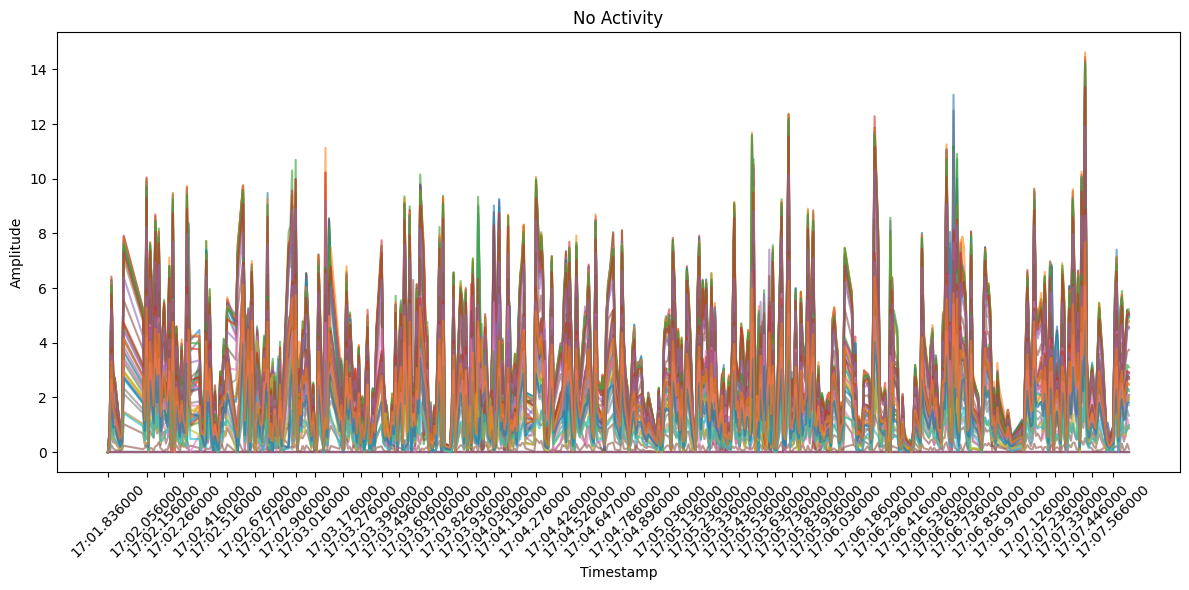

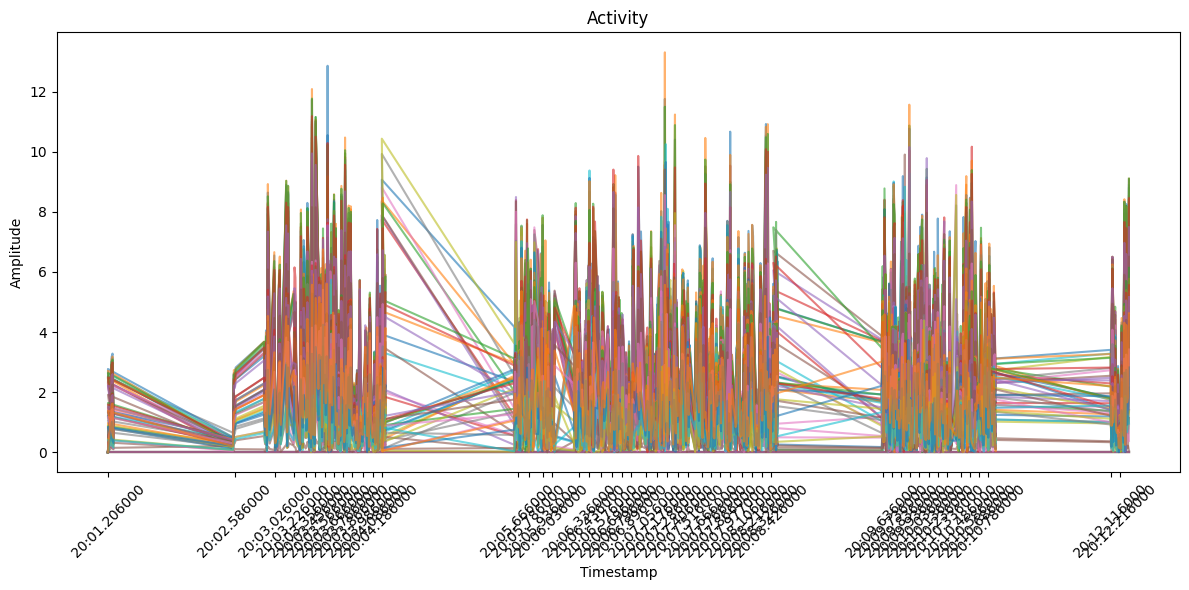

In [2]:
amp_no_activity, ts_no_activity = preprocess_complex_pipeline(NO_ACTIVITY_CSI_PATH)
amp_activity, ts_activity = preprocess_complex_pipeline(ACTIVITY_CSI_PATH)
print(ts_activity)
plot_csi_amplitude(np.abs(amp_no_activity), ts_no_activity, title='No Activity')
plot_csi_amplitude(np.abs(amp_activity), ts_activity, title='Activity')

In [3]:
import numpy as np
from scipy.linalg import eigh

def beamform_matrix_sir(X_signal, X_noise, reg=1e-6):
    """
    X_signal, X_noise: (N, 52) complex
    Returns: W ∈ ℂ⁵²ˣ⁵² — beamforming matrix (columns are eigenvectors)
    """
    Xs = X_signal - X_signal.mean(axis=0, keepdims=True)
    Xn = X_noise - X_noise.mean(axis=0, keepdims=True)

    R_s = (Xs.conj().T @ Xs) / Xs.shape[0]
    R_n = (Xn.conj().T @ Xn) / Xn.shape[0] + reg * np.eye(Xn.shape[1])

    eigvals, eigvecs = eigh(R_s, R_n)
    W = eigvecs[:, ::-1]  # sort eigenvectors by decreasing SIR
    return W  # shape (52, 52)


In [4]:
W = beamform_matrix_sir(amp_activity, amp_no_activity)

In [5]:
test_act = amp_activity @ W
test_noact = amp_no_activity @ W

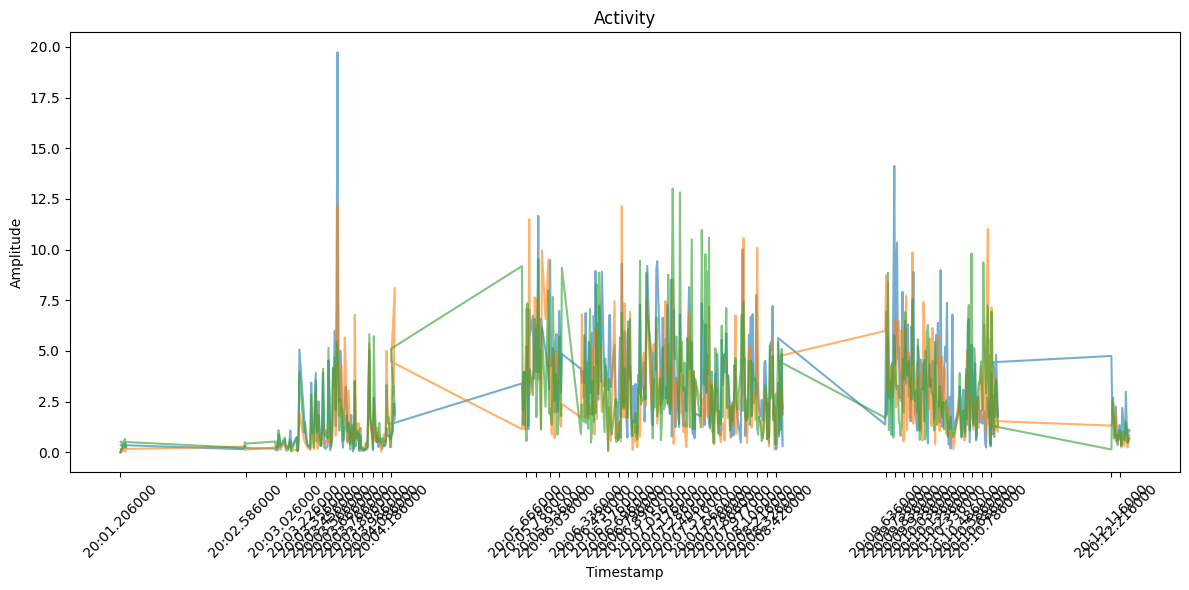

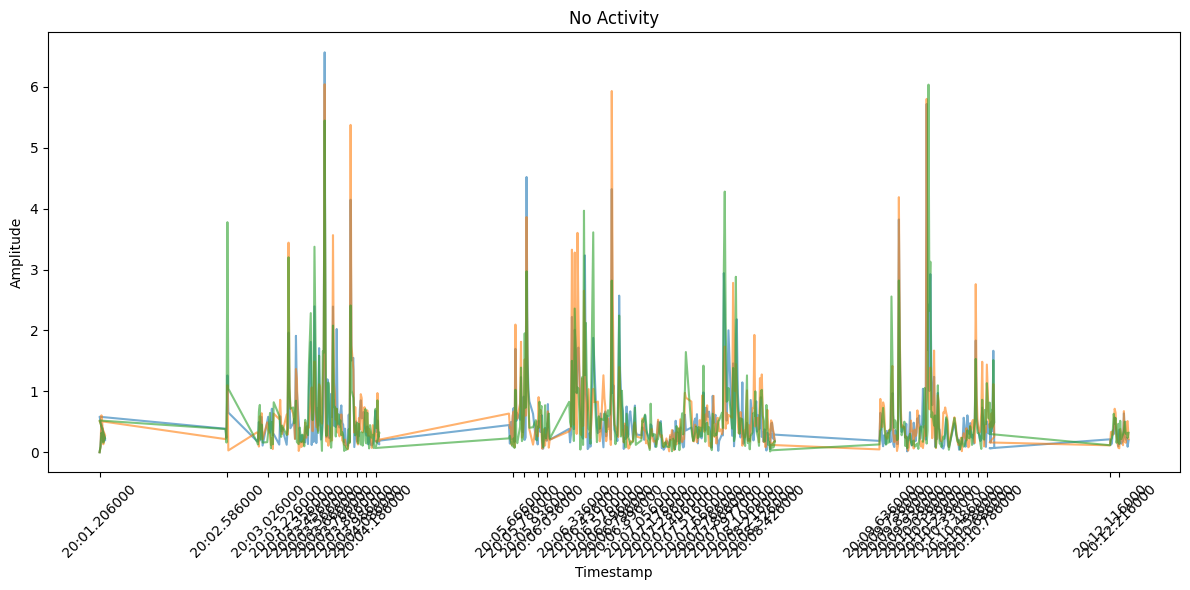

In [6]:
plot_csi_amplitude(np.abs(test_act[:,:3]), ts_activity, title='Activity')
plot_csi_amplitude(np.abs(test_noact[:, :3]), ts_activity, title='No Activity')

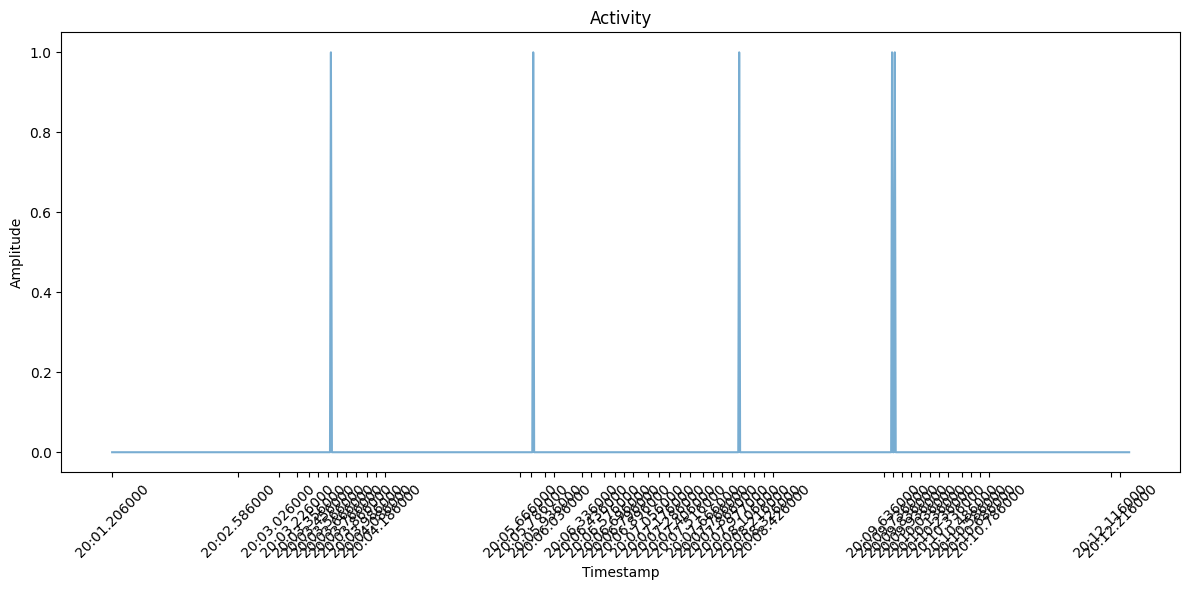

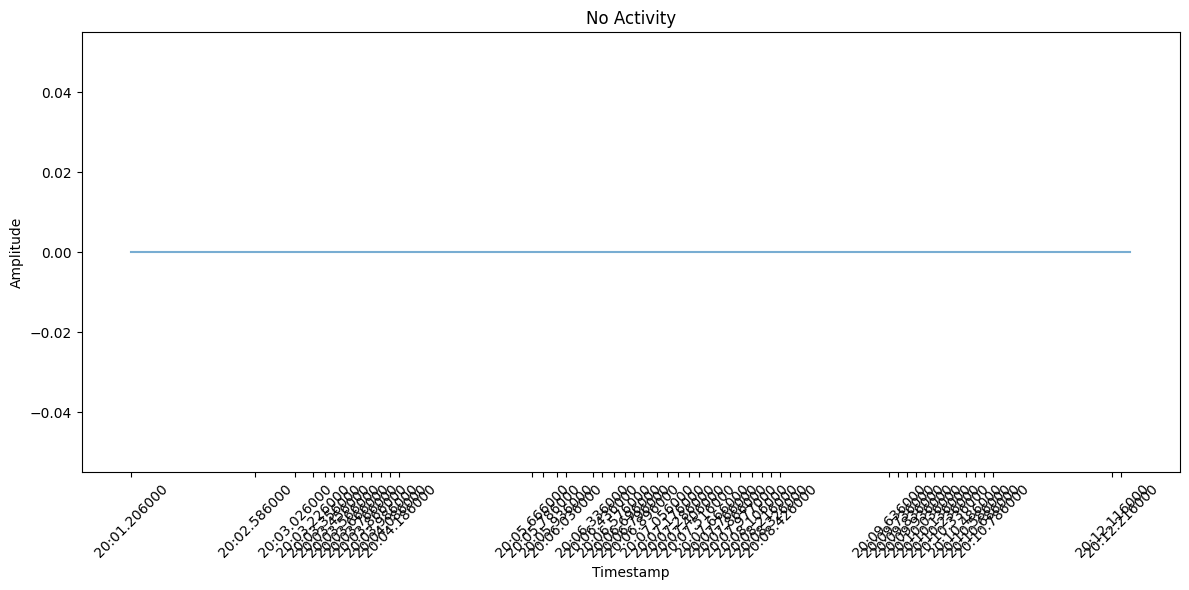

In [10]:
plot_csi_amplitude(np.abs(test_act[:,:1])>10, ts_activity, title='Activity')
plot_csi_amplitude(np.abs(test_noact[:, :1])>10, ts_activity, title='No Activity')

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141704.csv


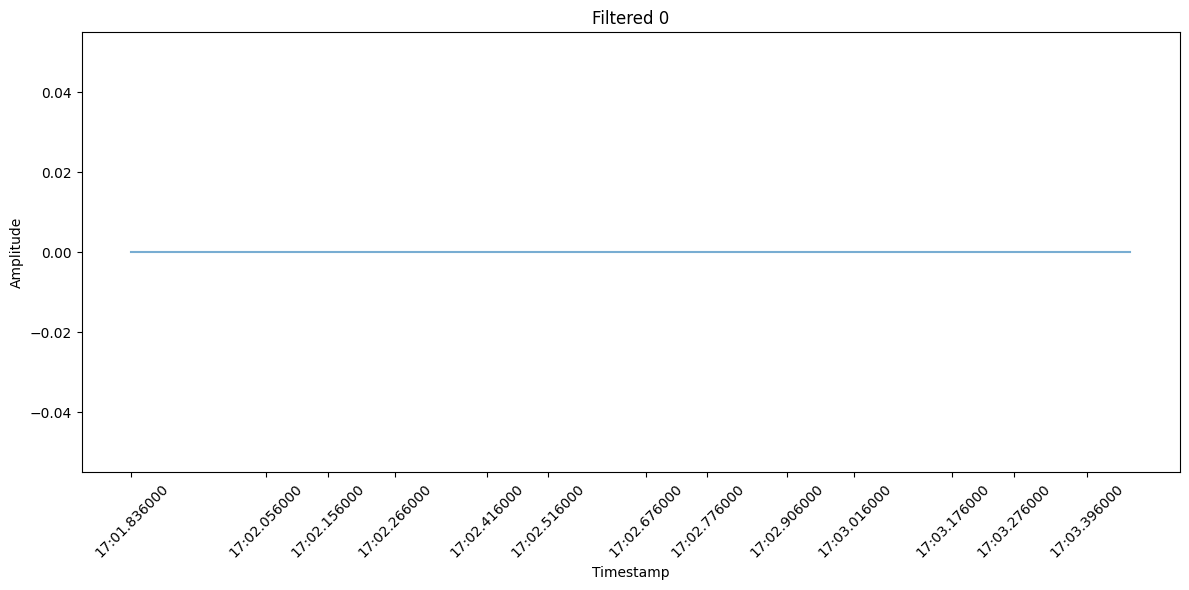

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141705.csv


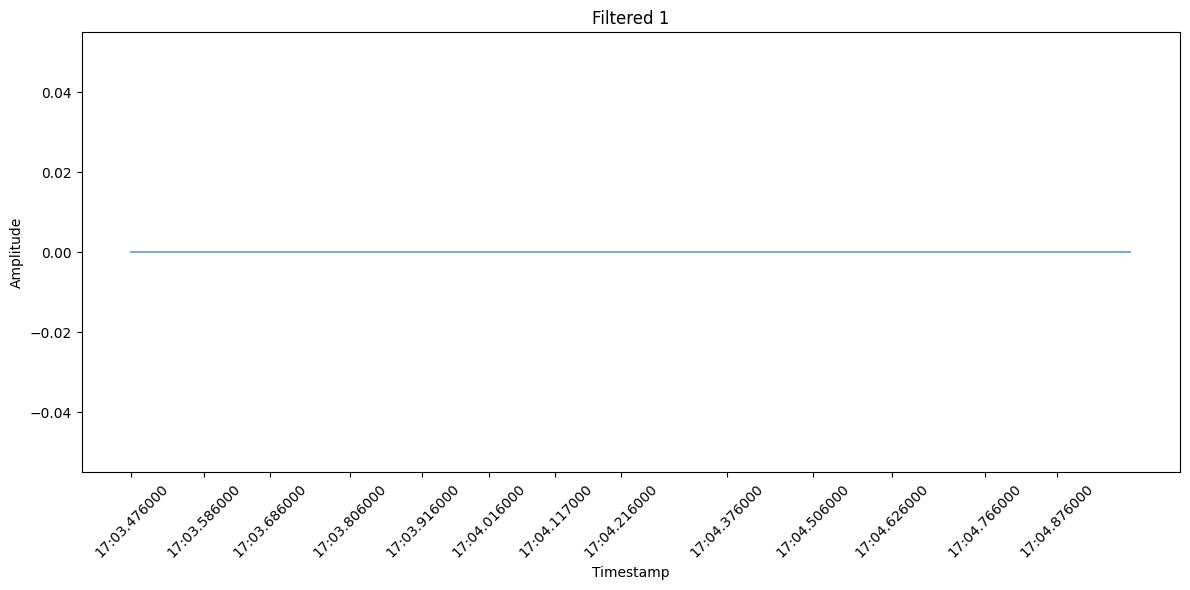

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141706.csv


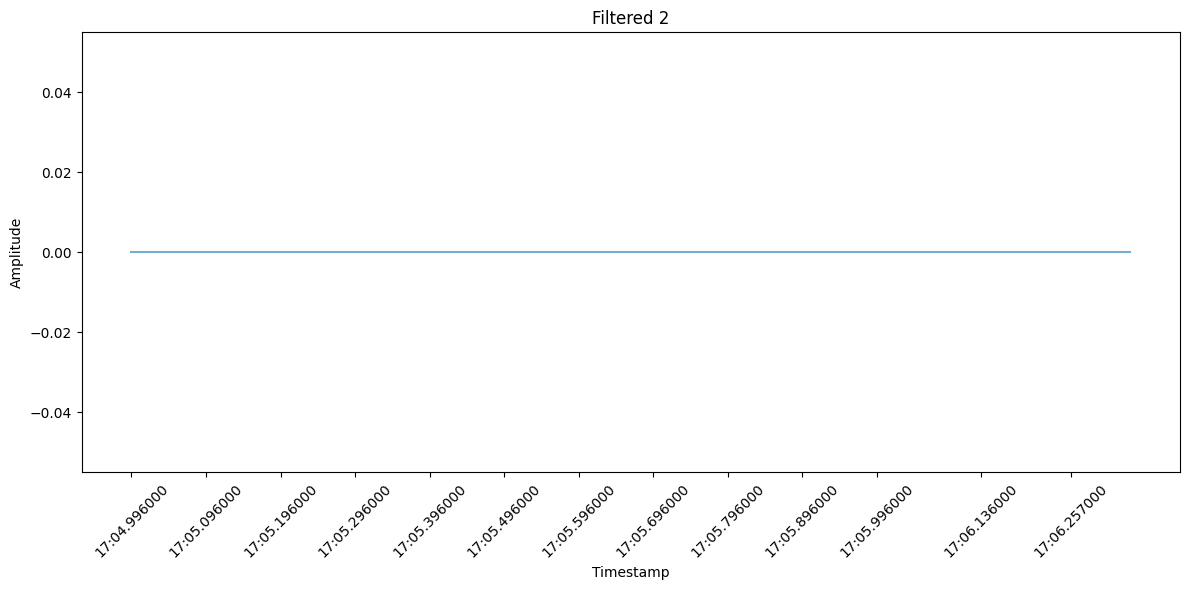

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141708.csv


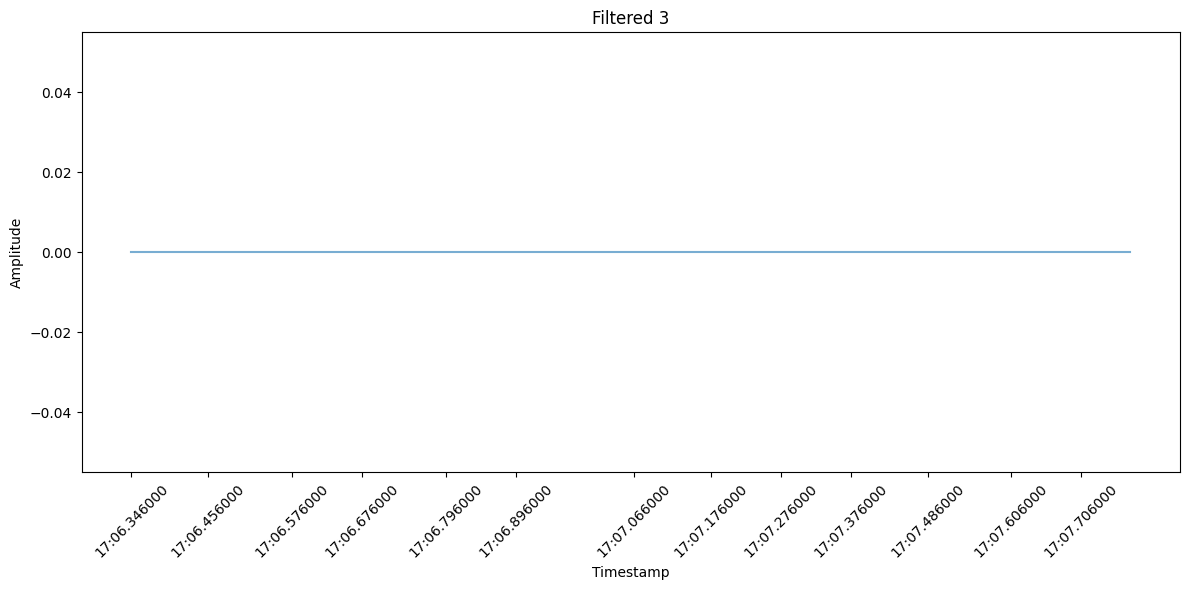

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141709.csv


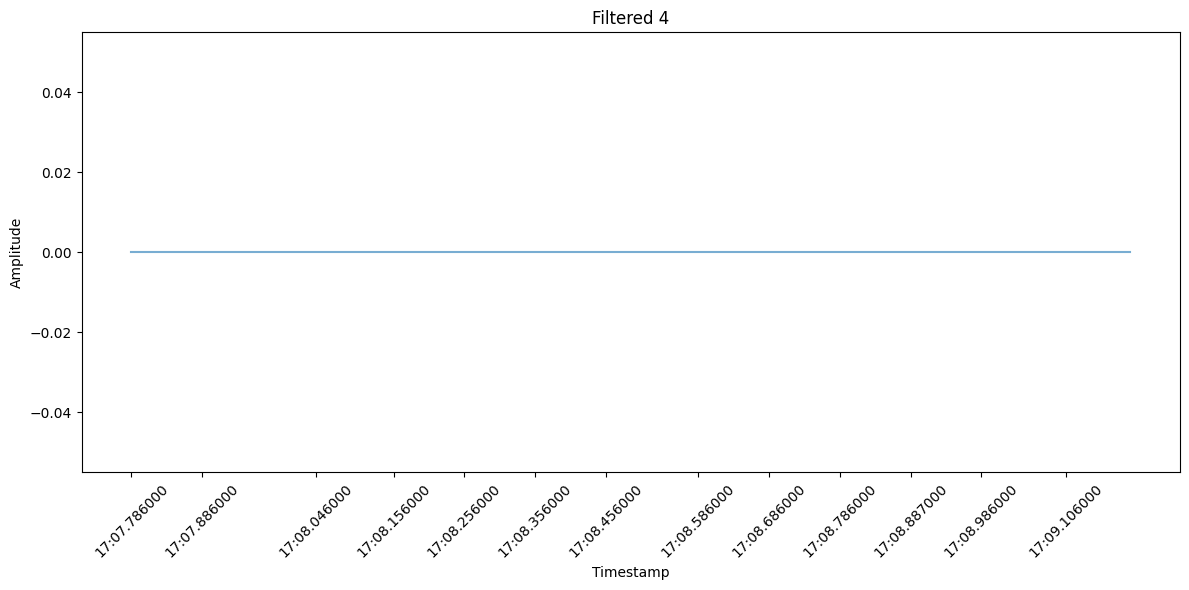

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141711.csv


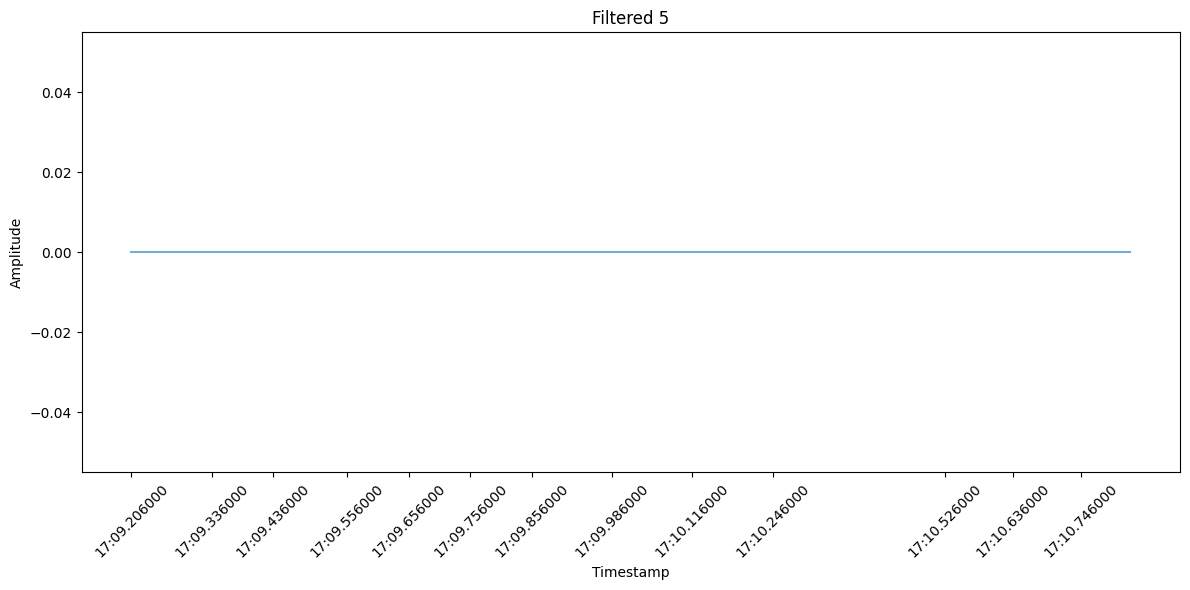

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141712.csv


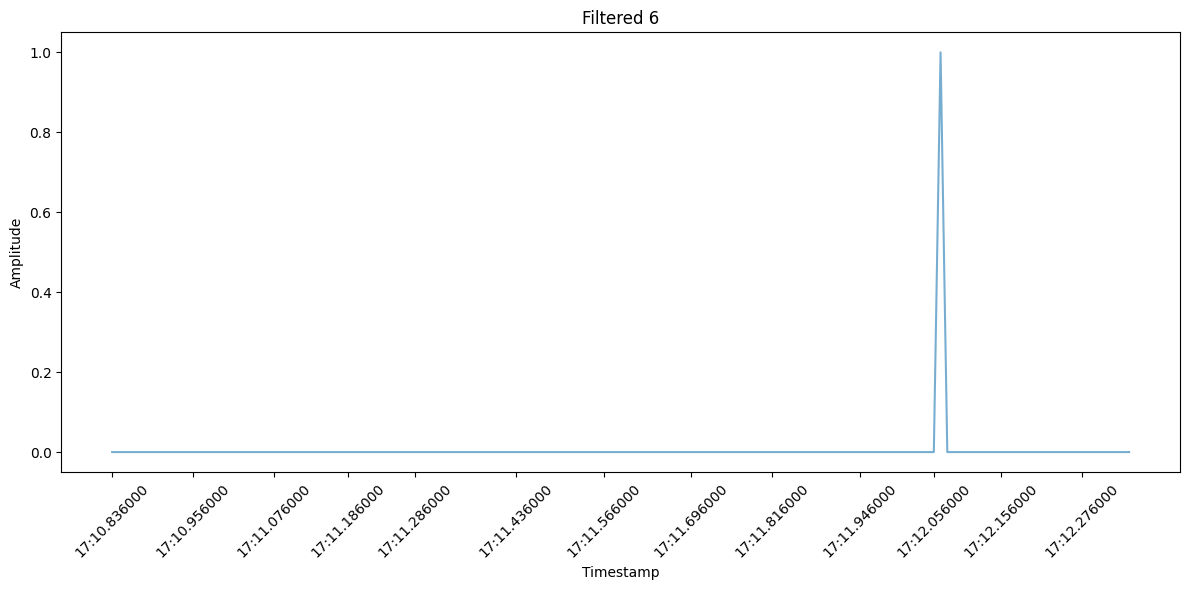

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141714.csv


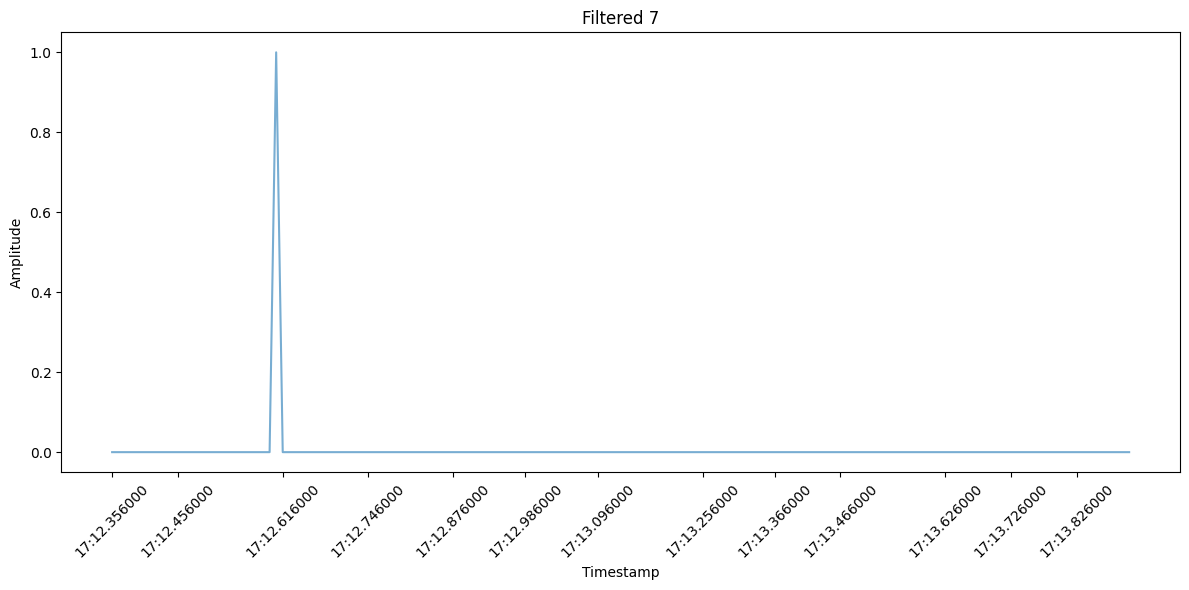

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141715.csv


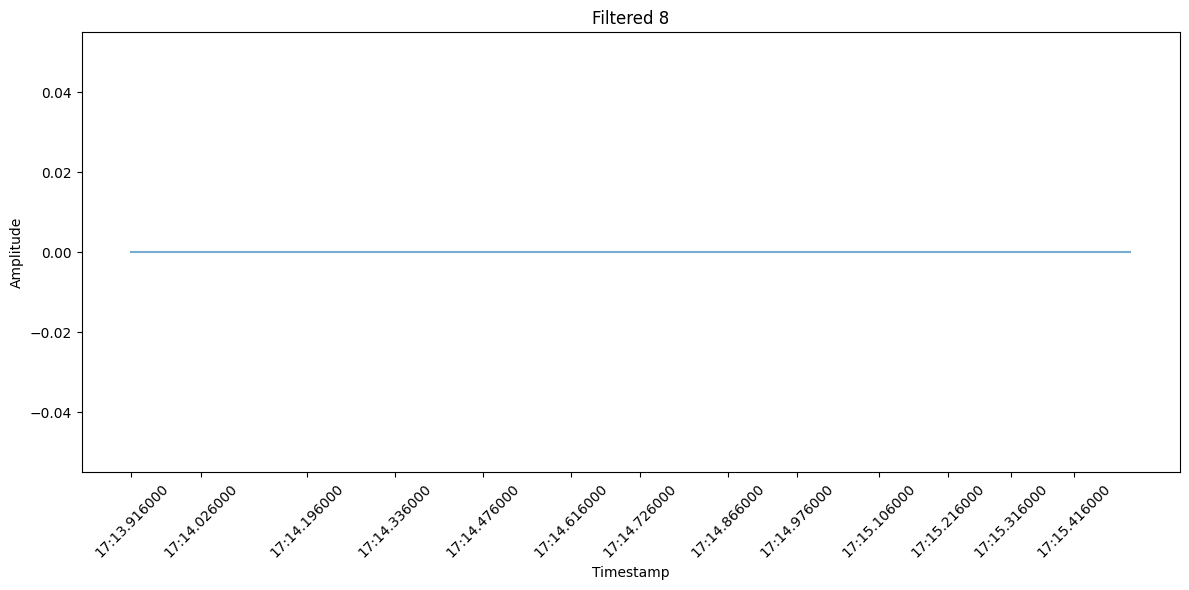

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141717.csv


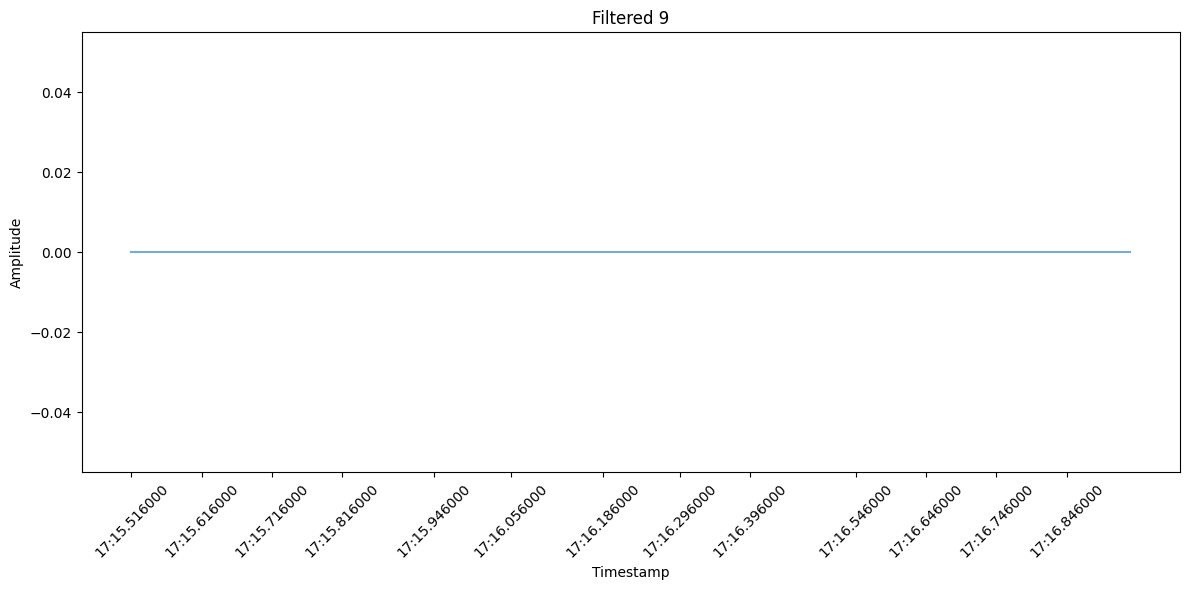

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141718.csv


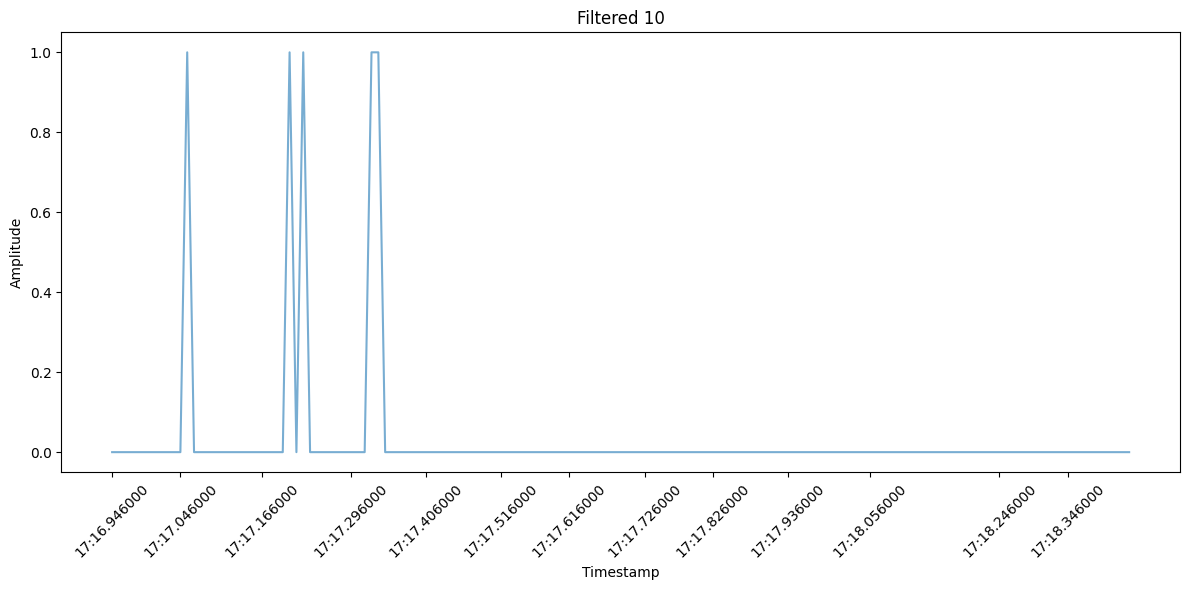

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141720.csv


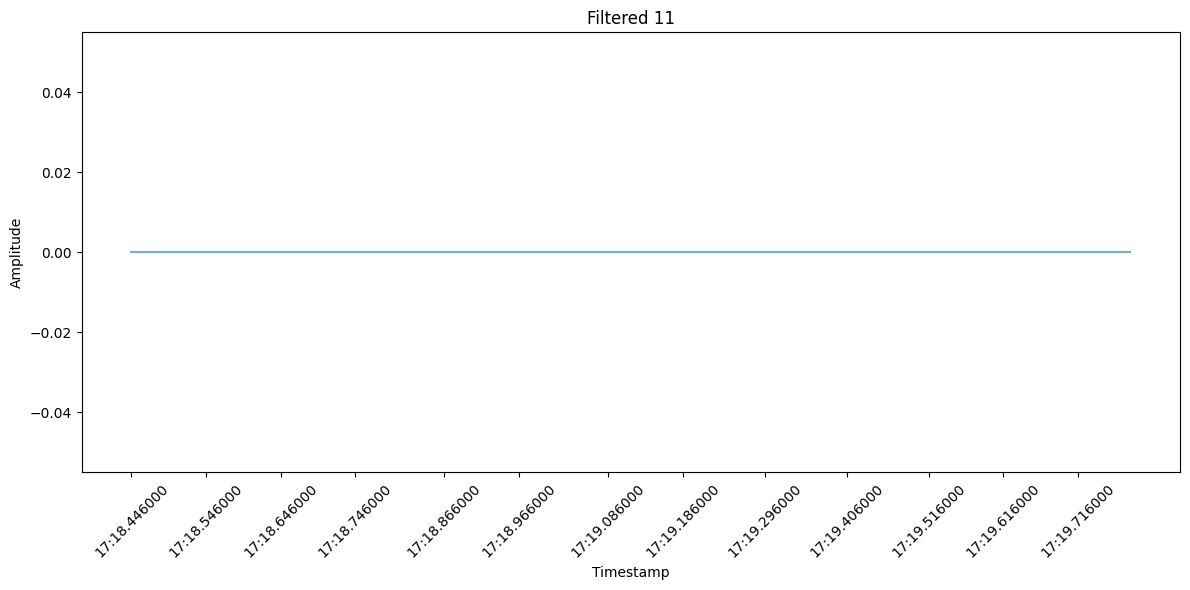

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141722.csv


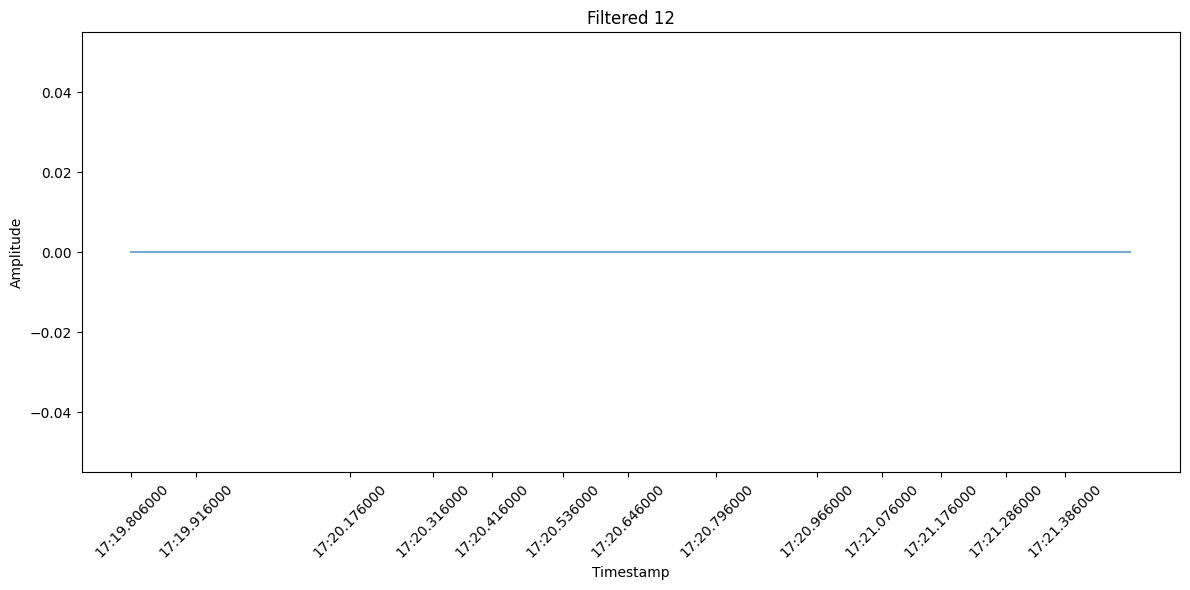

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141723.csv


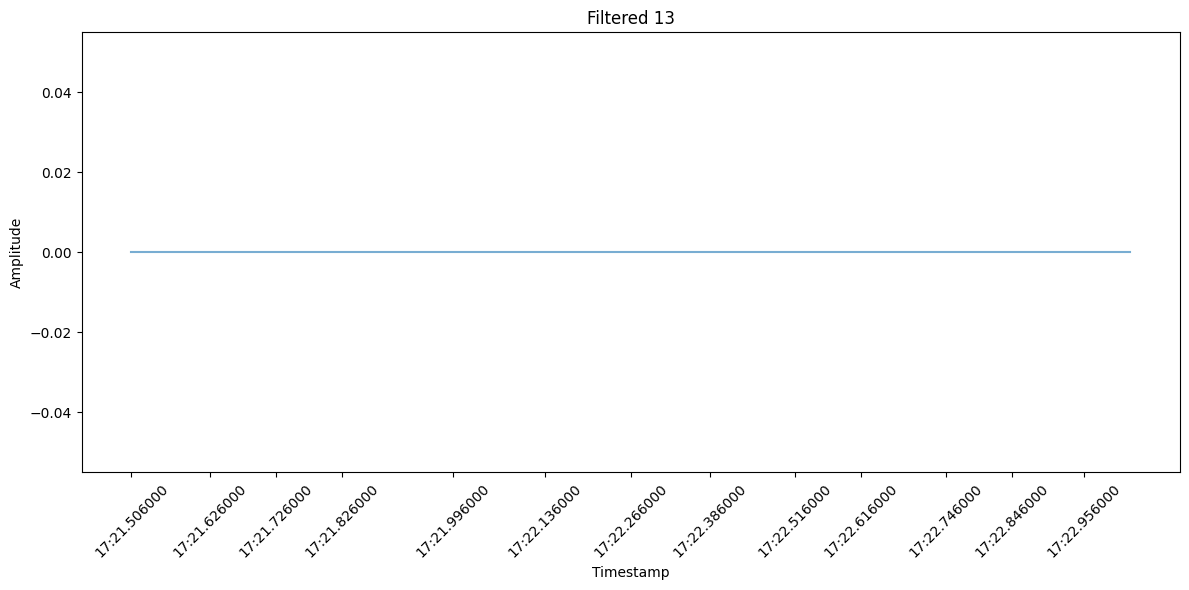

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141725.csv


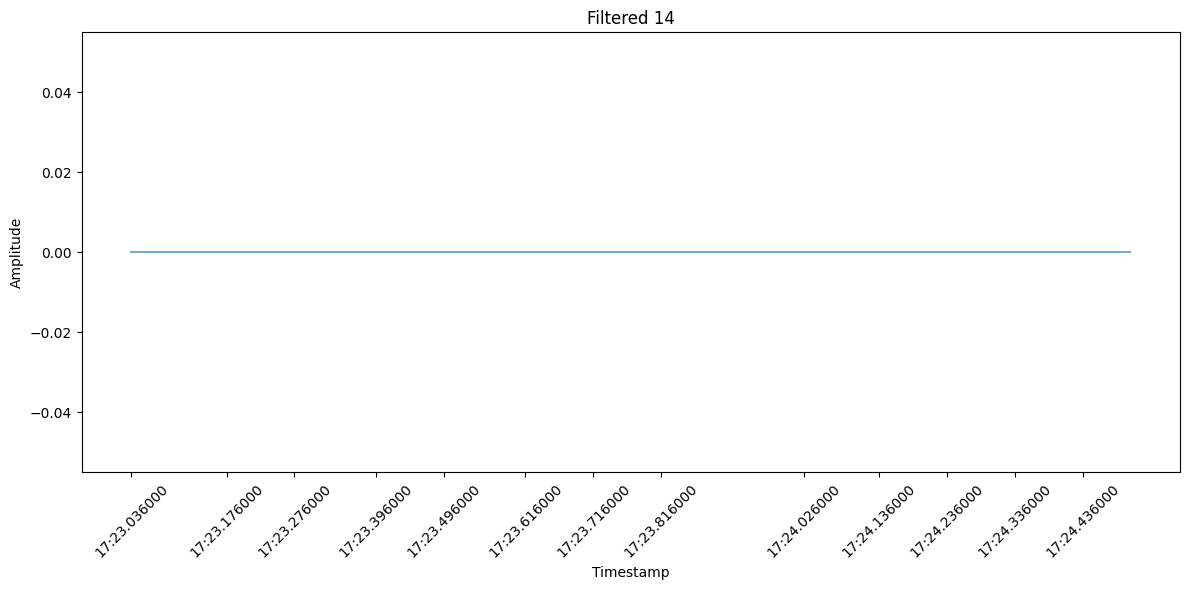

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141726.csv


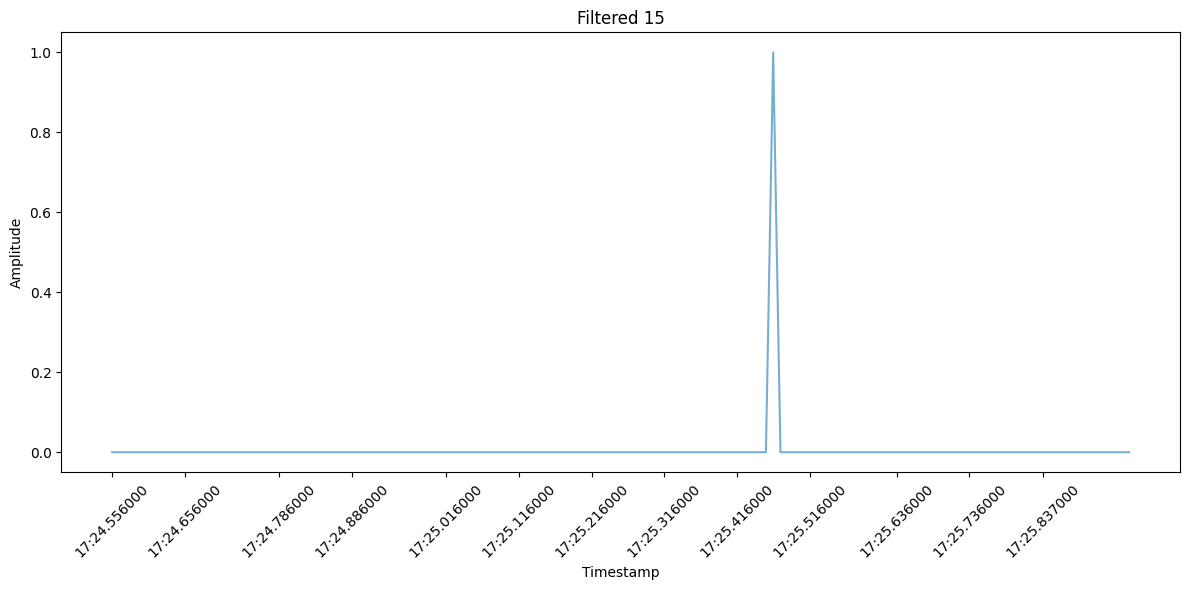

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141728.csv


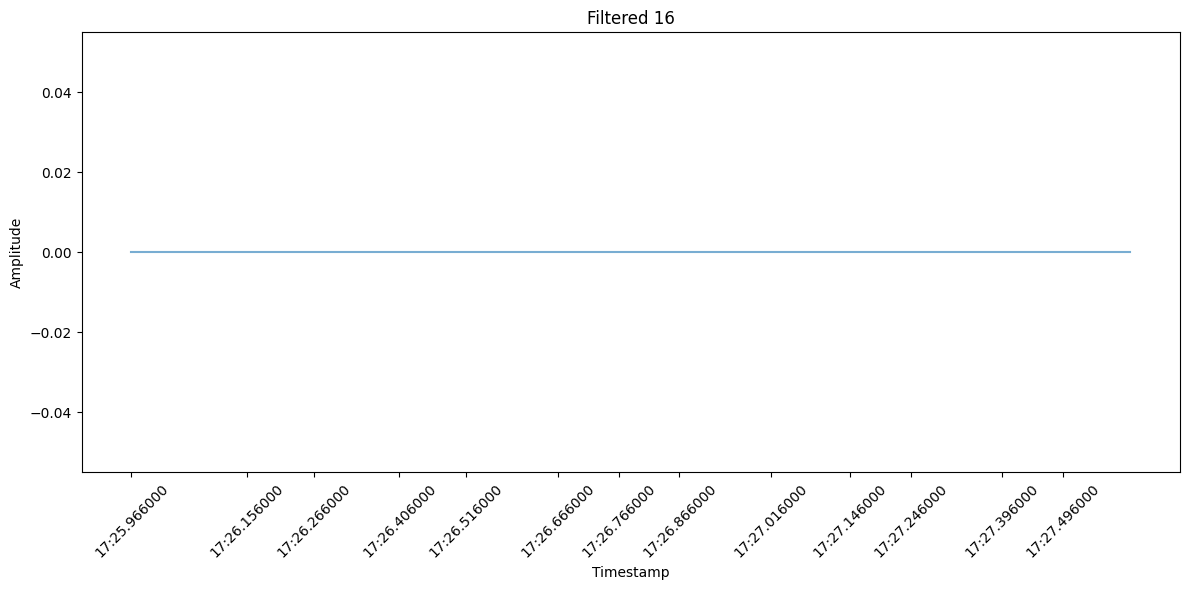

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141729.csv


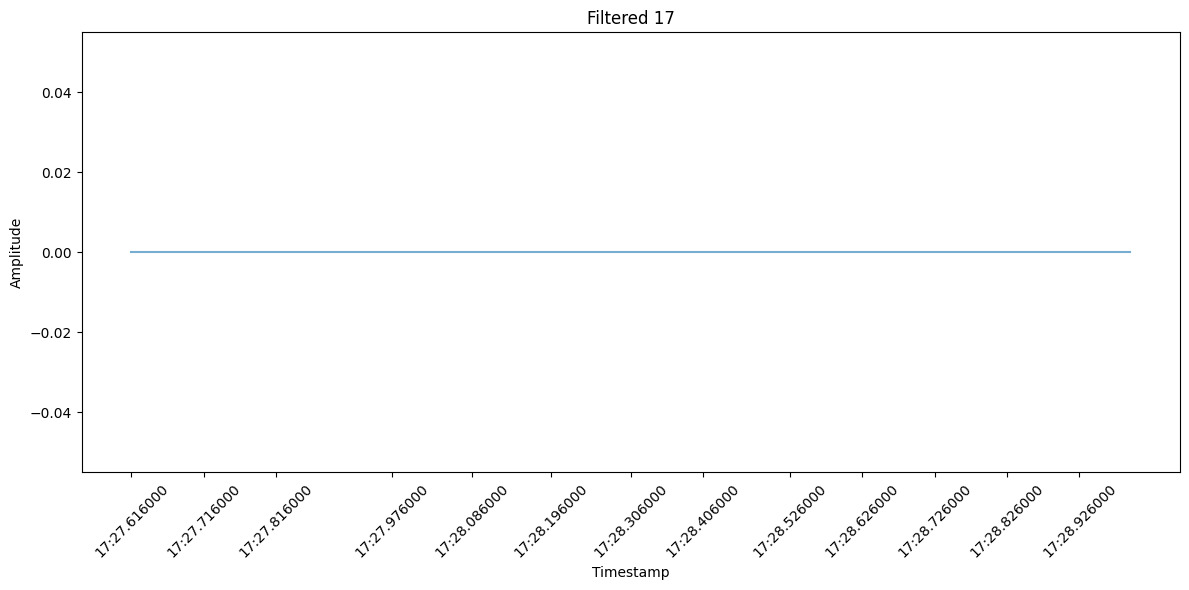

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141730.csv


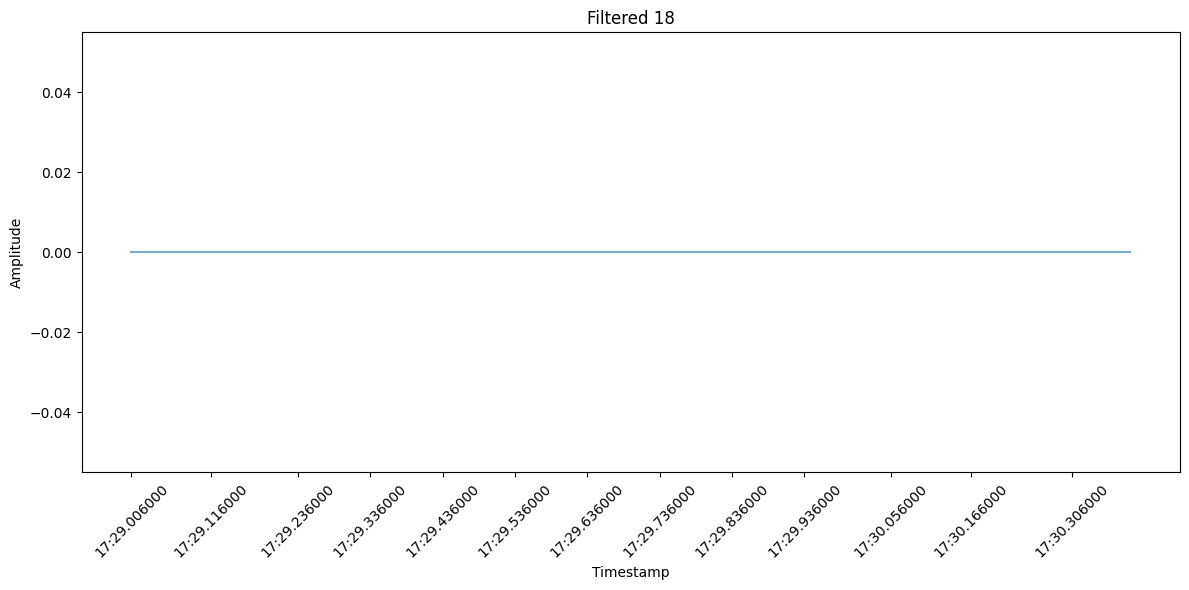

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141732.csv


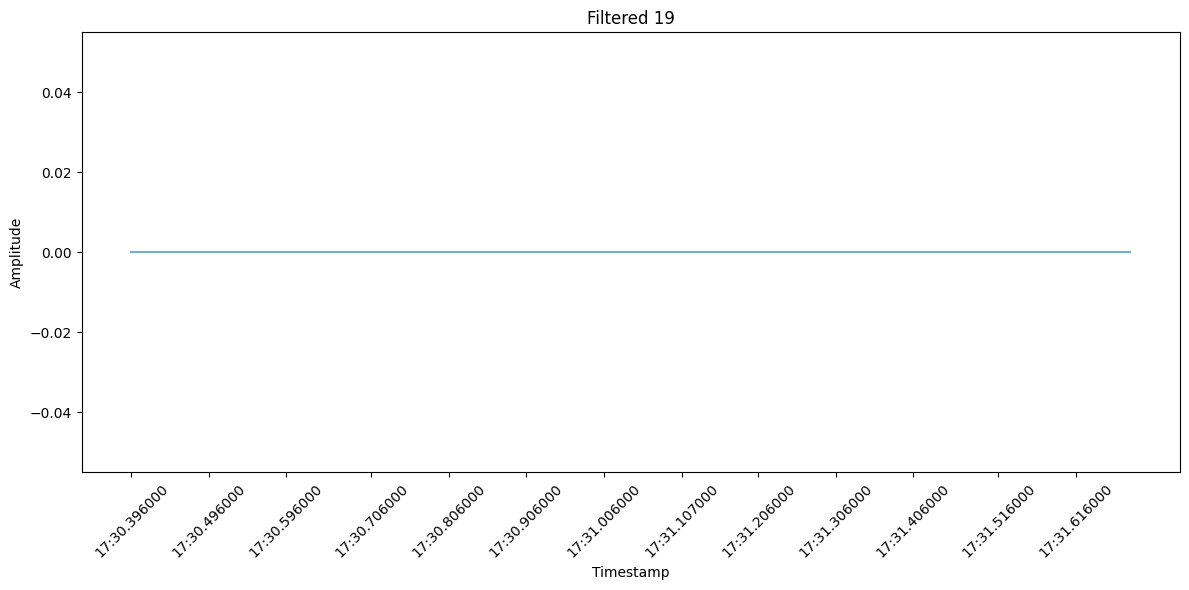

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141733.csv


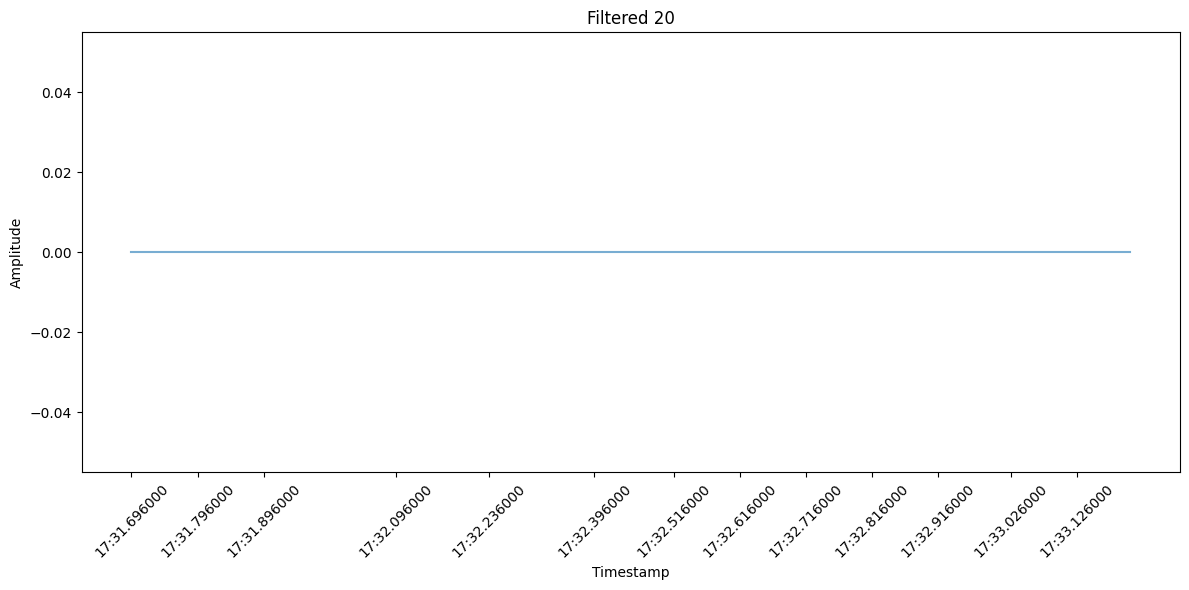

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141735.csv


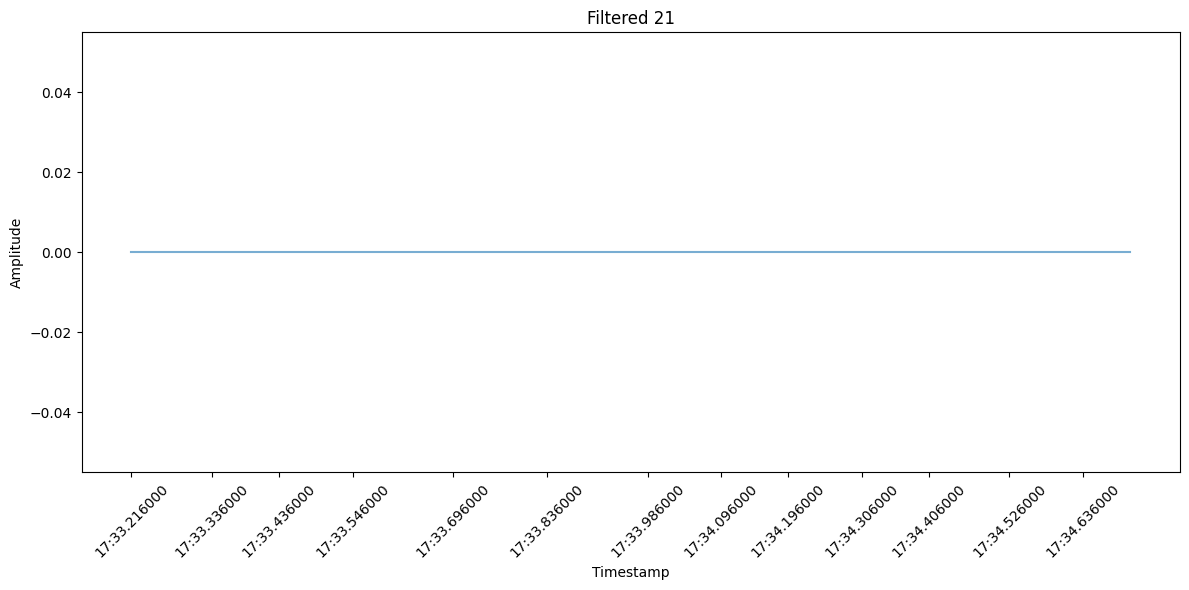

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141736.csv


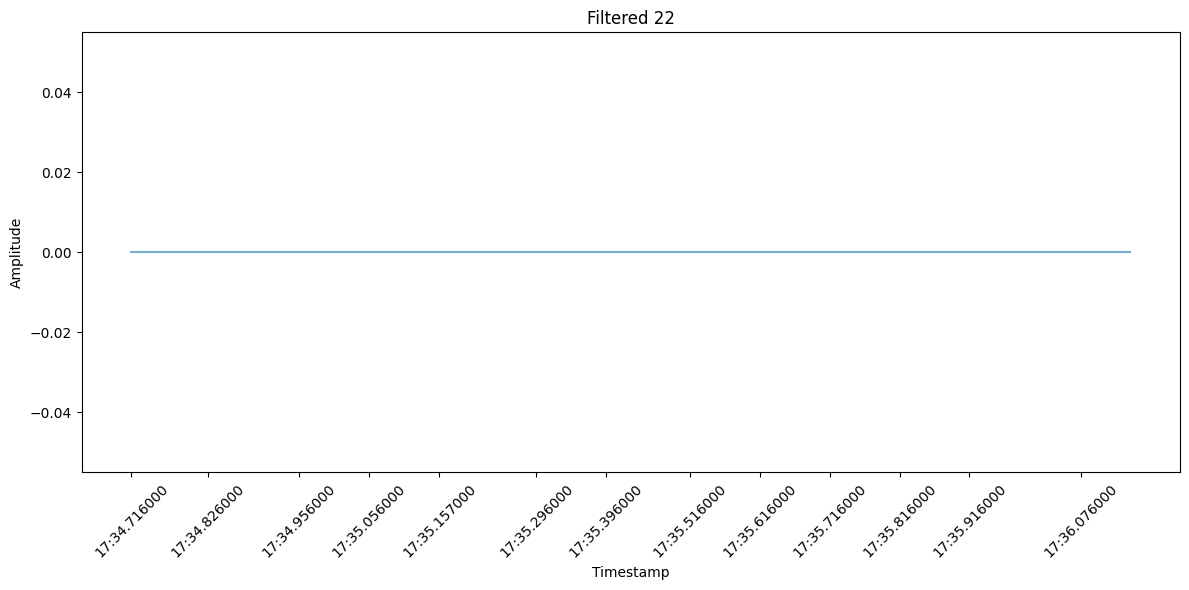

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141738.csv


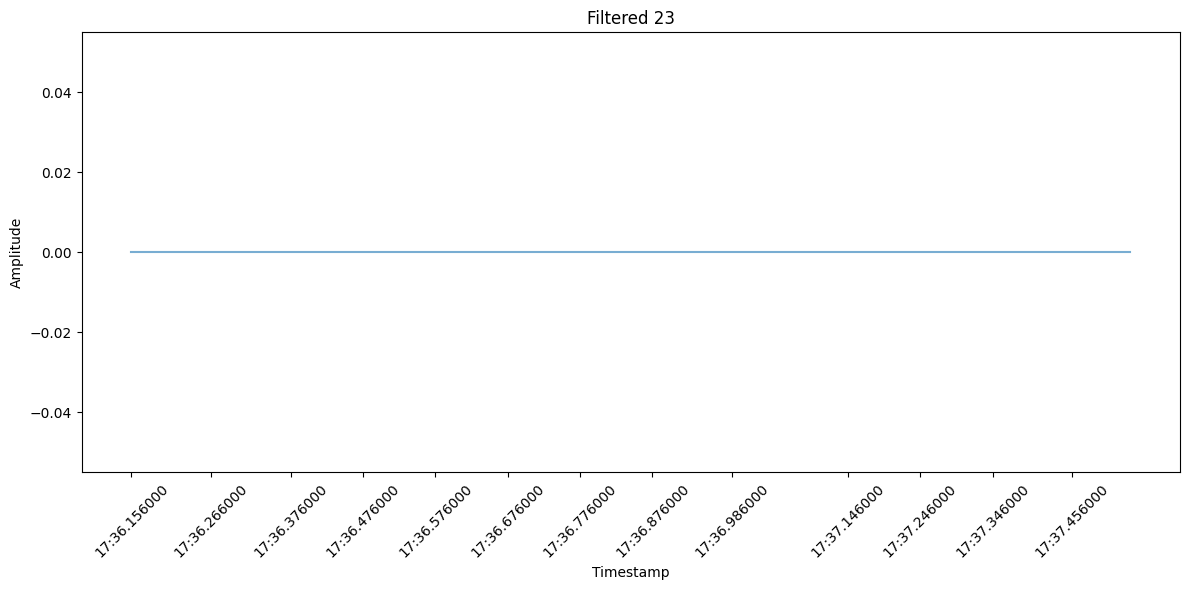

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141739.csv


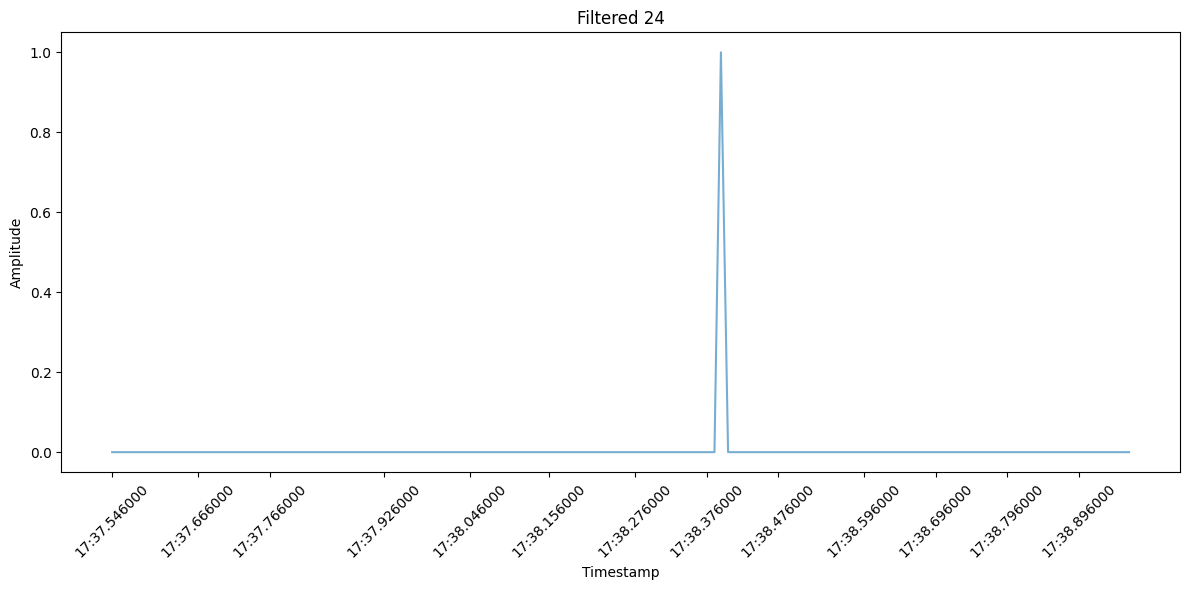

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141741.csv


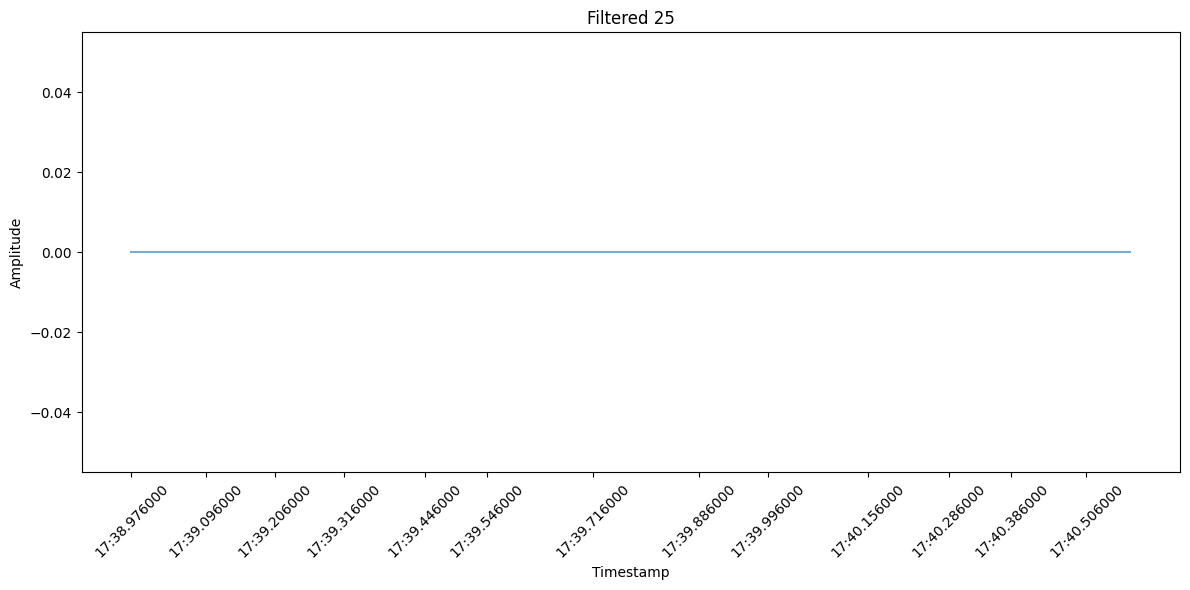

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141742.csv


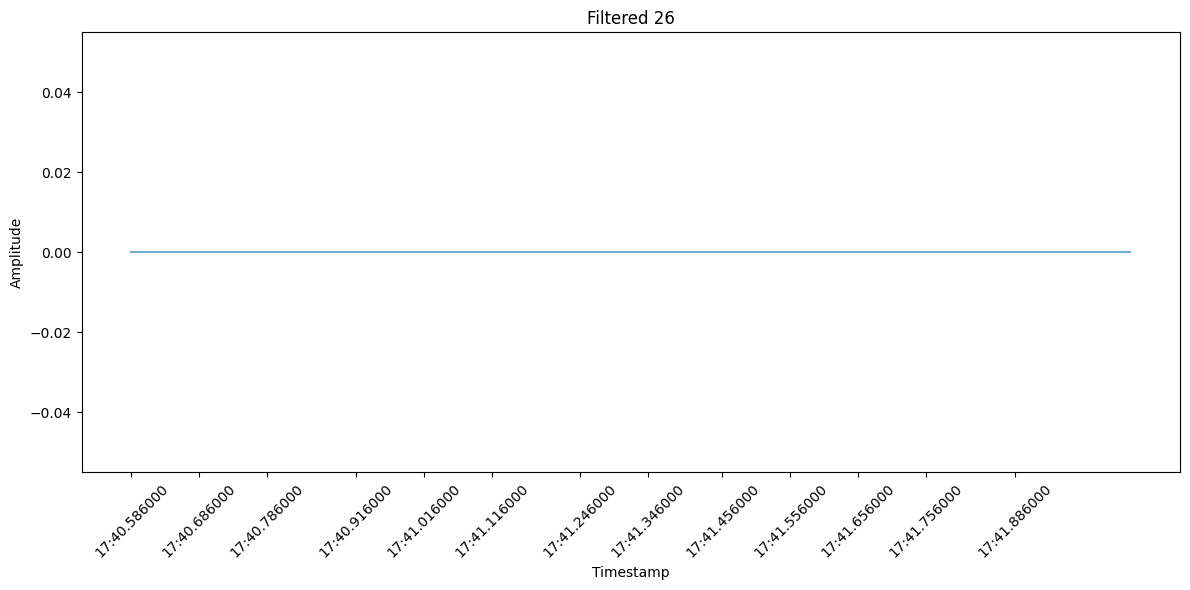

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141743.csv


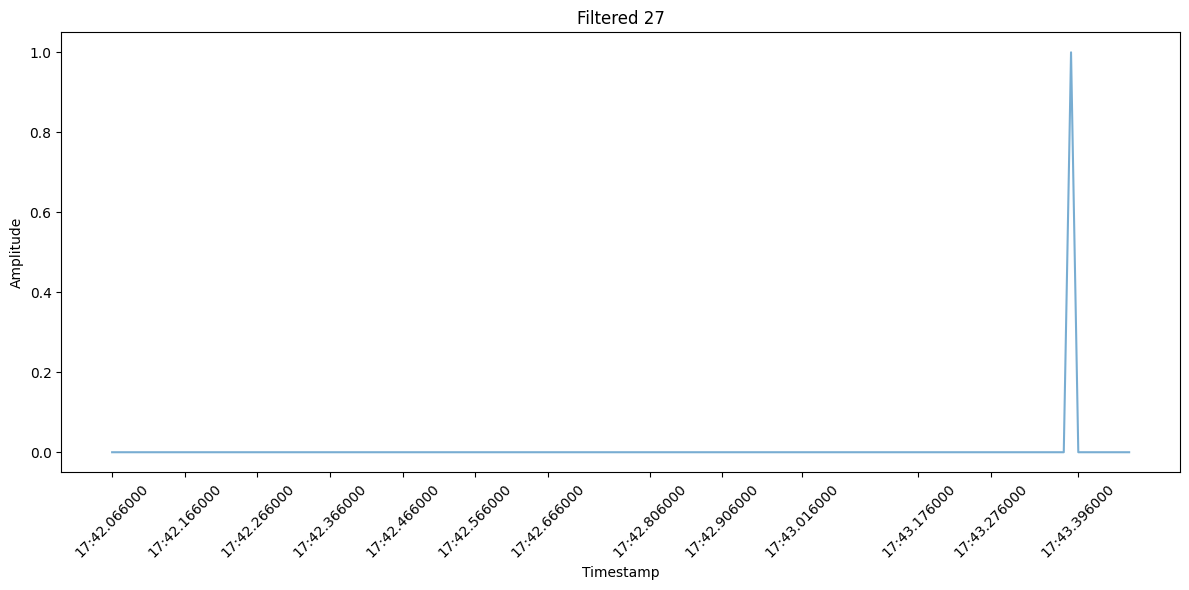

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141745.csv


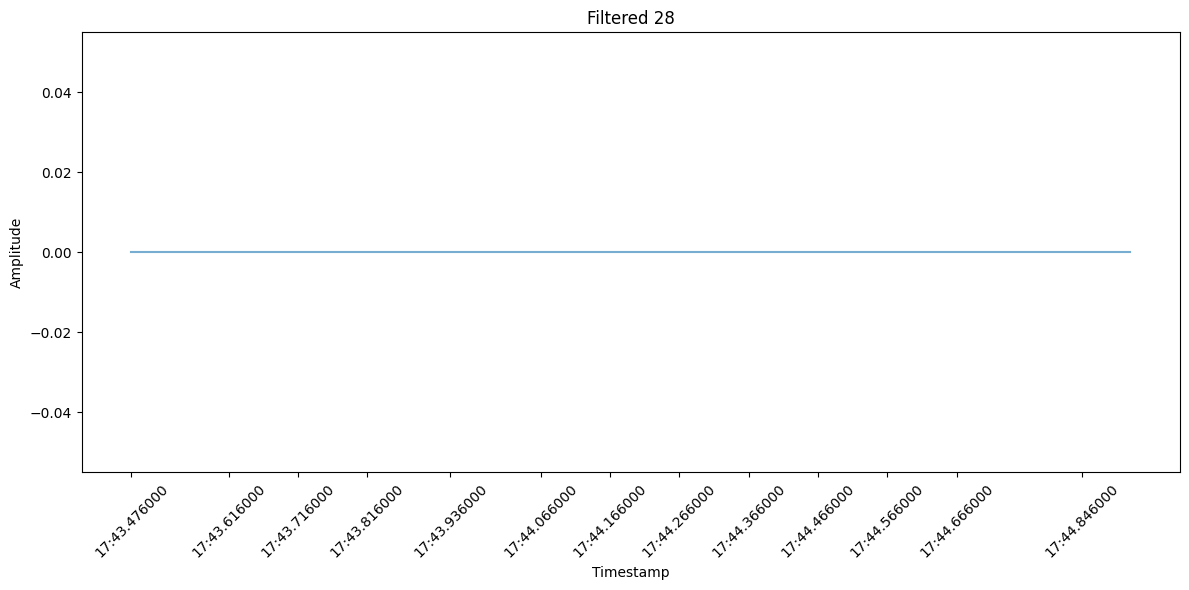

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141746.csv


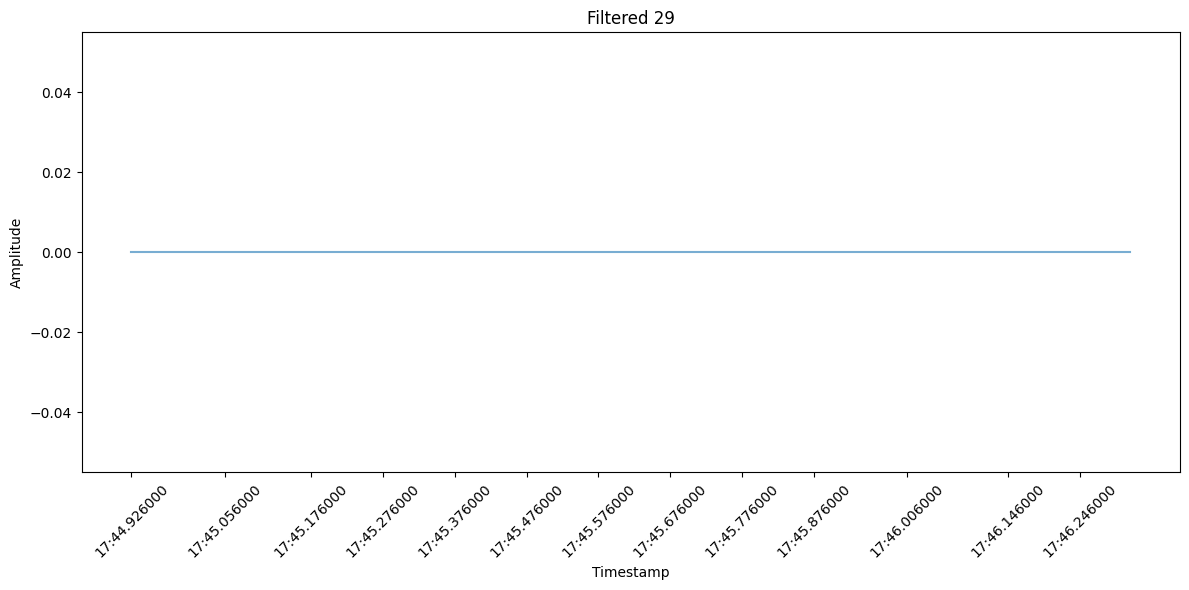

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141748.csv


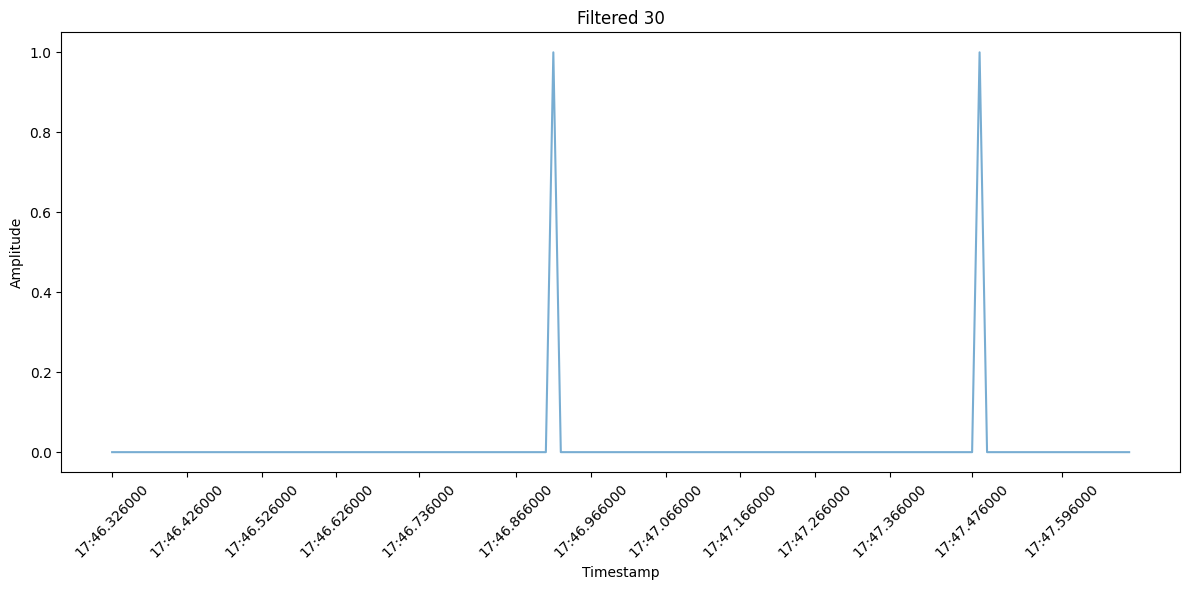

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141749.csv


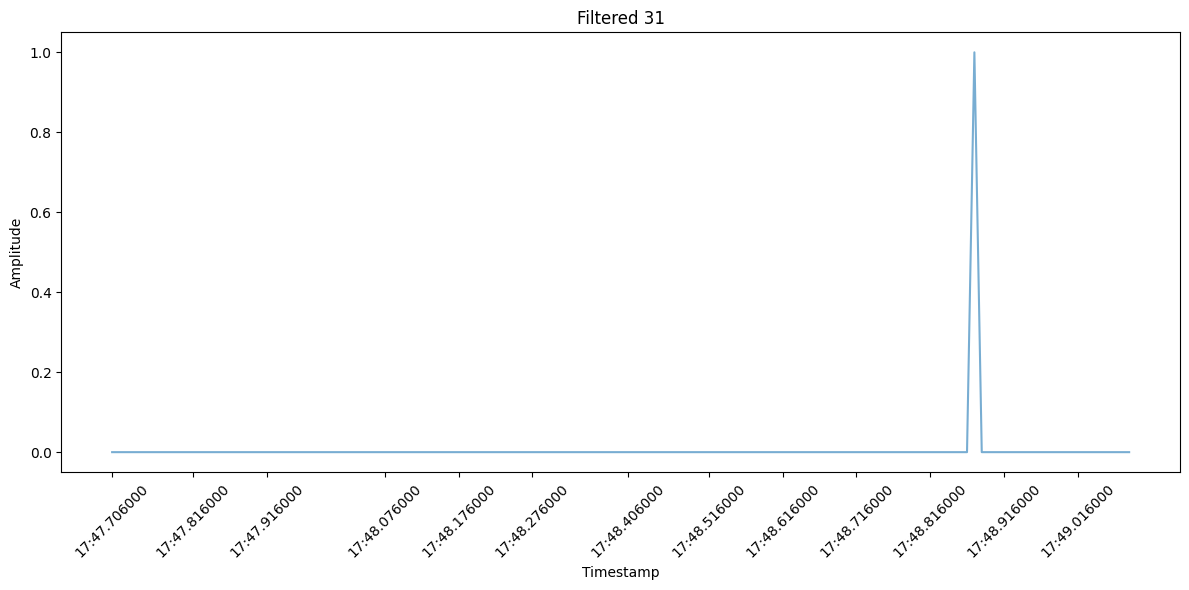

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141751.csv


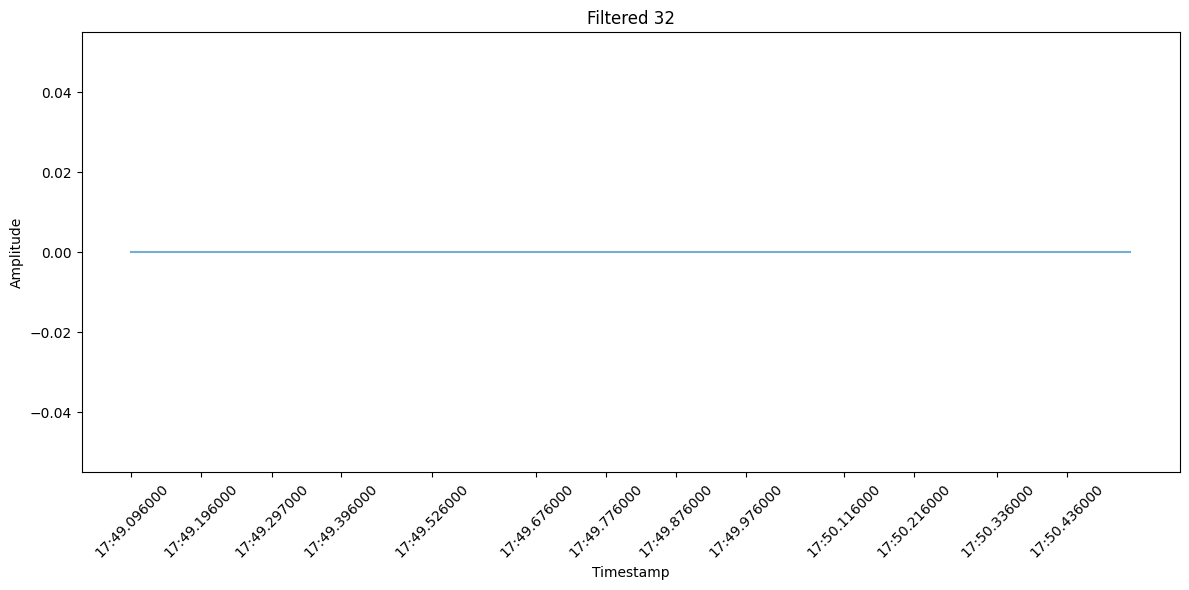

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141752.csv


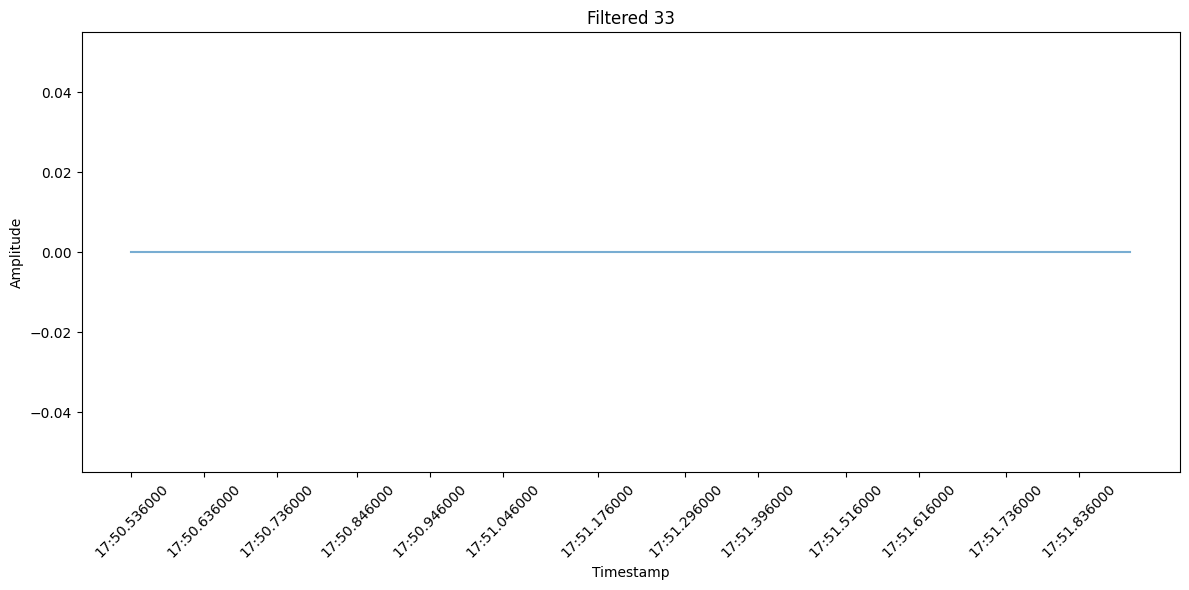

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141754.csv


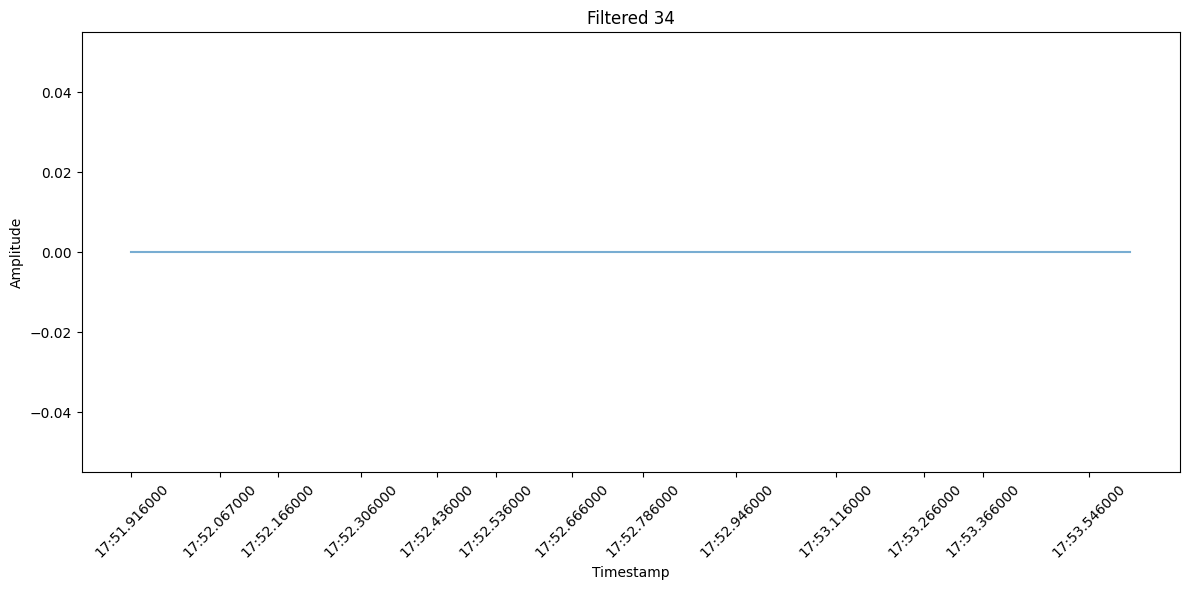

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141755.csv


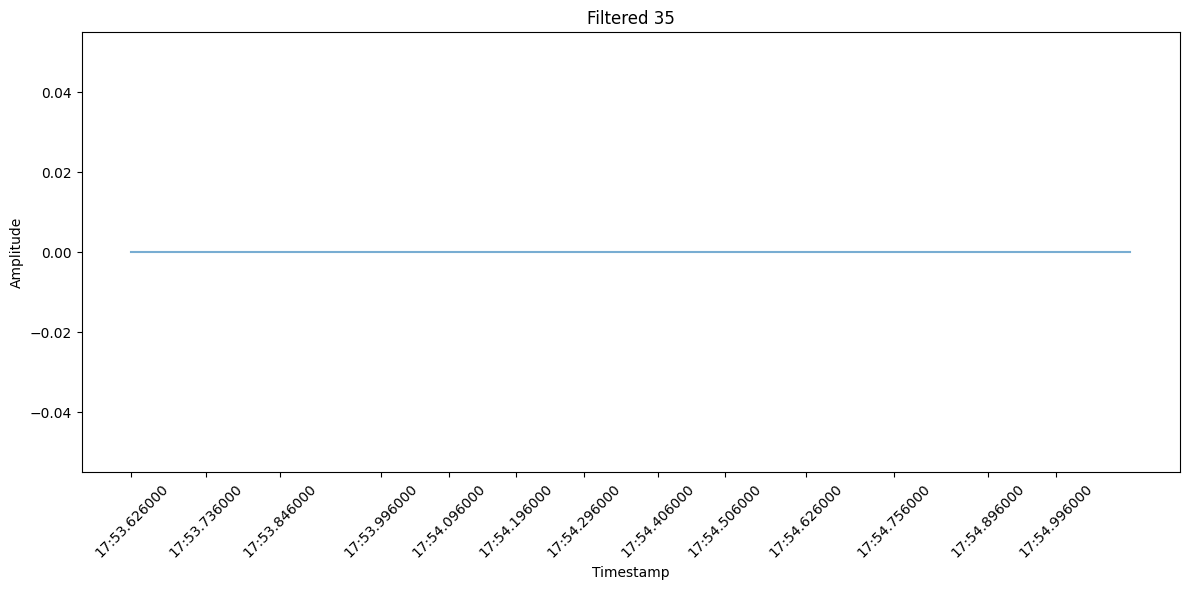

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141757.csv


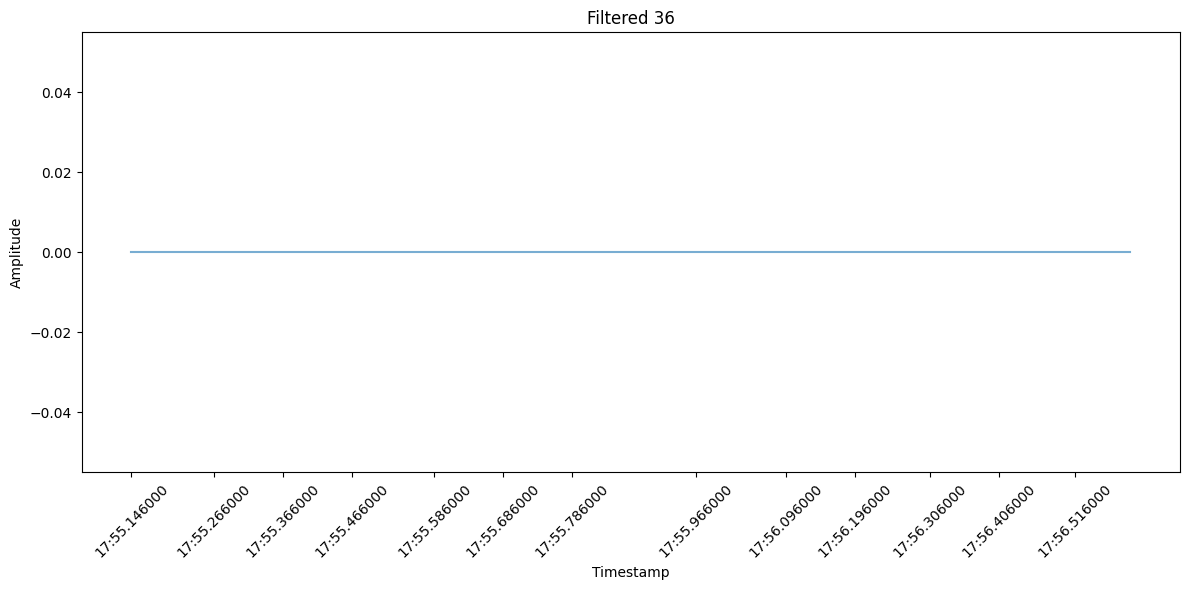

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141758.csv


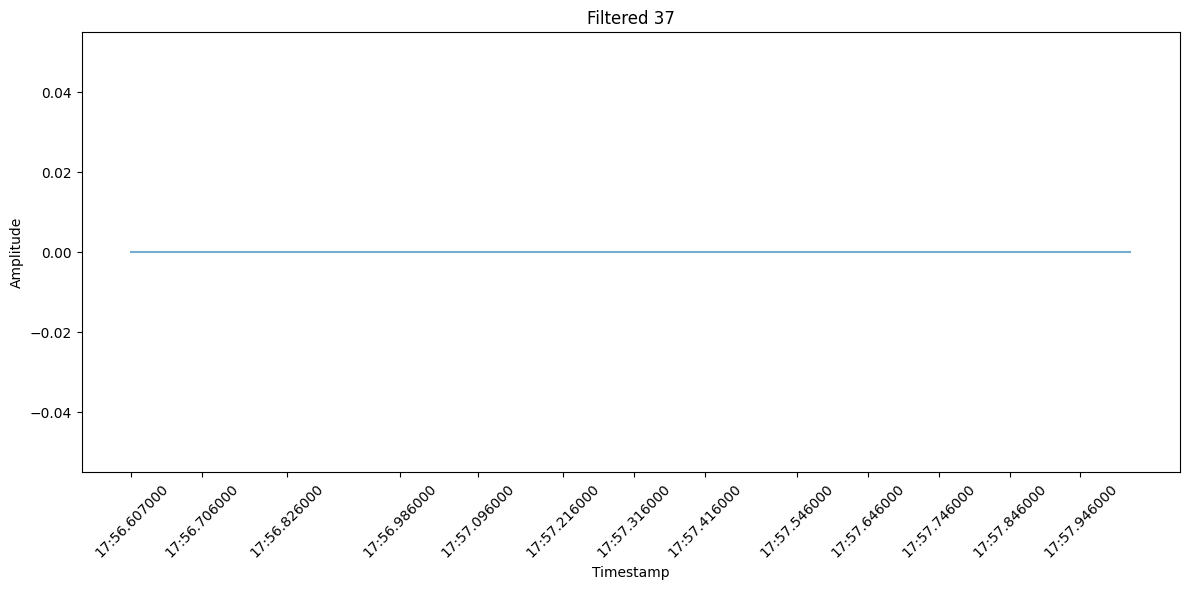

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141800.csv


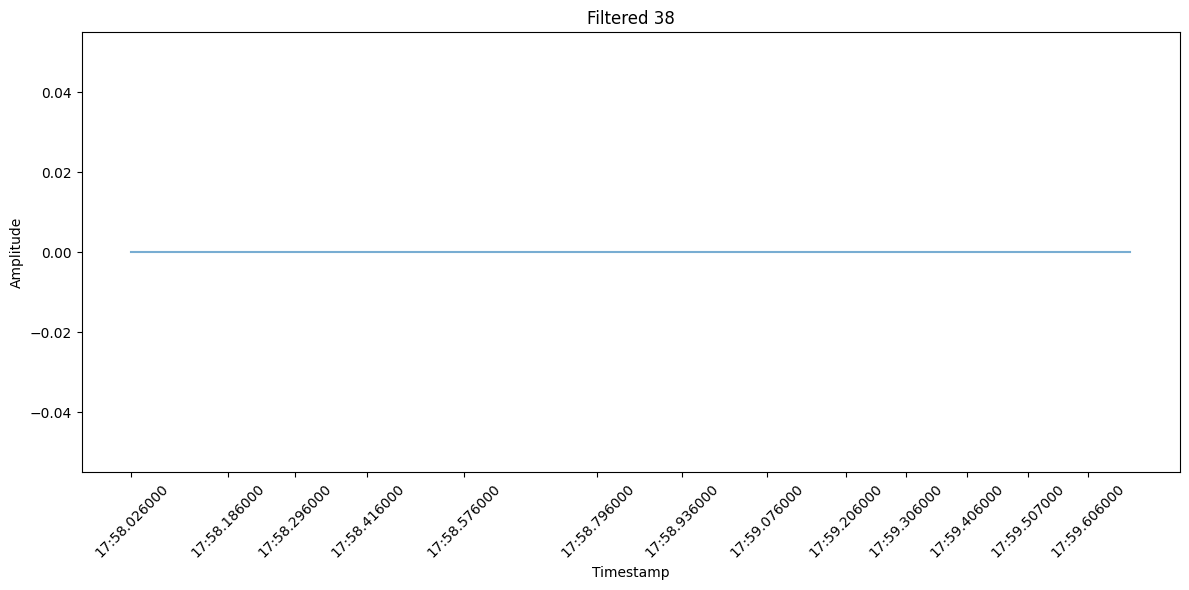

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141801.csv


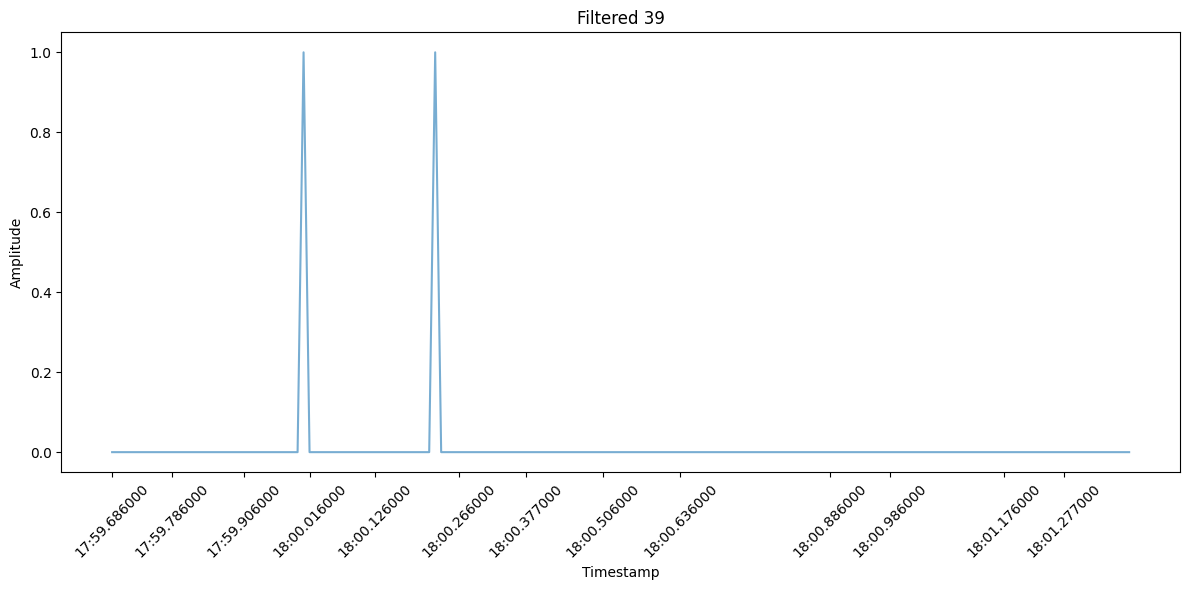

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141803.csv


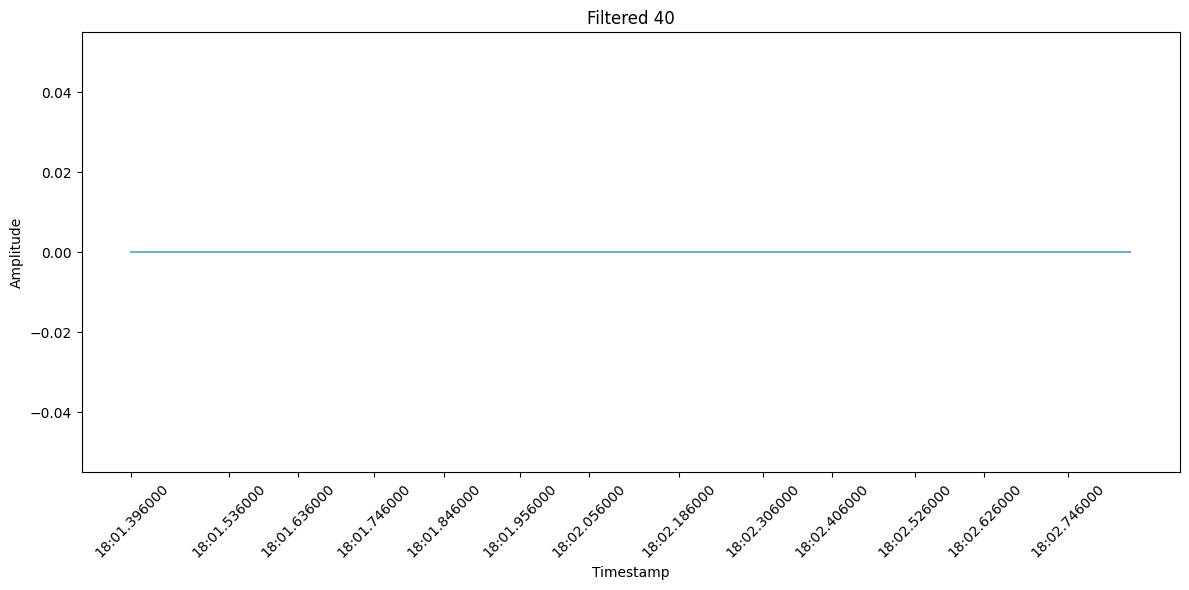

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141804.csv


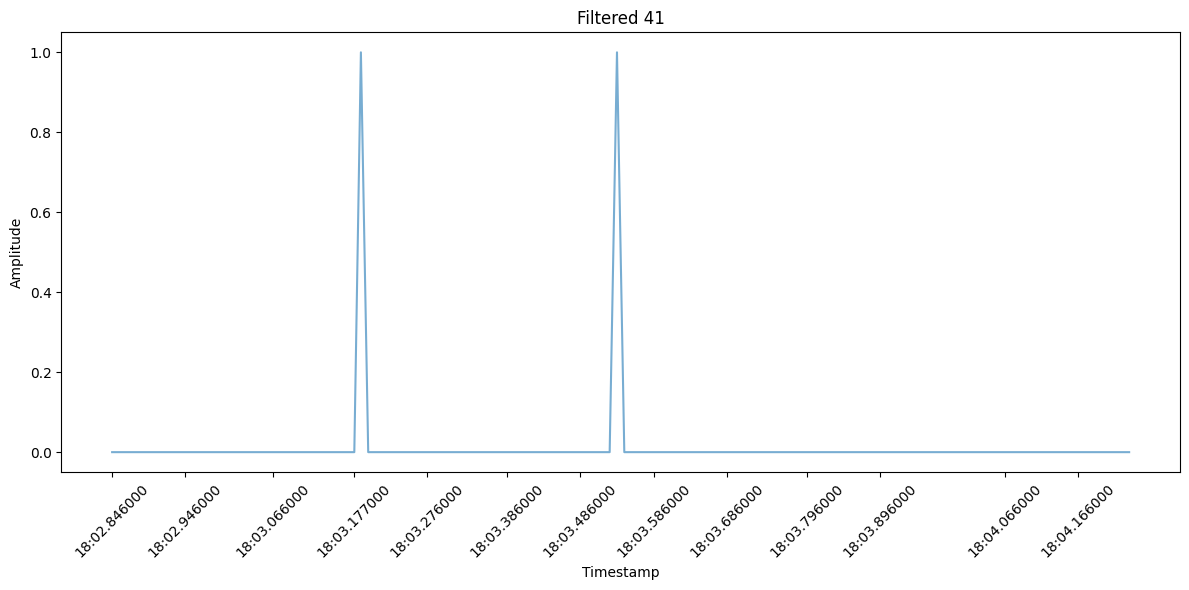

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141806.csv


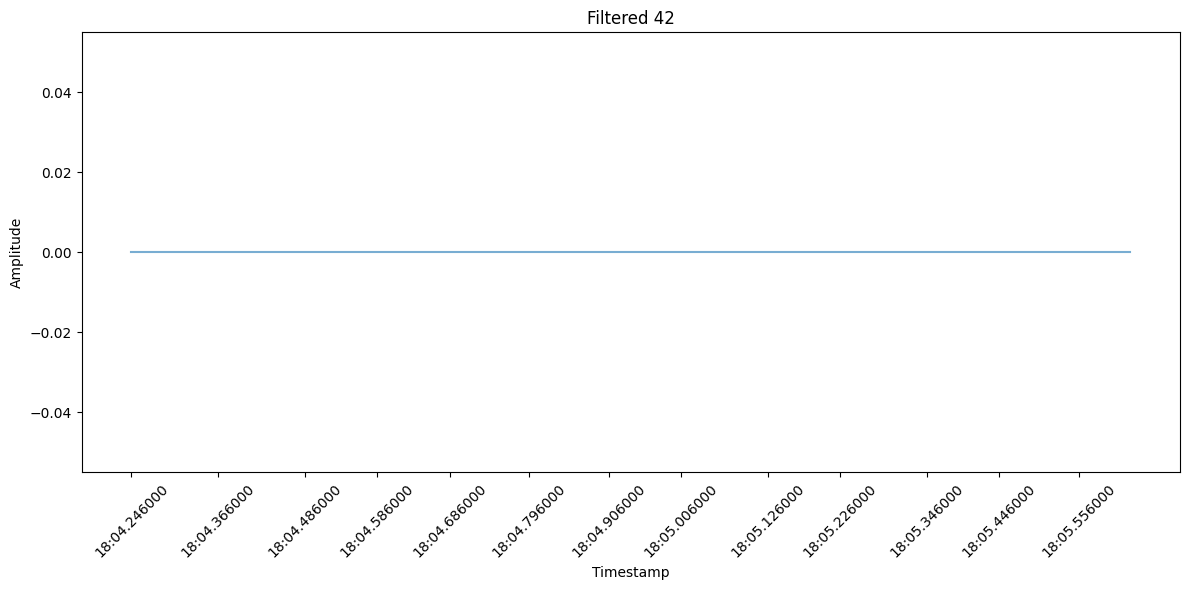

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141807.csv


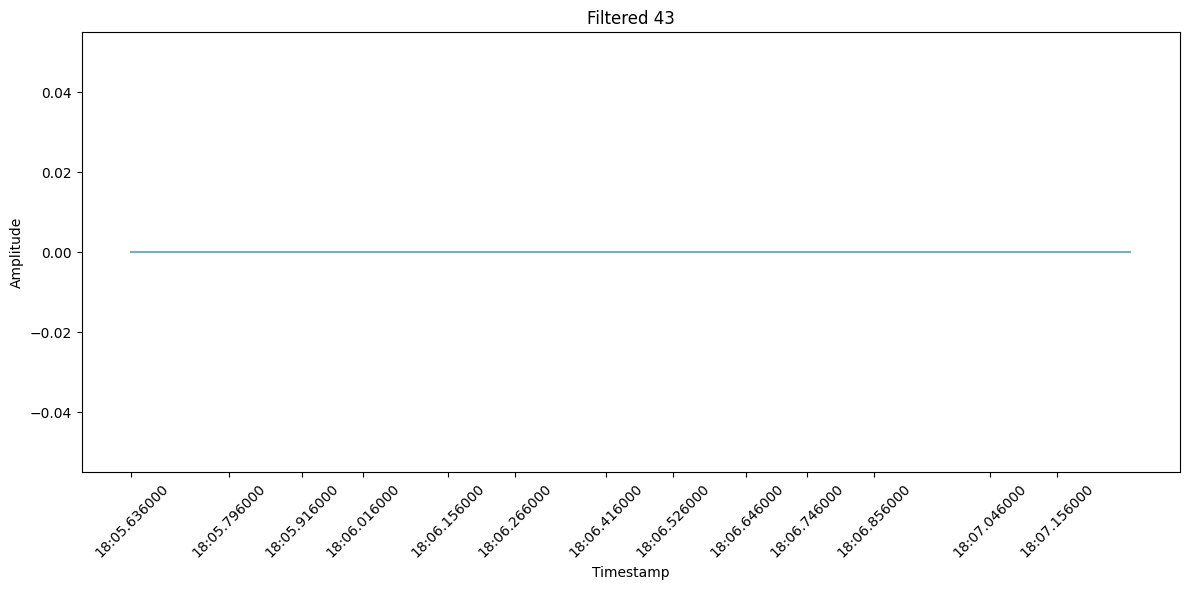

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141809.csv


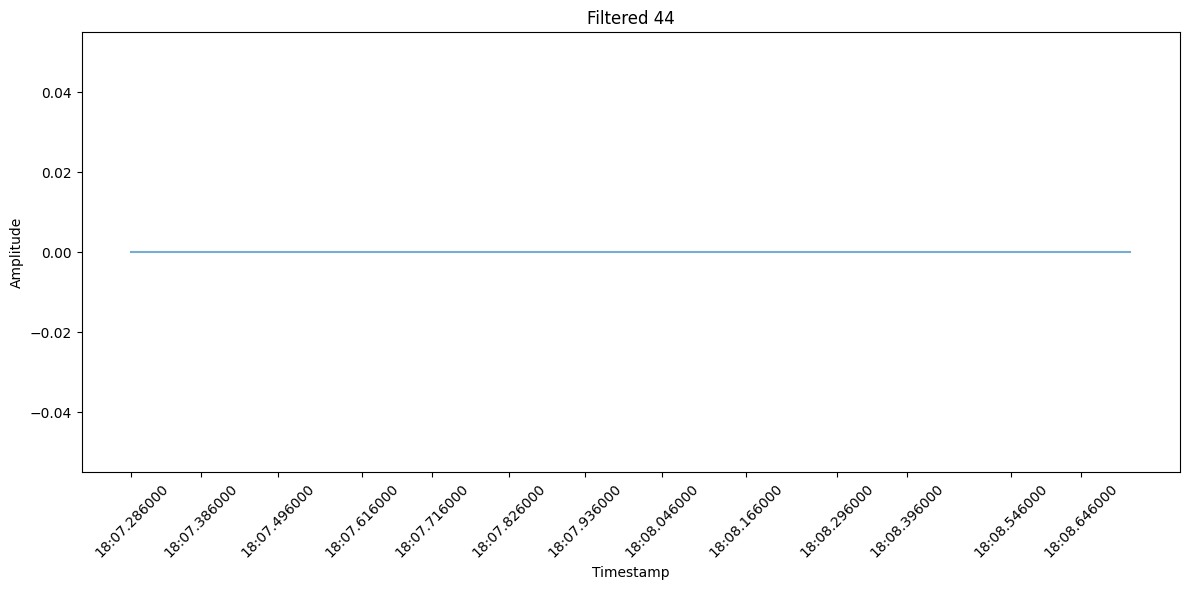

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141810.csv


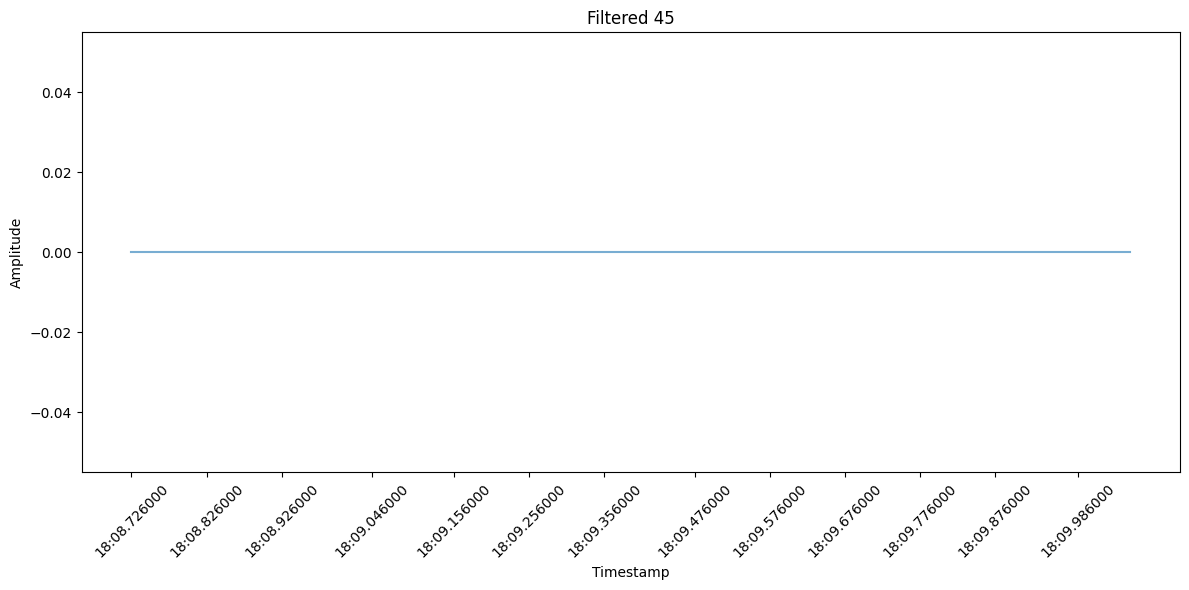

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141812.csv


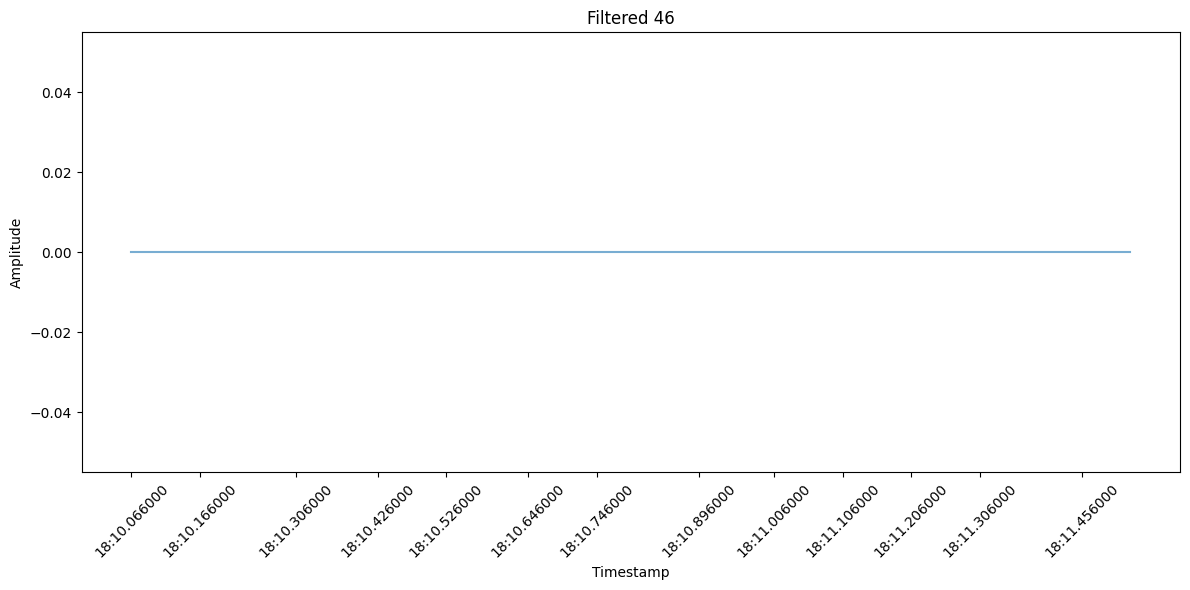

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141813.csv


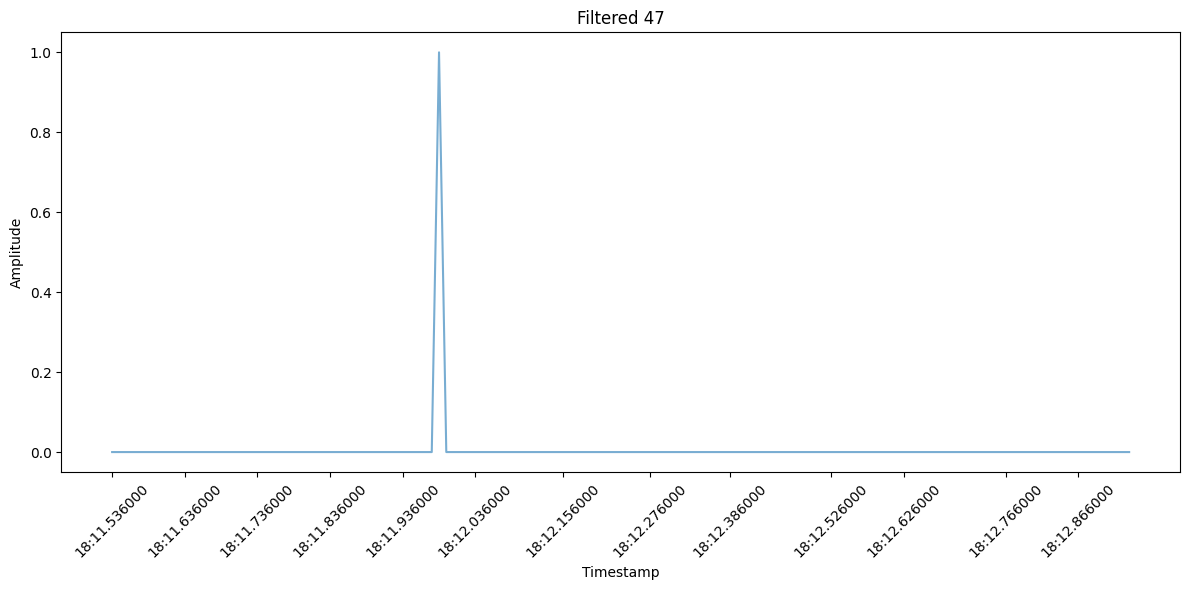

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141815.csv


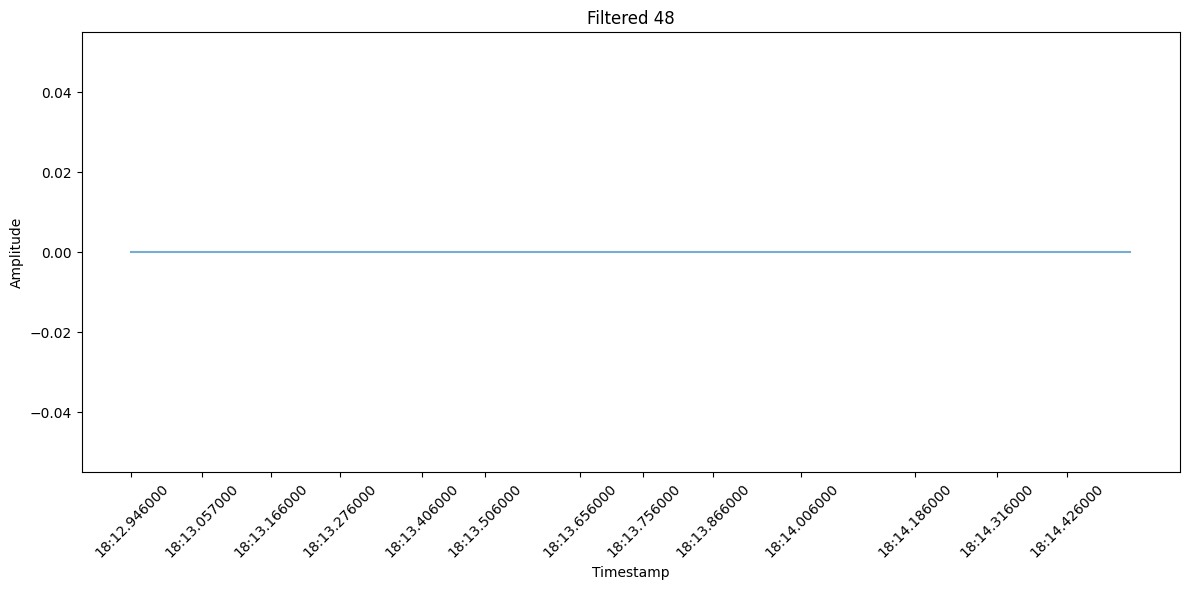

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141816.csv


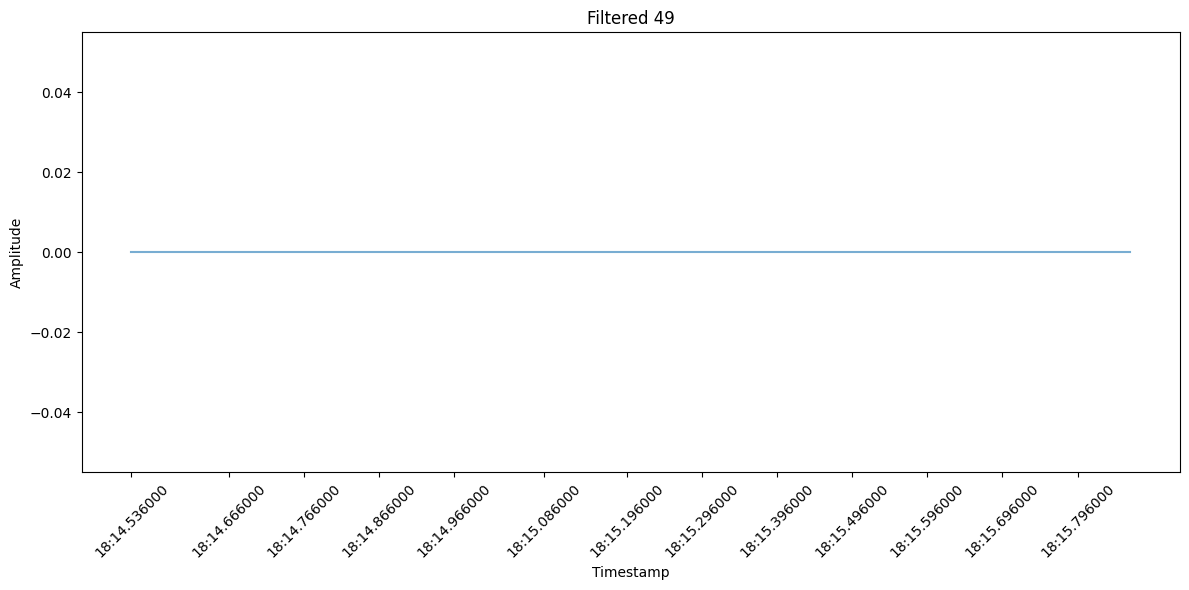

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141817.csv


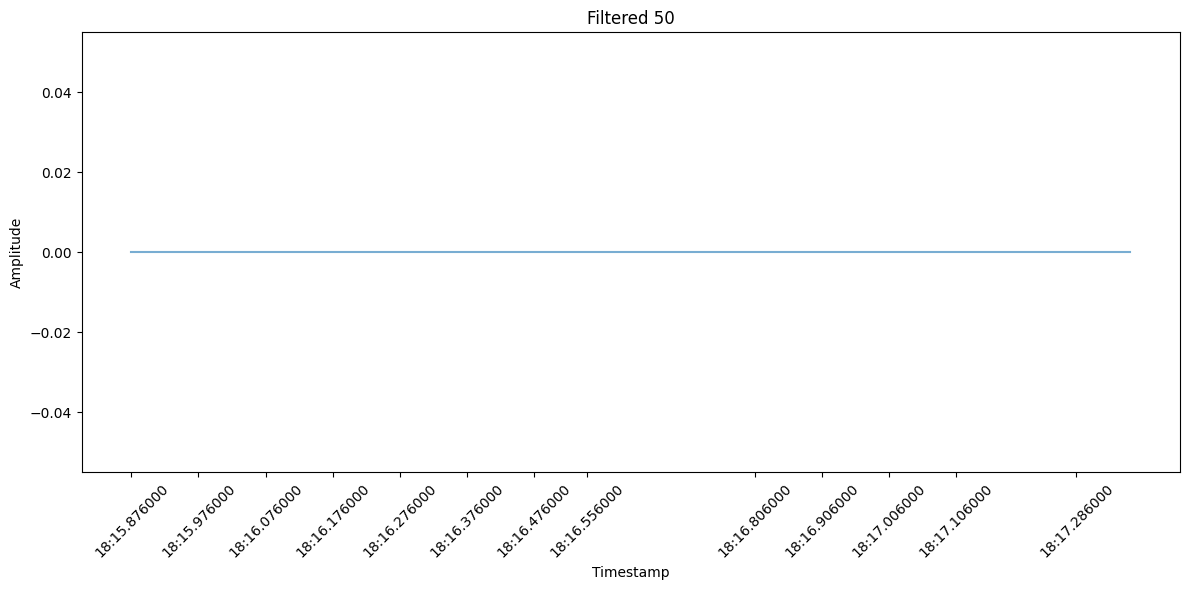

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141819.csv


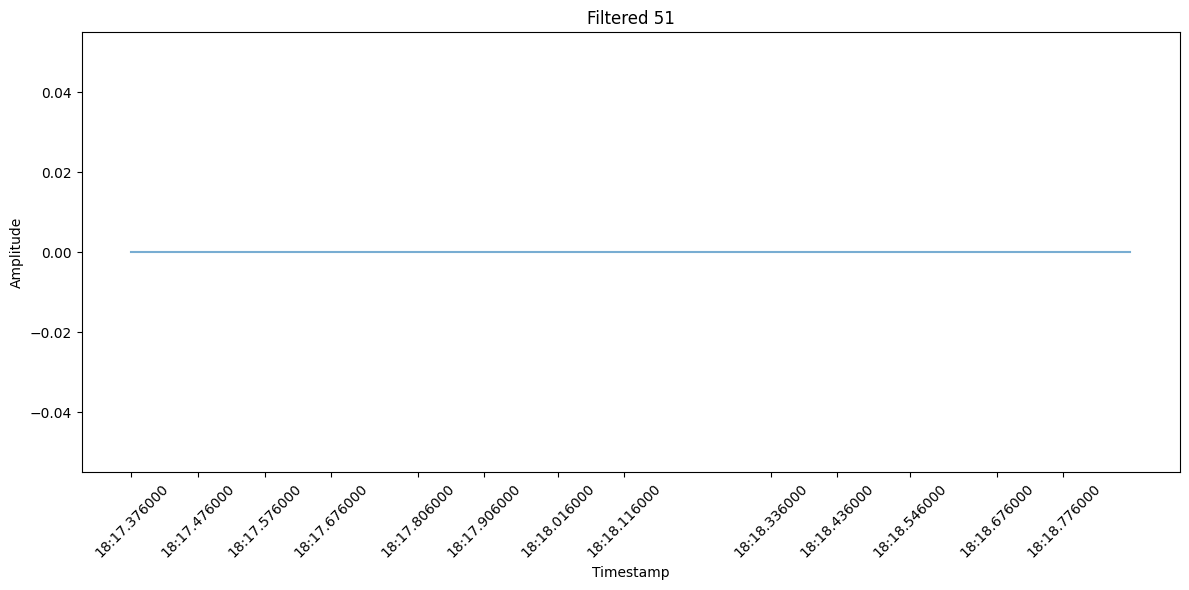

In [26]:
NO_ACTIVITY_CSI_PATHS = glob.glob(r"data\raw\raw_noActivity_csi\L0382*.csv")
for idx, csv_file in enumerate(ACTIVITY_CSI_PATHS):
    print(csv_file)
    activity_sig, ts = preprocess_complex_pipeline(CSI_PATH=csv_file)
    activity_sig = activity_sig @ W
    test = np.mean(np.abs(activity_sig)[:,:4],axis=1)>5

    plot_csi_amplitude(test[:,None], ts, title=f'Filtered {idx}', FRAME_NUM=500)
    if idx > 50:
        break


data\raw\raw_activity_csi\L0382_ESP_8_20250521_142006.csv


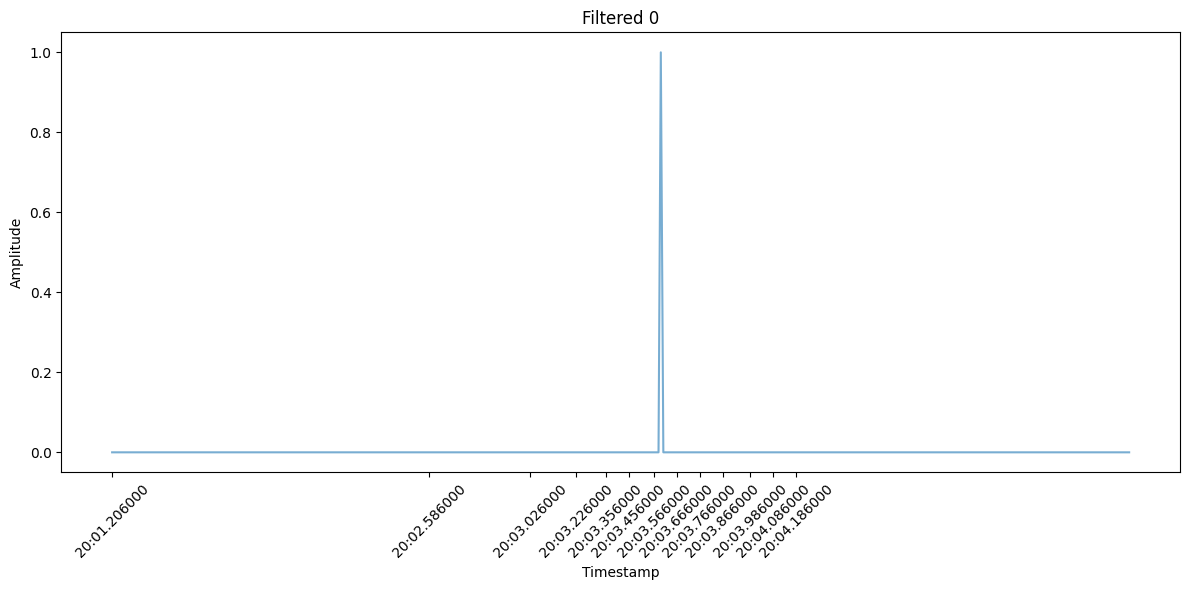

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142007.csv


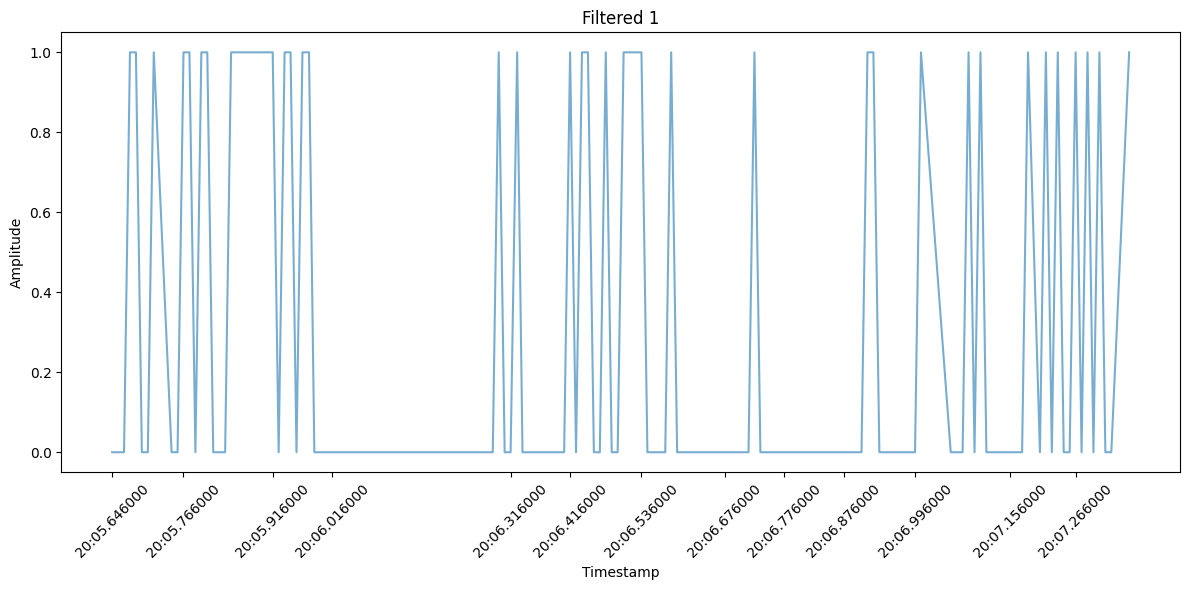

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142010.csv


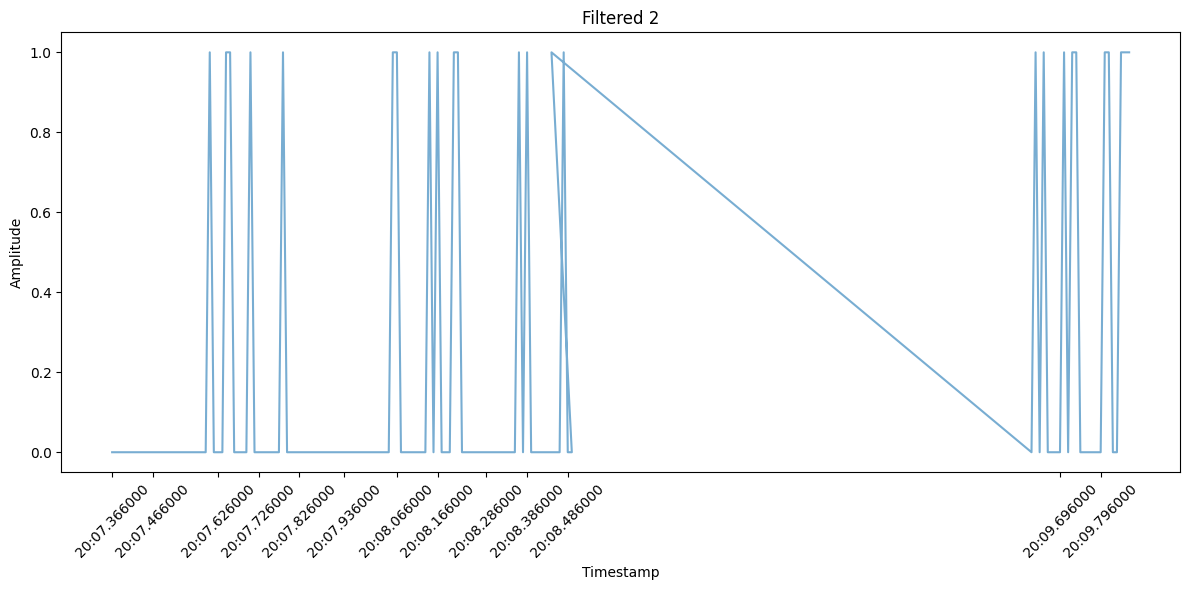

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142012.csv


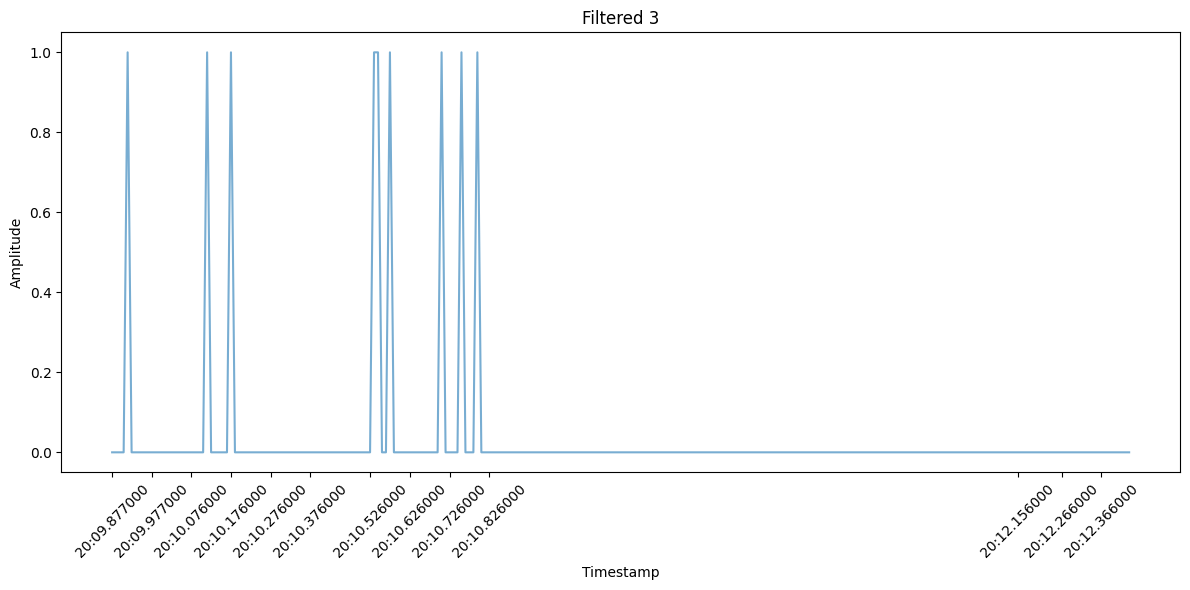

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142017.csv


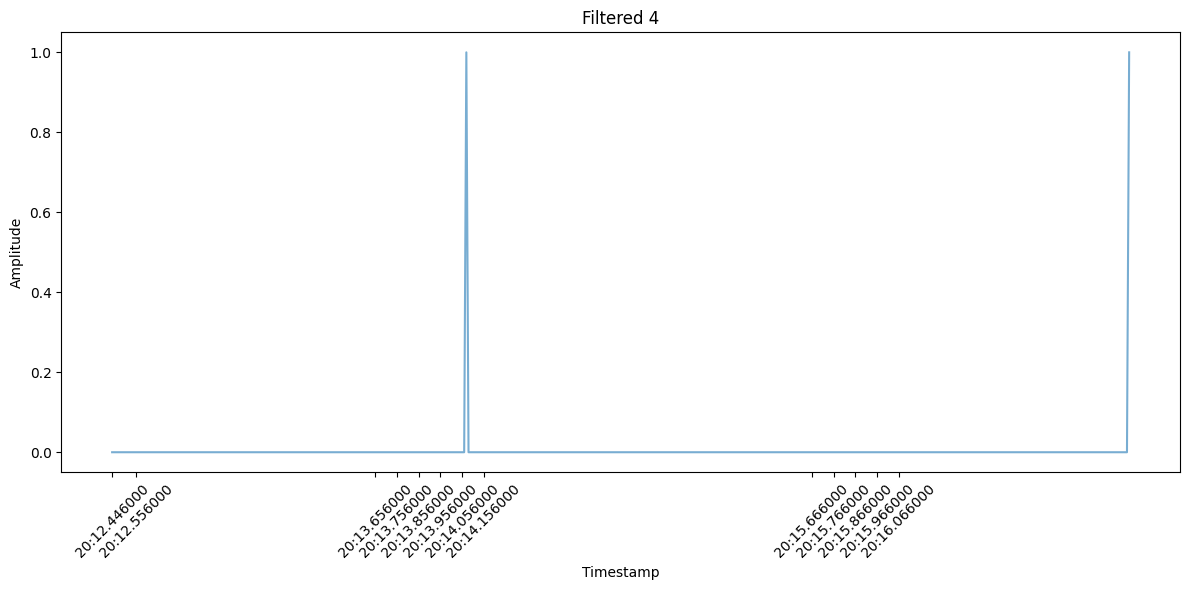

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142020.csv


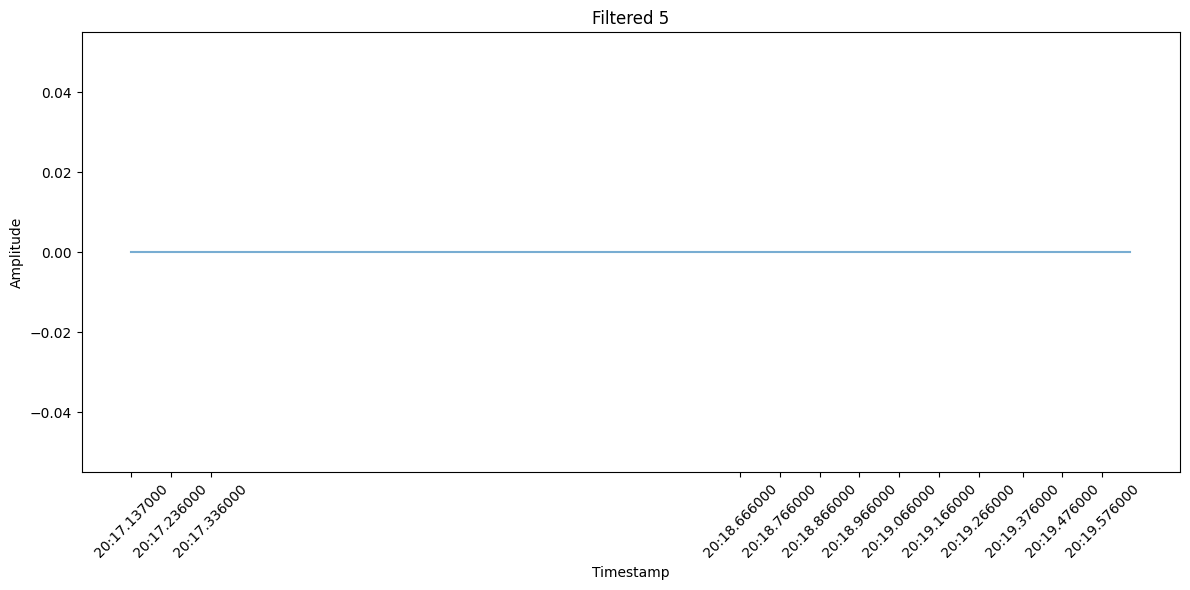

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142021.csv


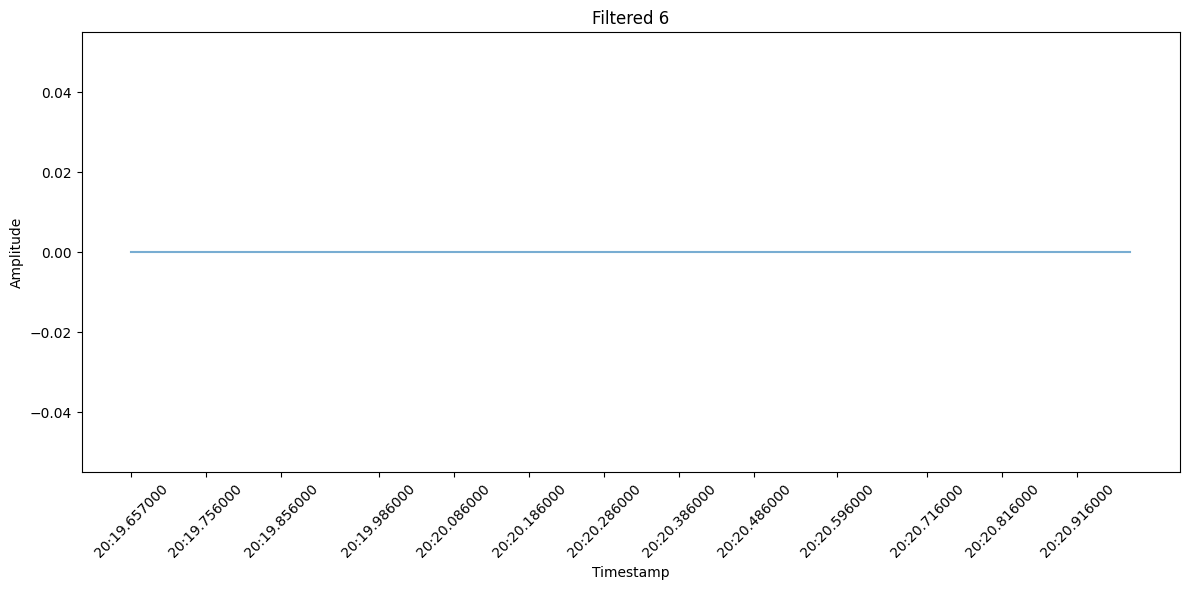

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142025.csv


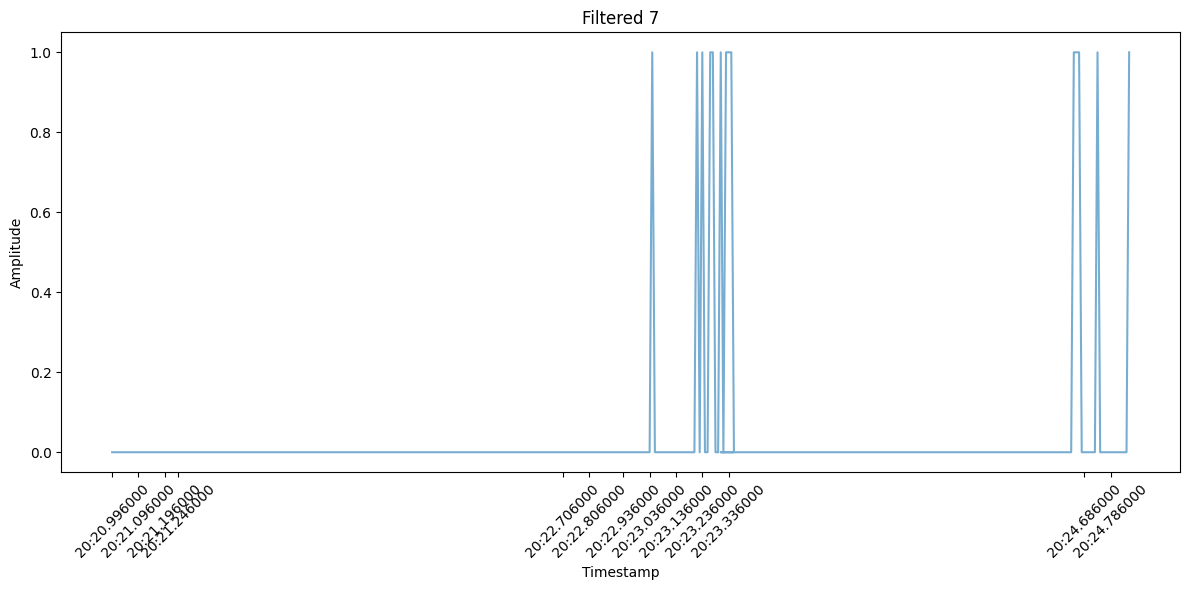

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142026.csv


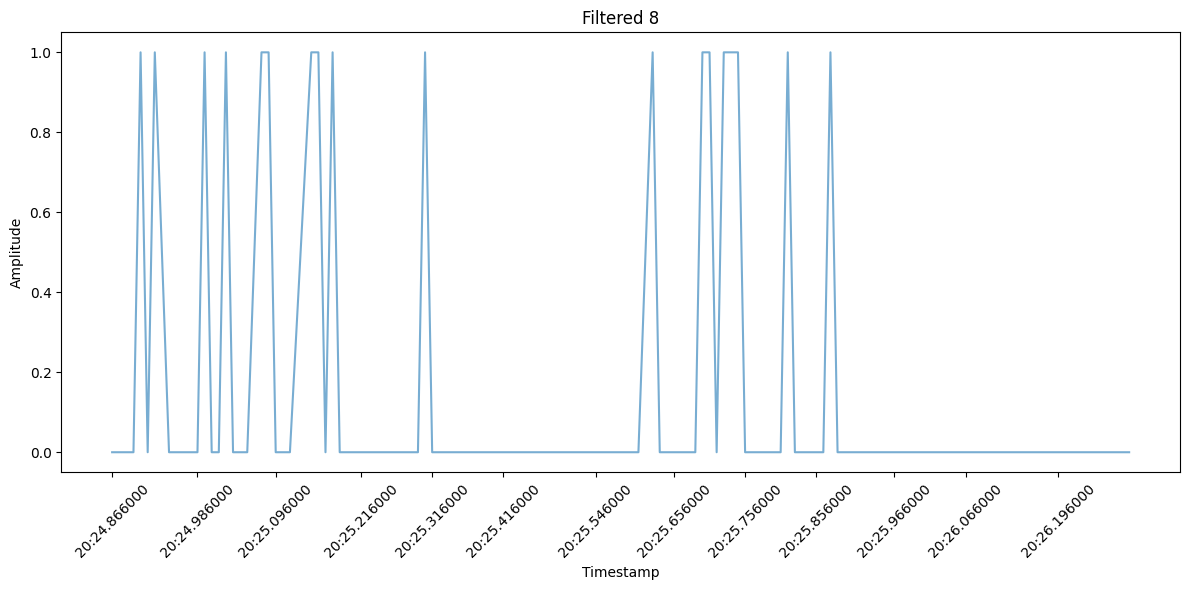

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142028.csv


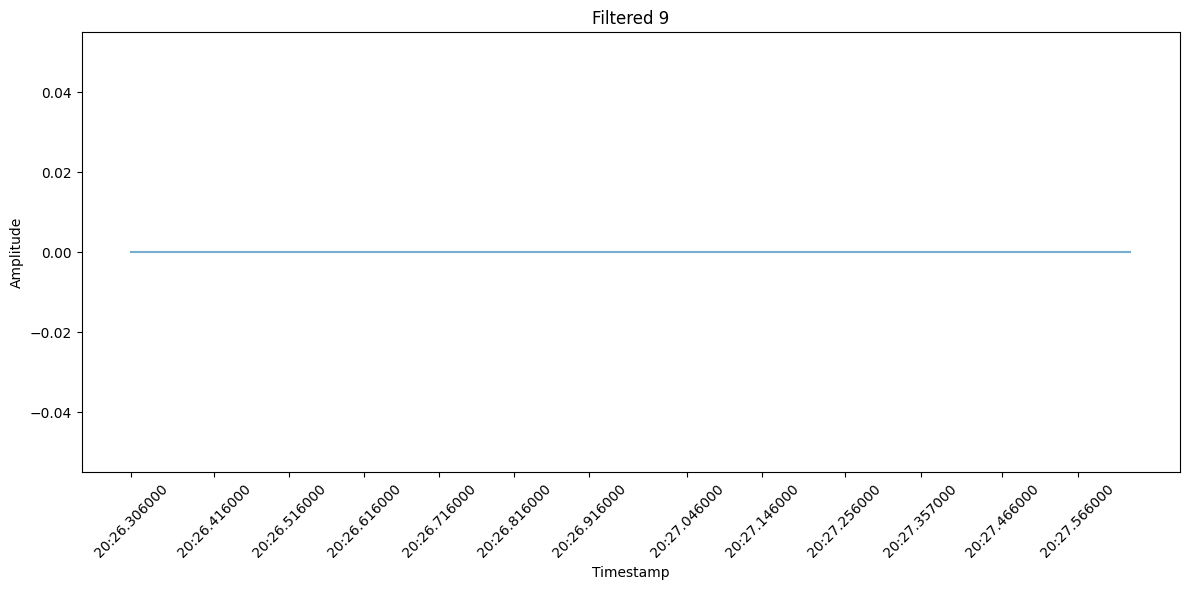

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142029.csv


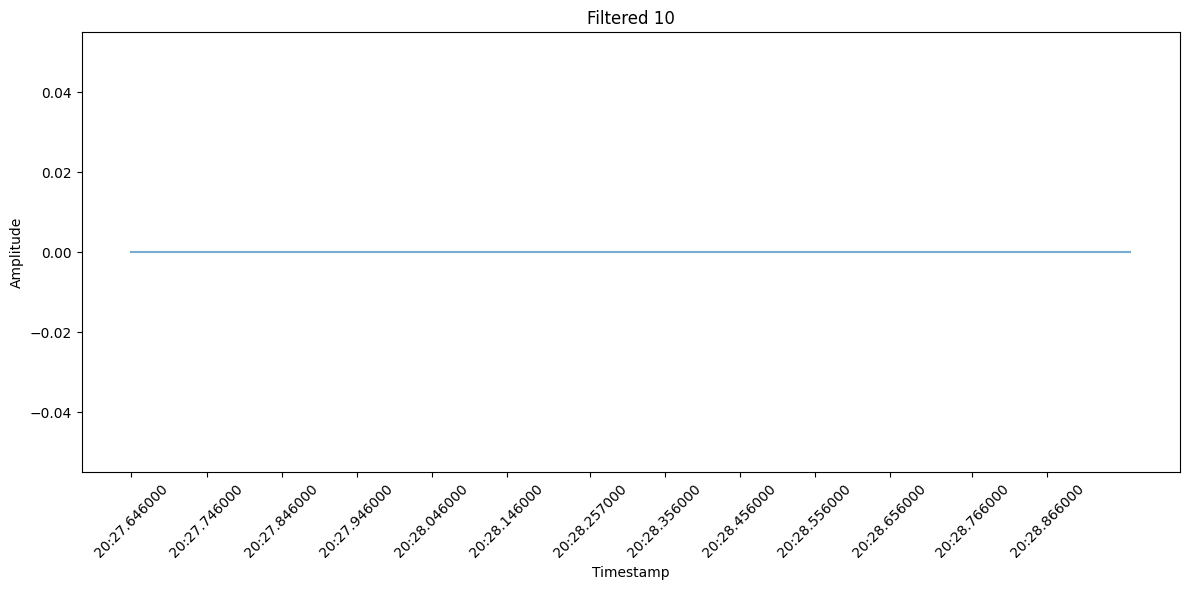

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142030.csv


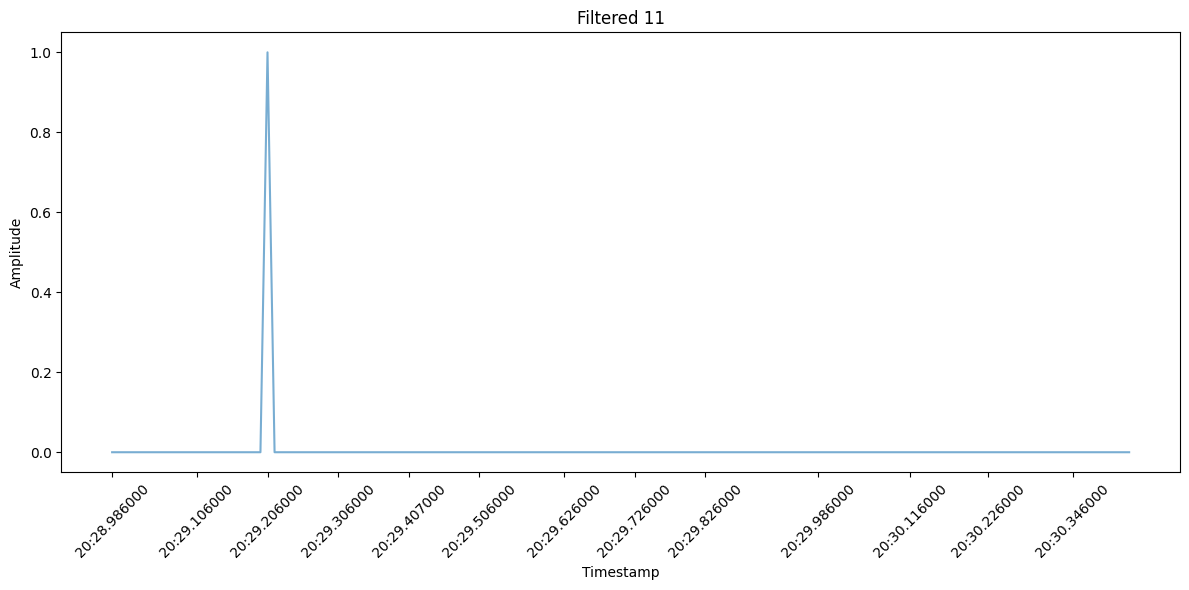

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142032.csv


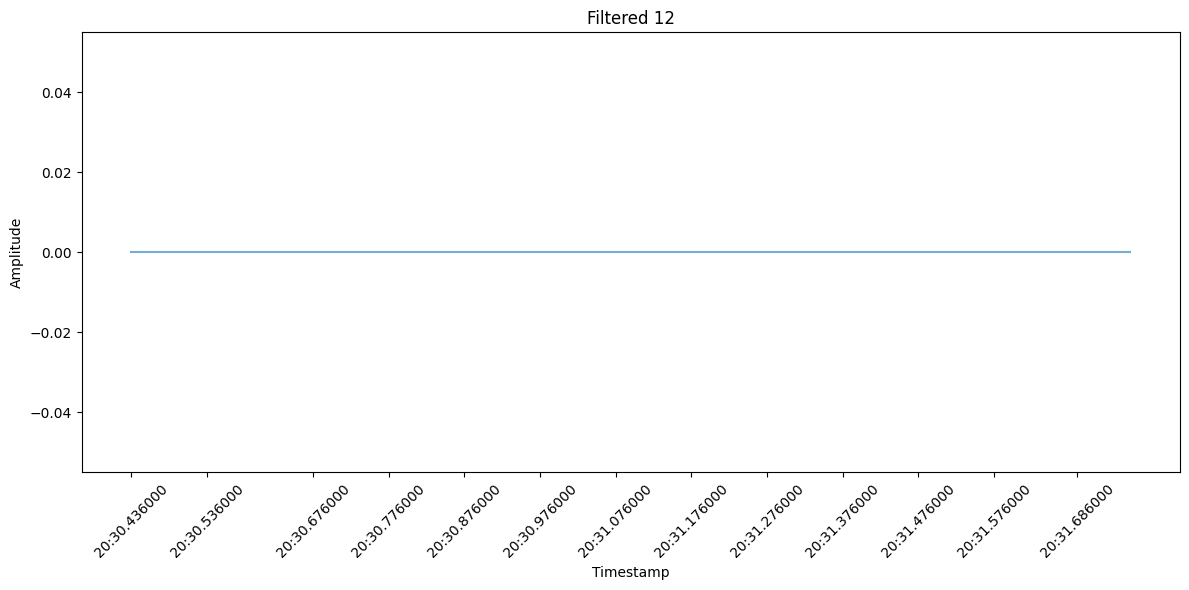

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142033.csv


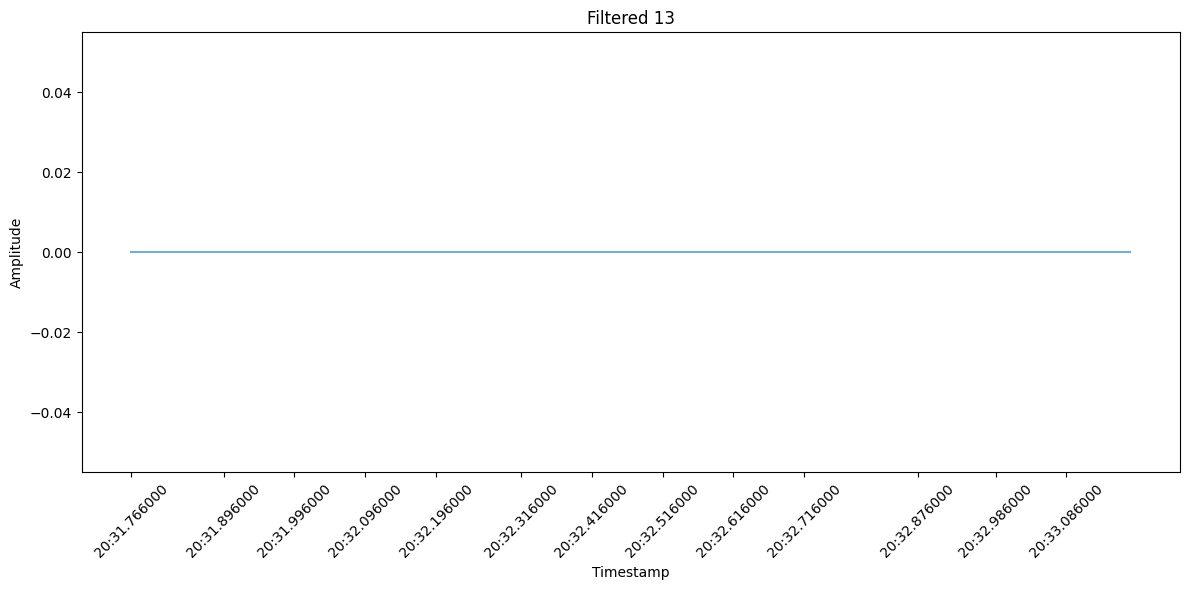

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142035.csv


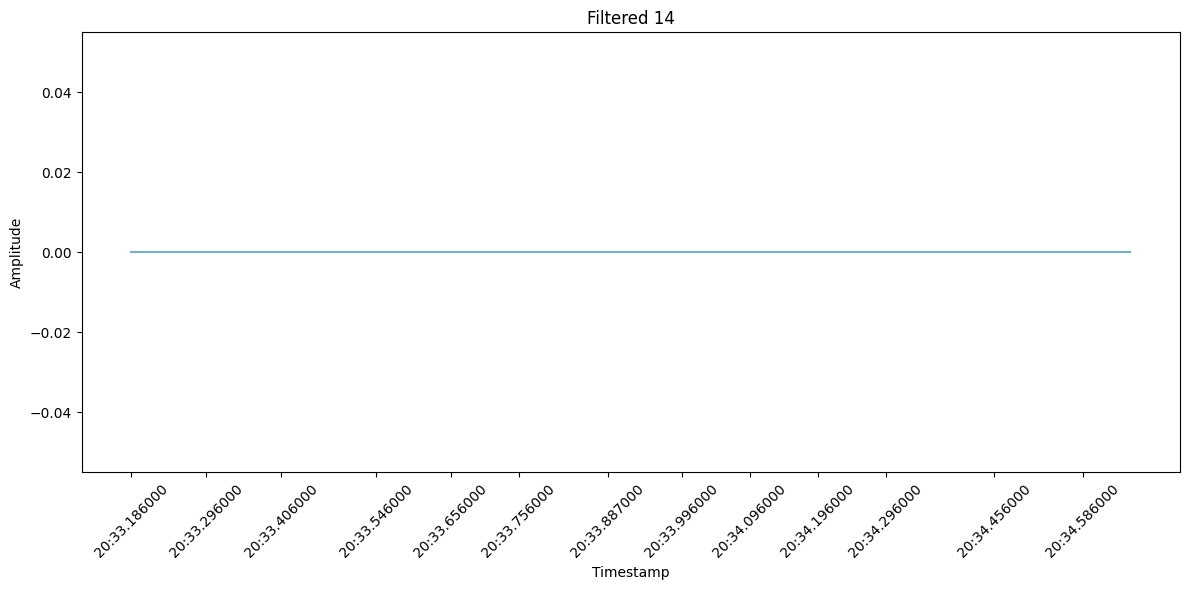

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142036.csv


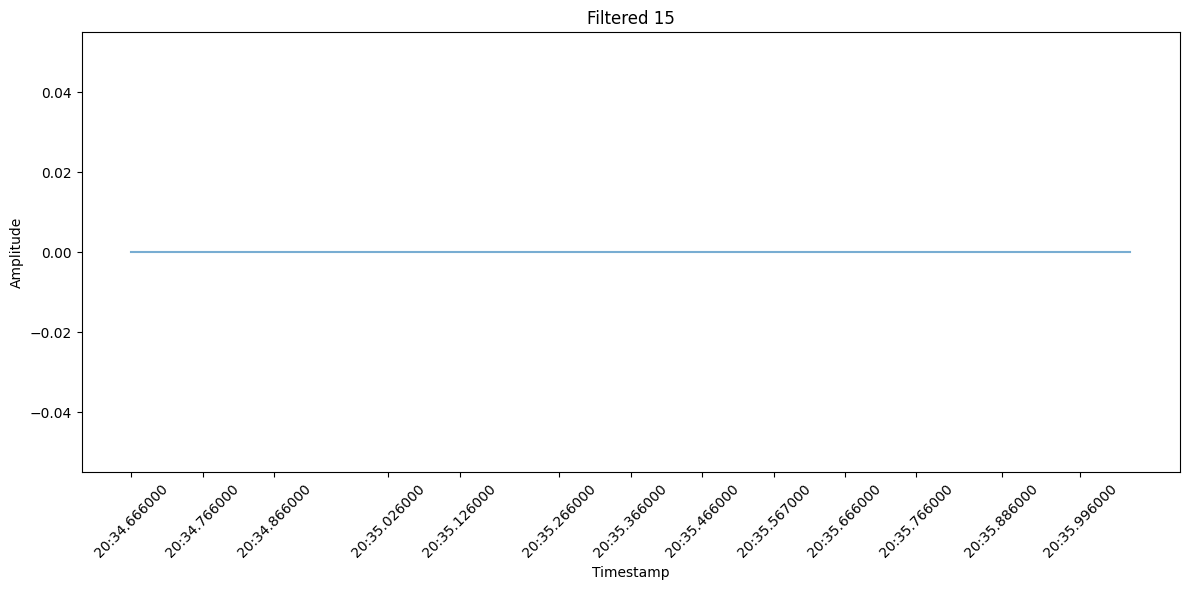

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142038.csv


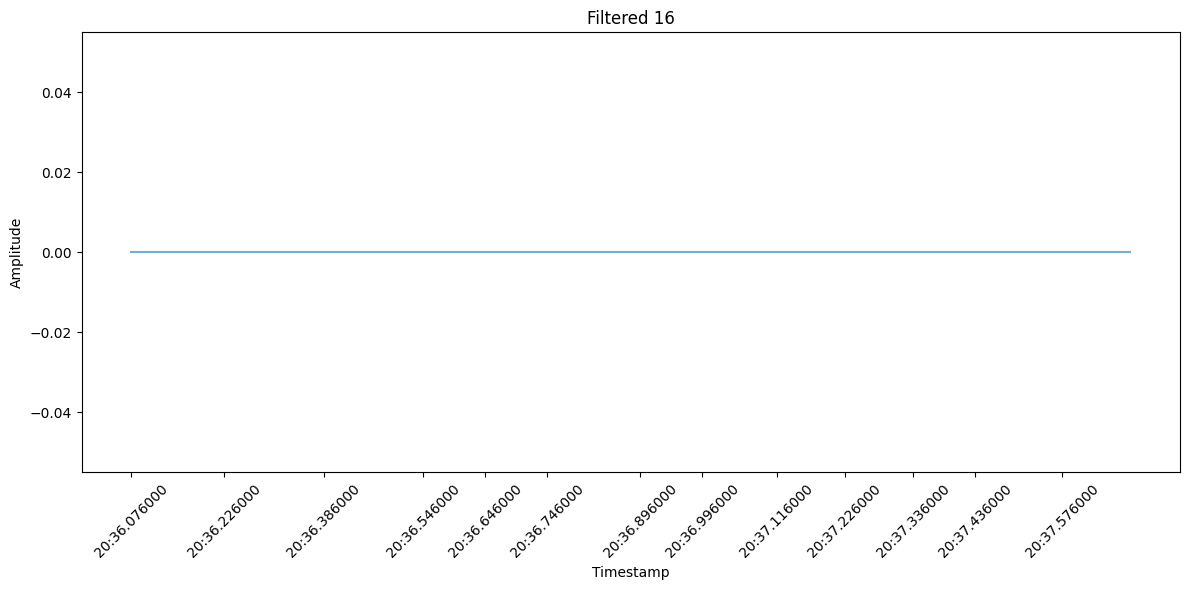

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142039.csv


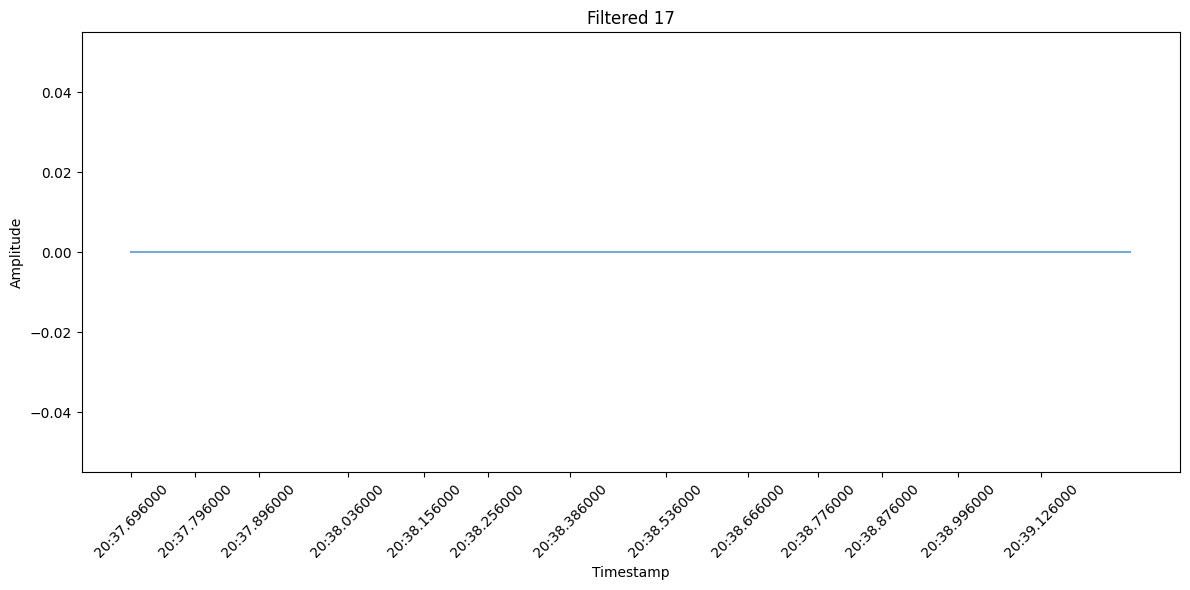

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142041.csv


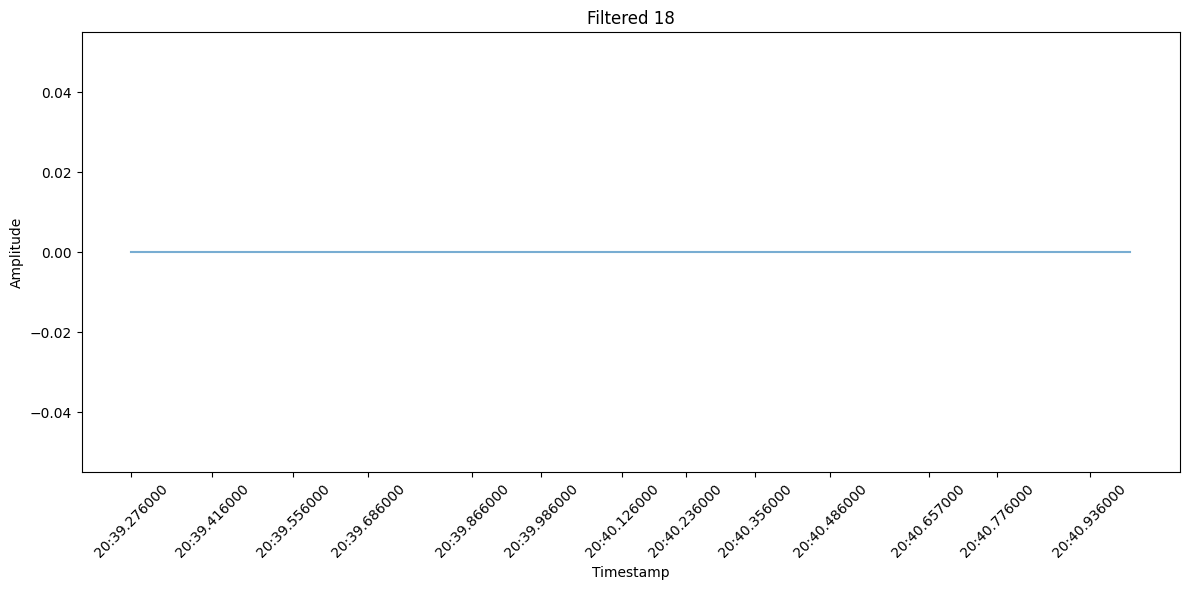

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142043.csv


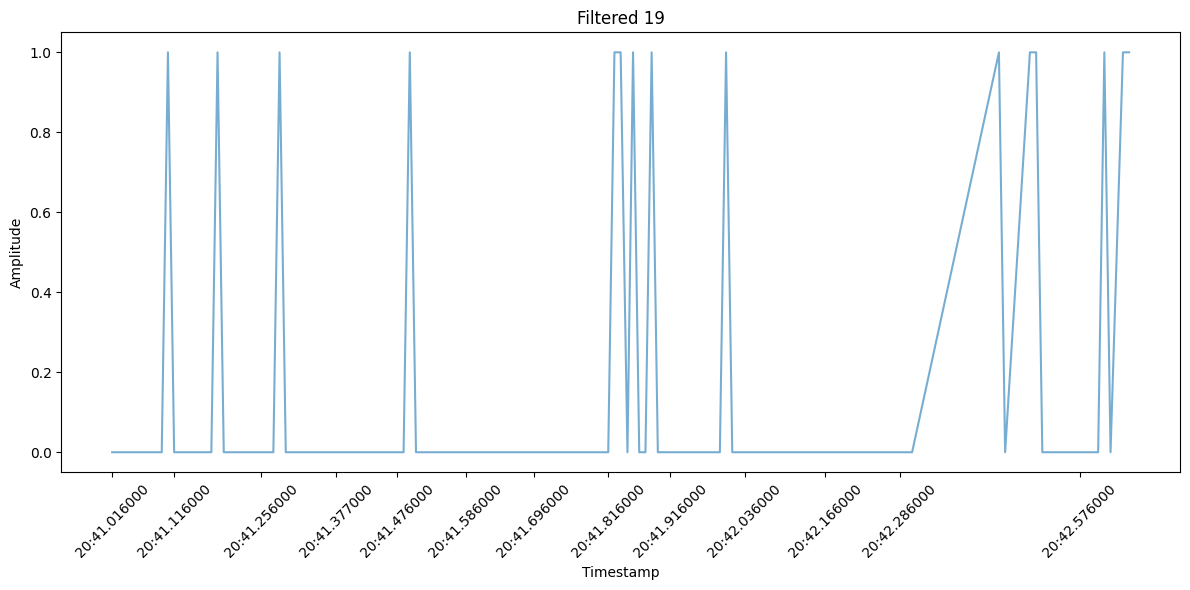

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142044.csv


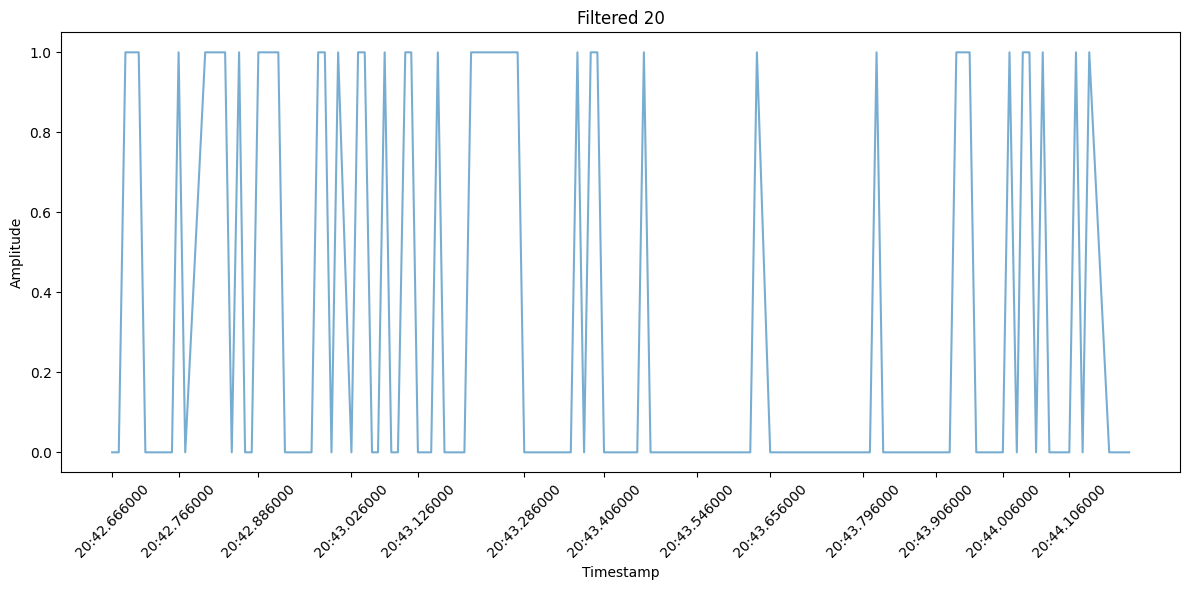

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142047.csv


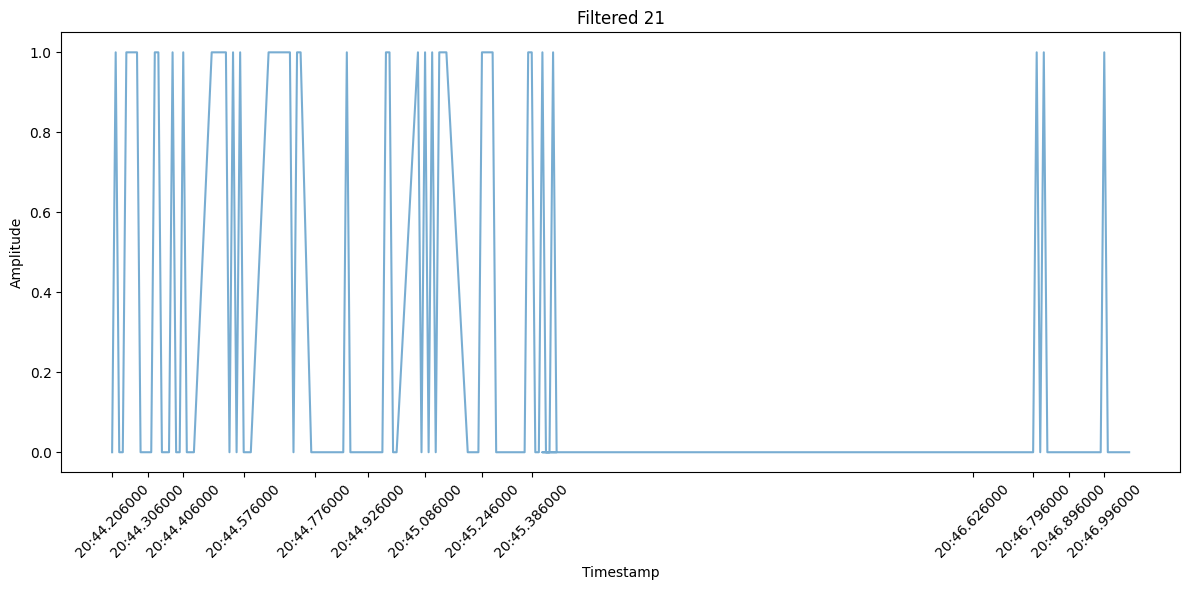

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142048.csv


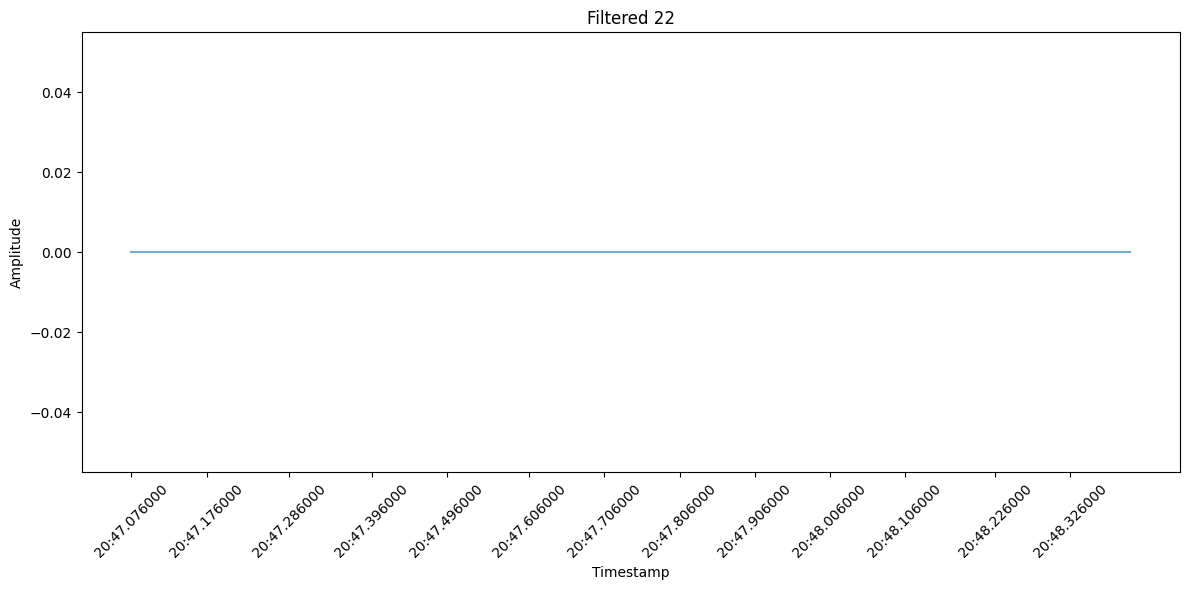

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142050.csv


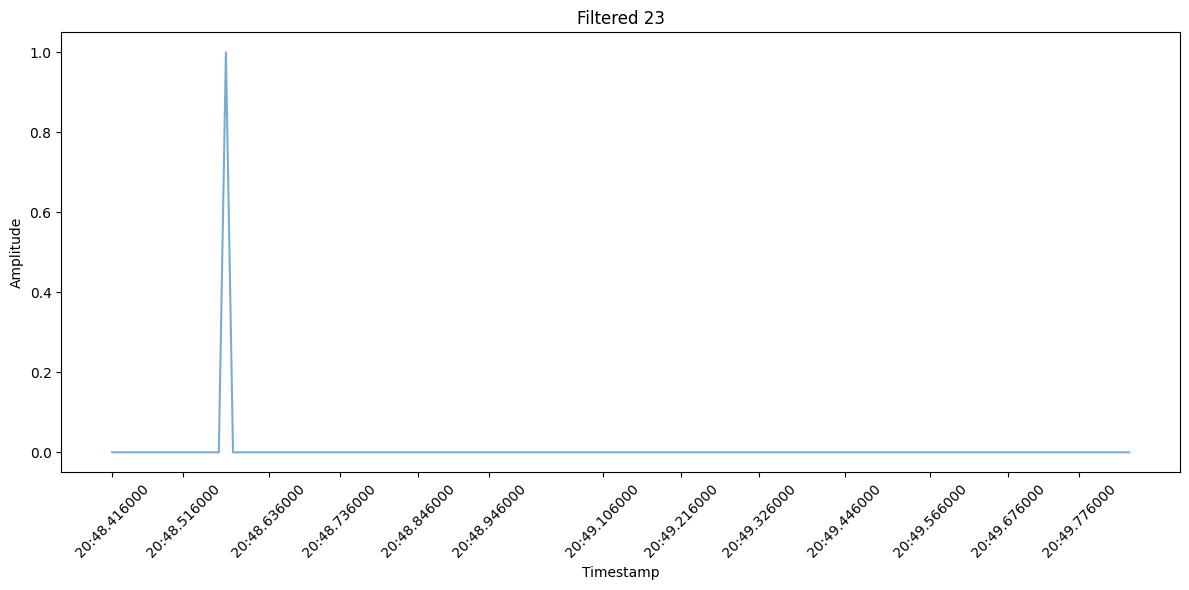

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142051.csv


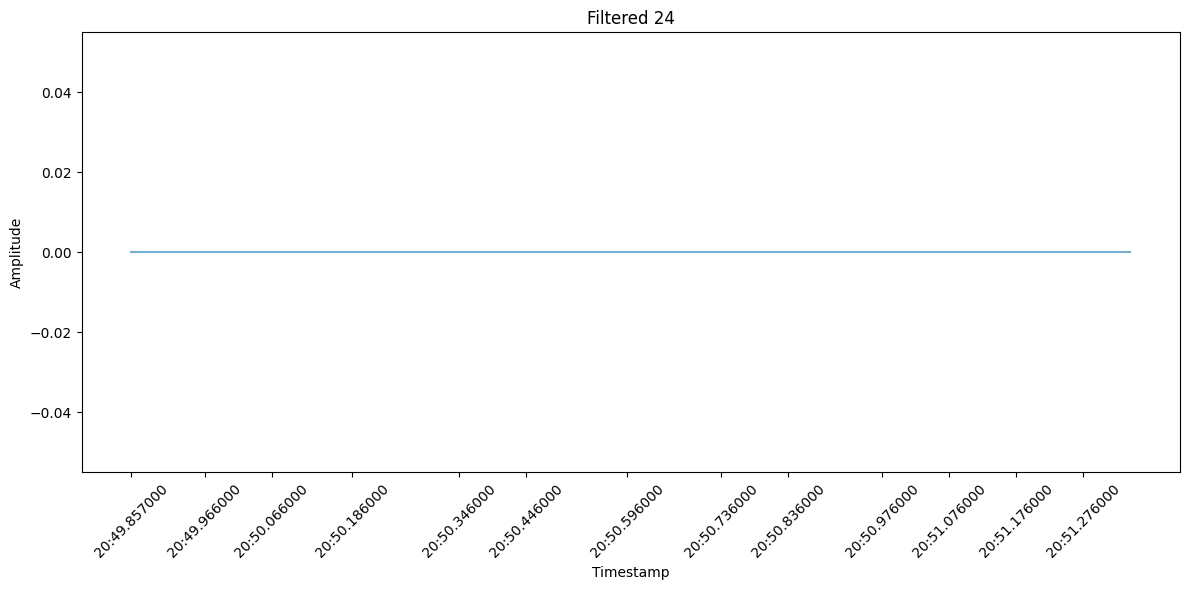

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142053.csv


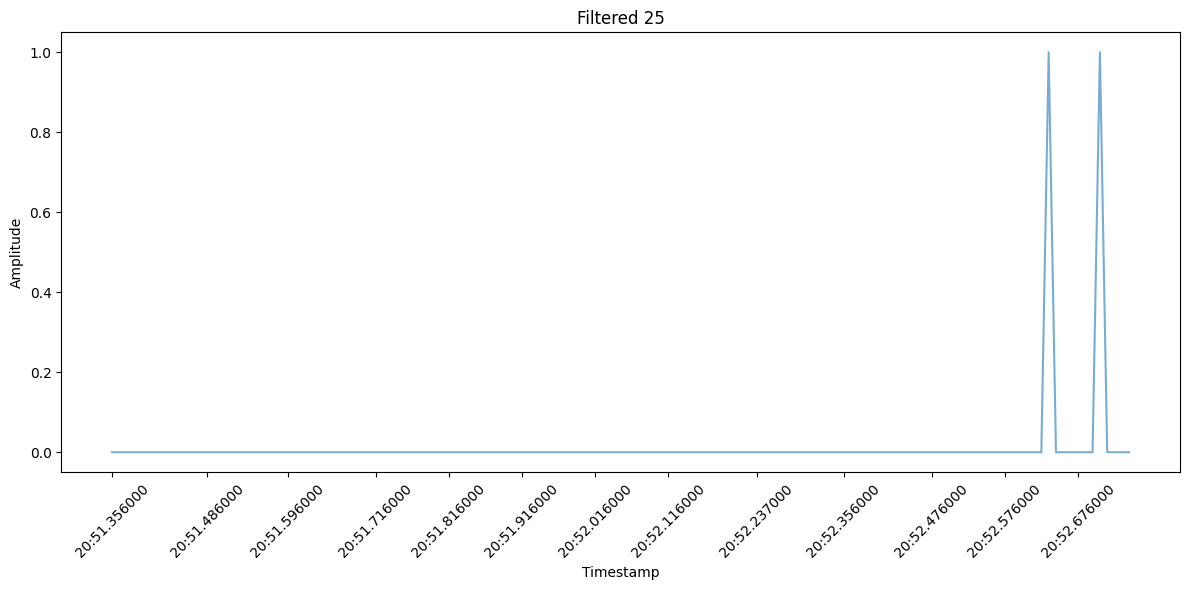

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142054.csv


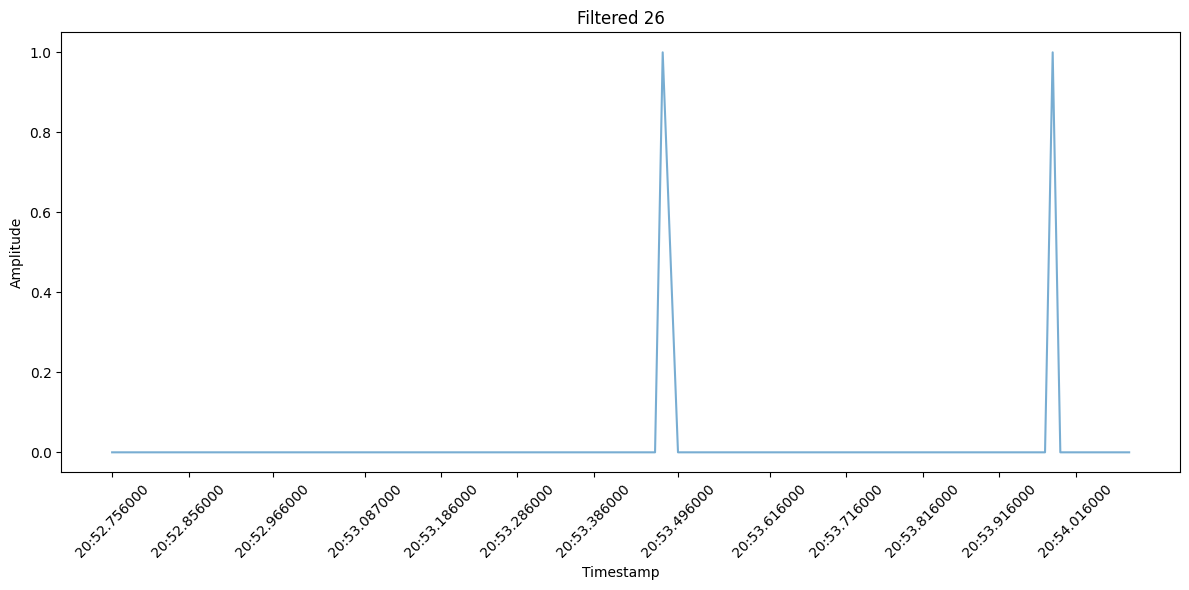

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142055.csv


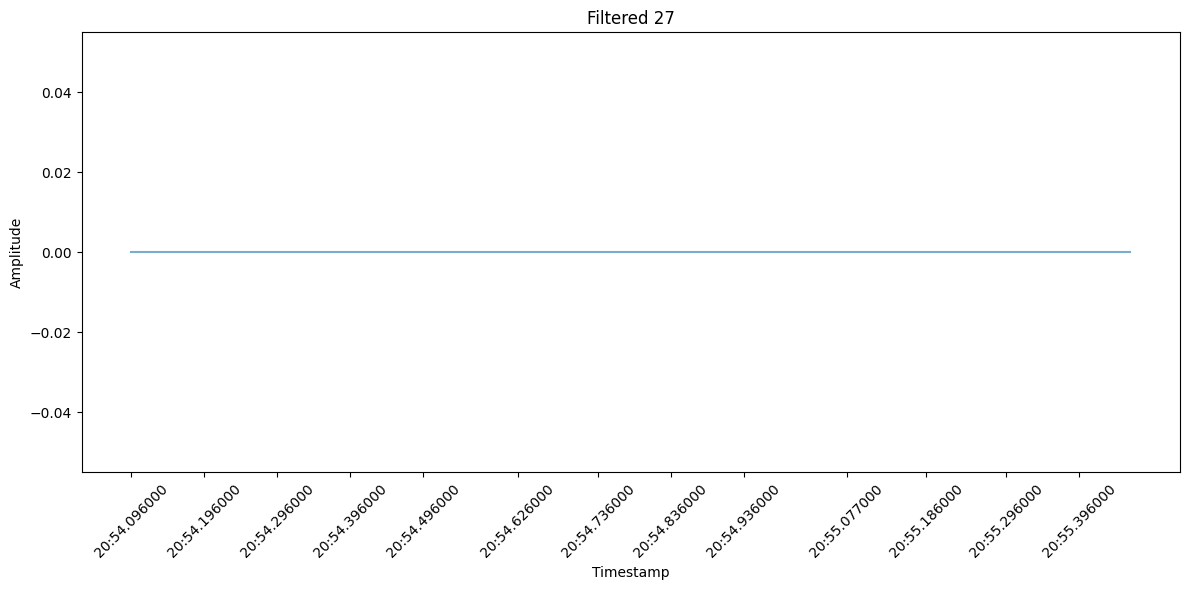

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142057.csv


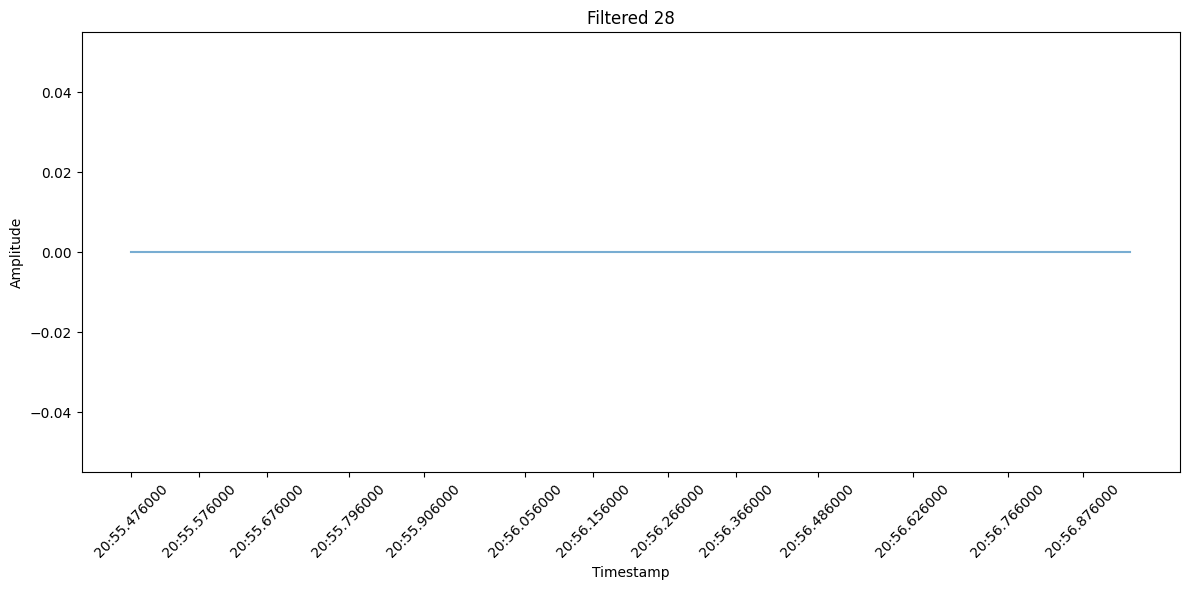

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142058.csv


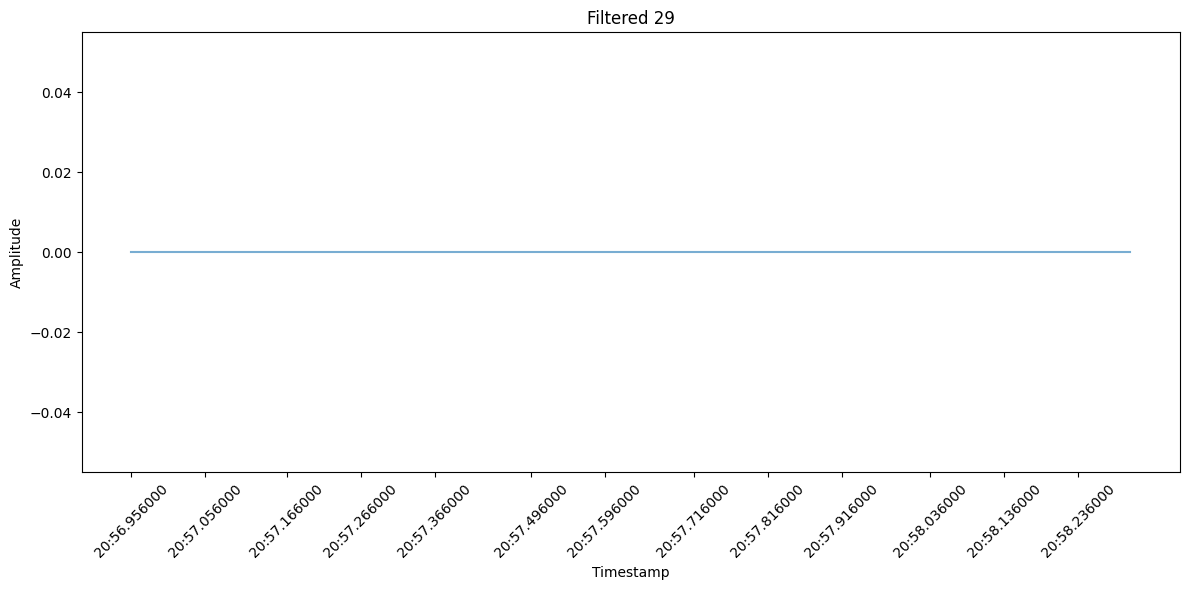

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142100.csv


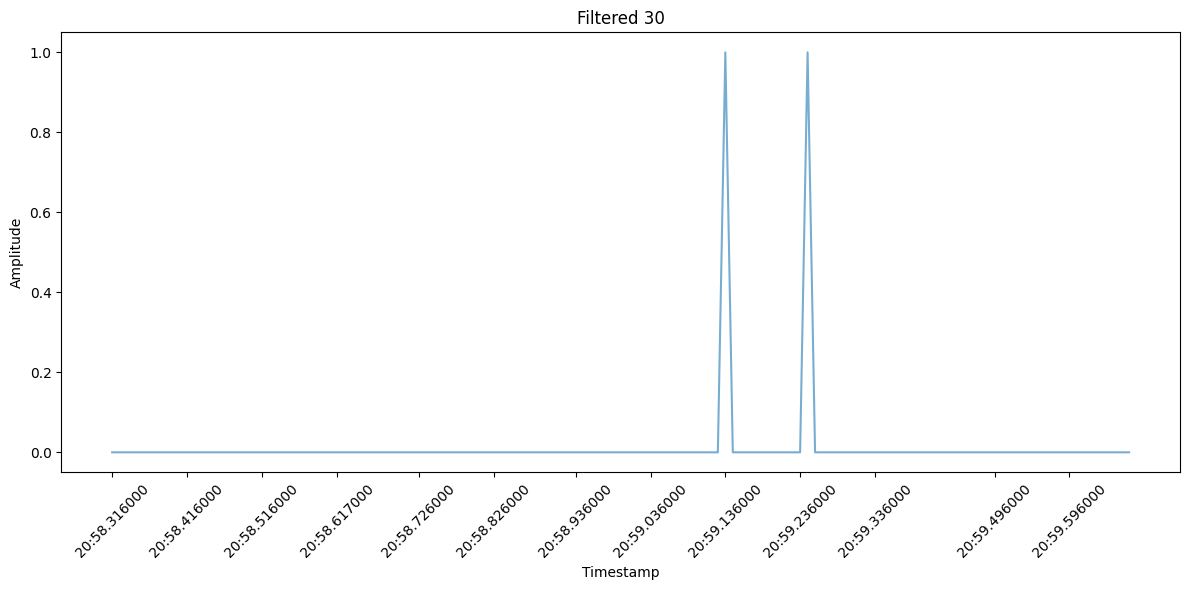

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142101.csv


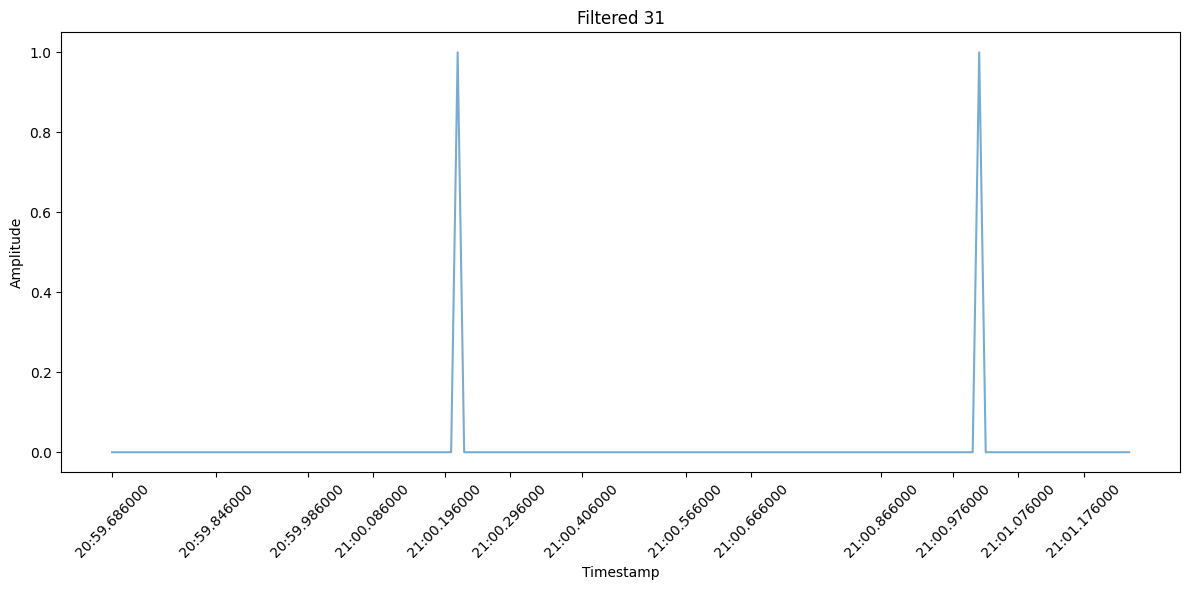

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142103.csv


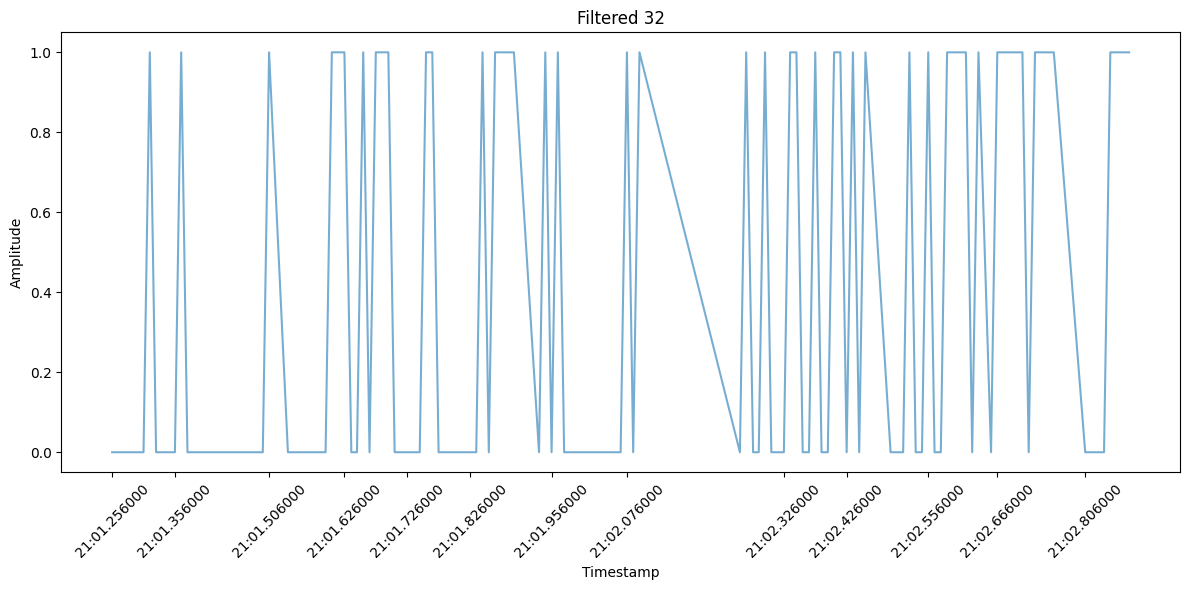

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142105.csv


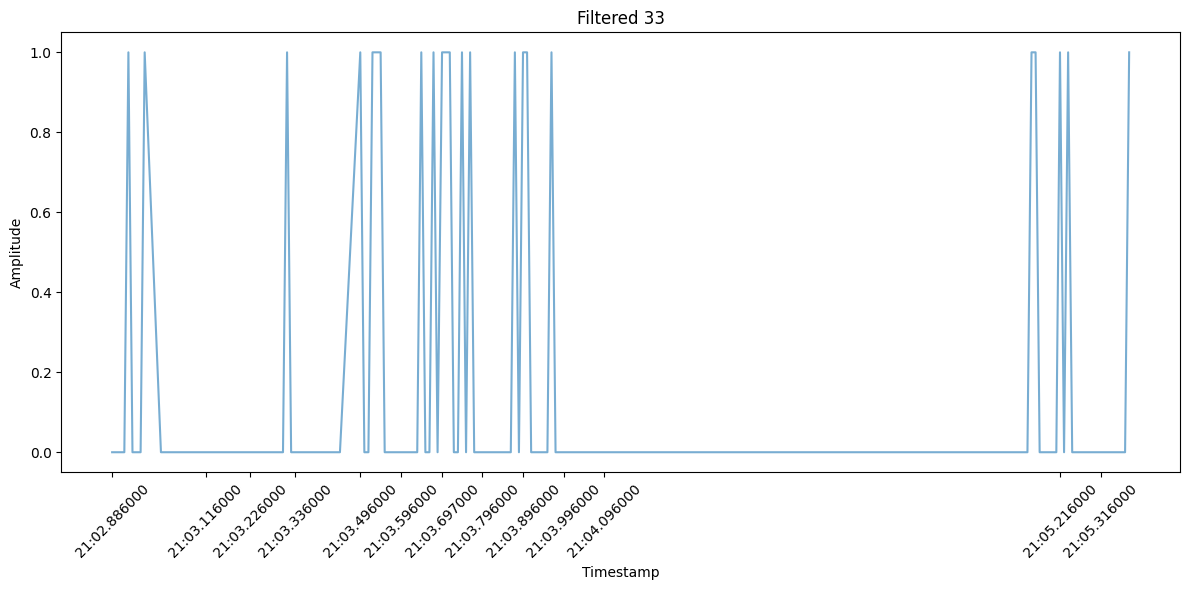

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142107.csv


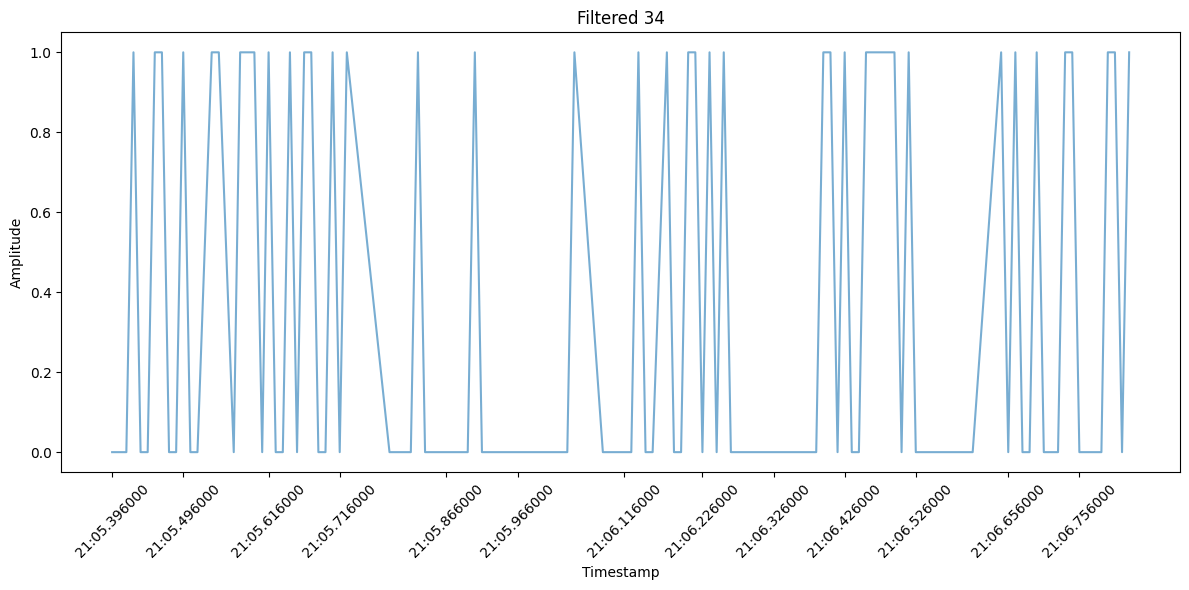

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142110.csv


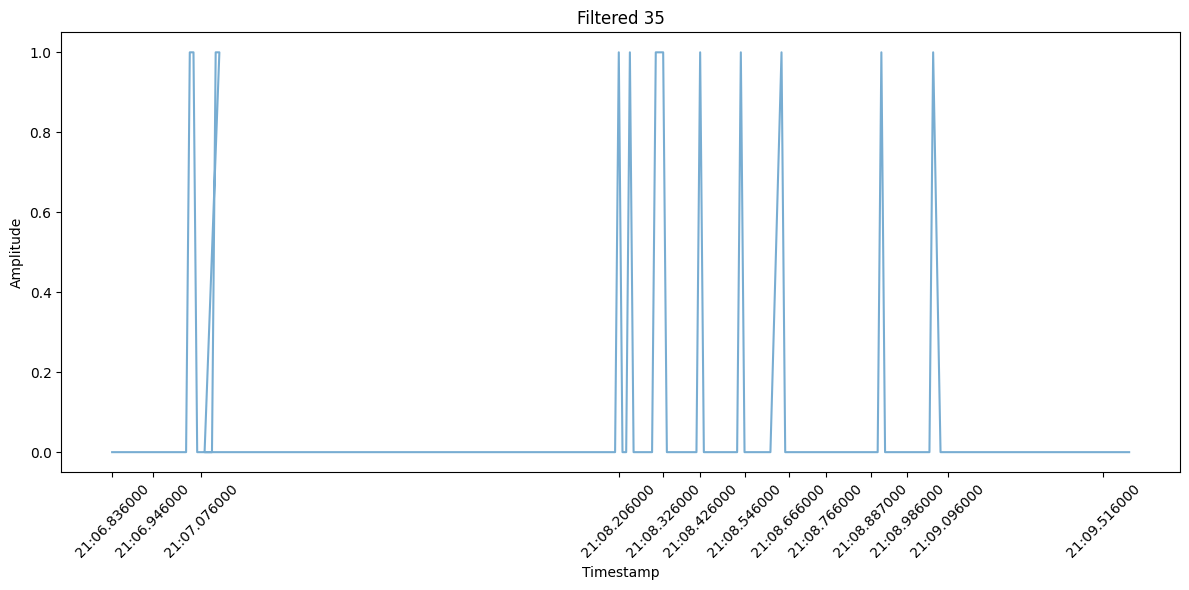

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142111.csv


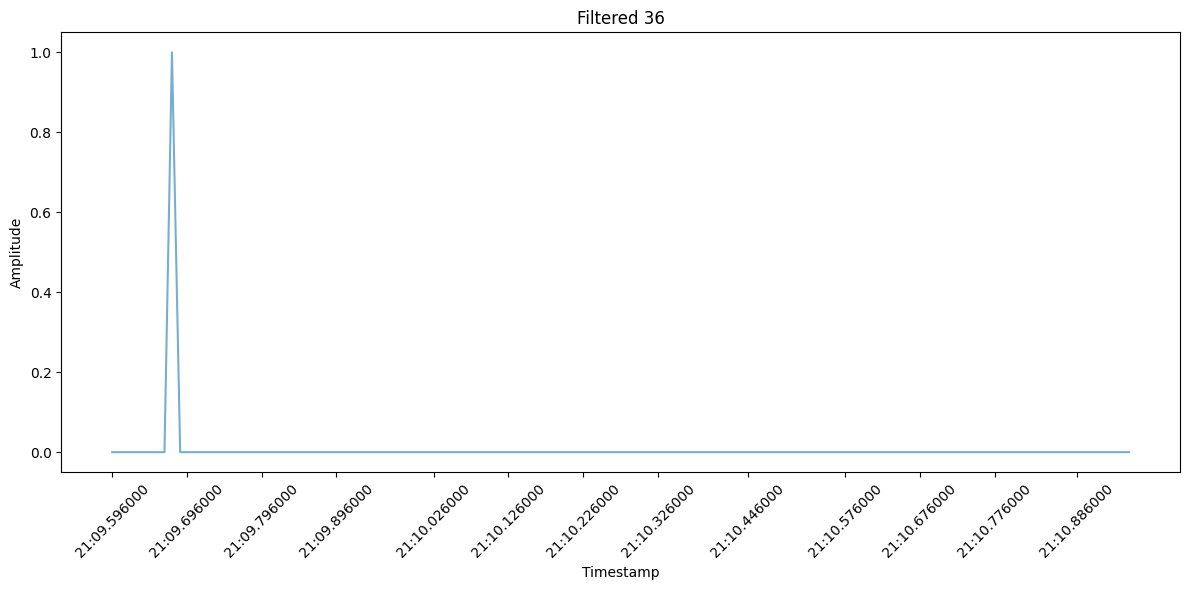

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142112.csv


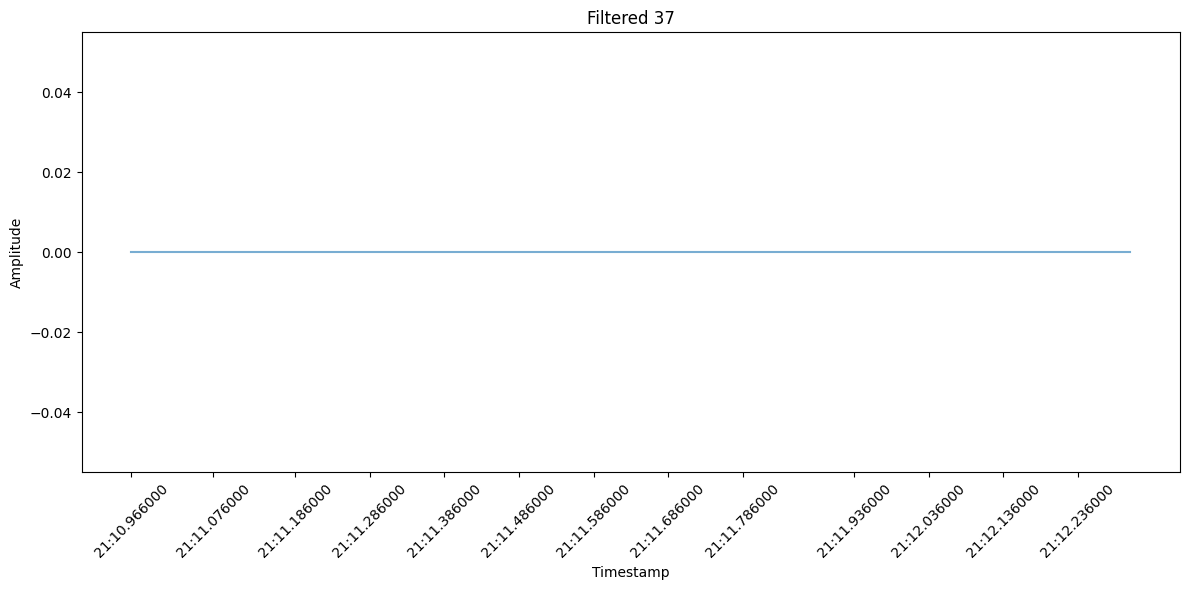

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142114.csv


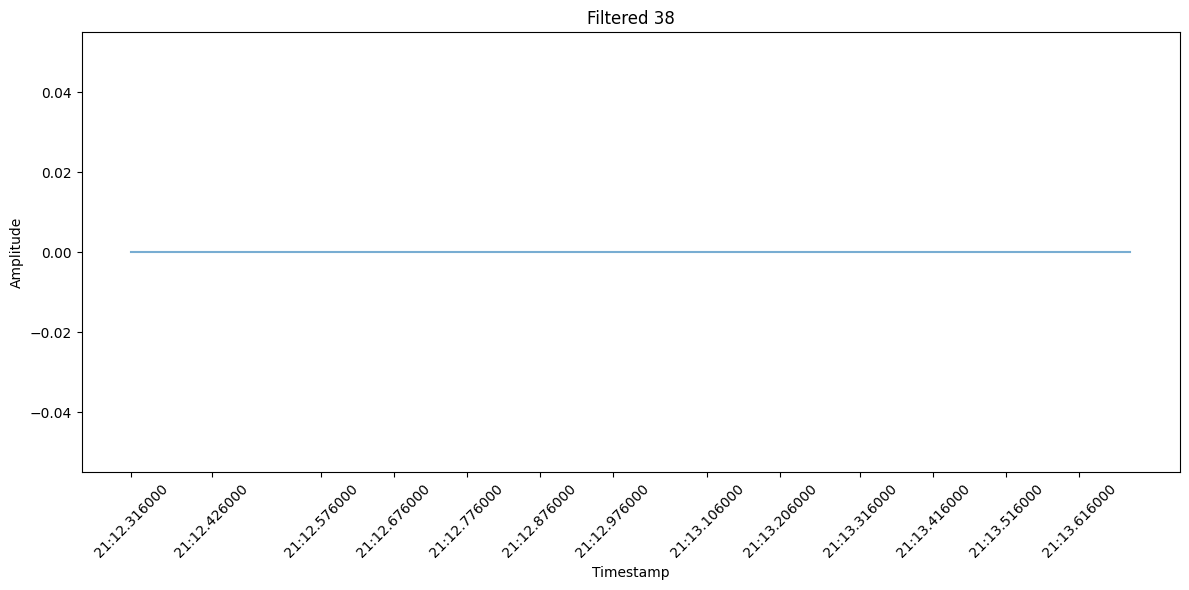

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142115.csv


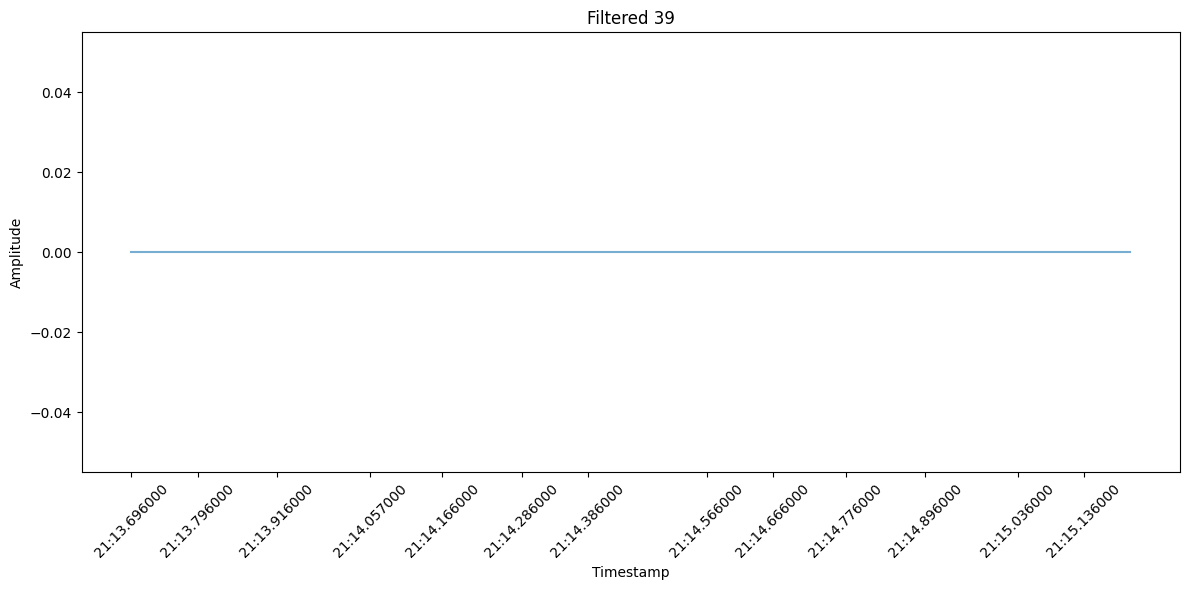

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142117.csv


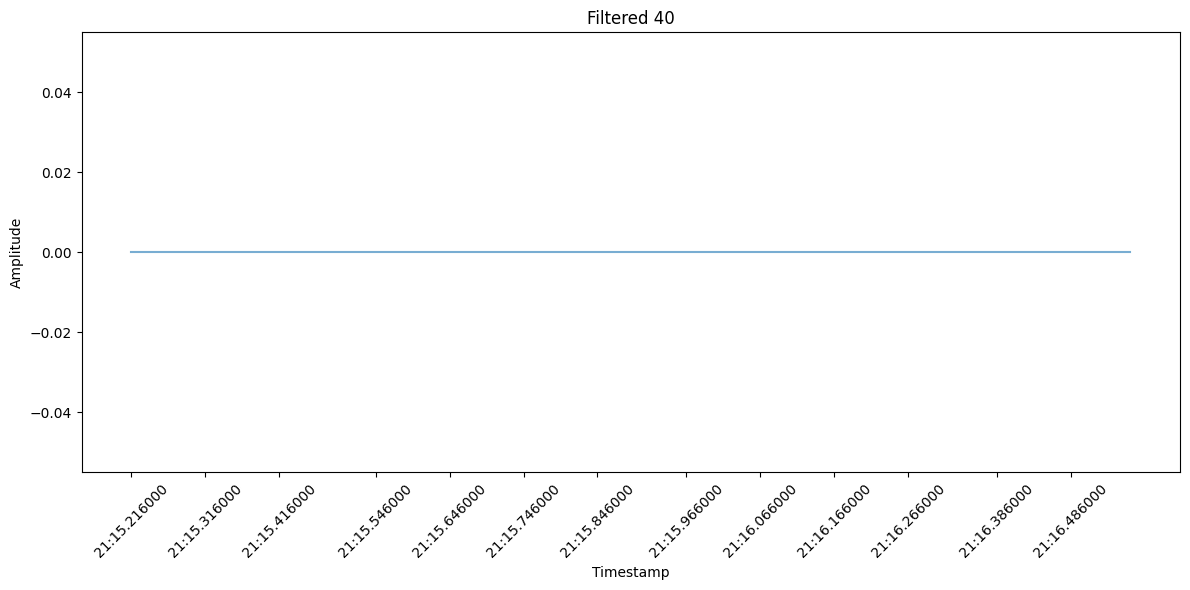

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142118.csv


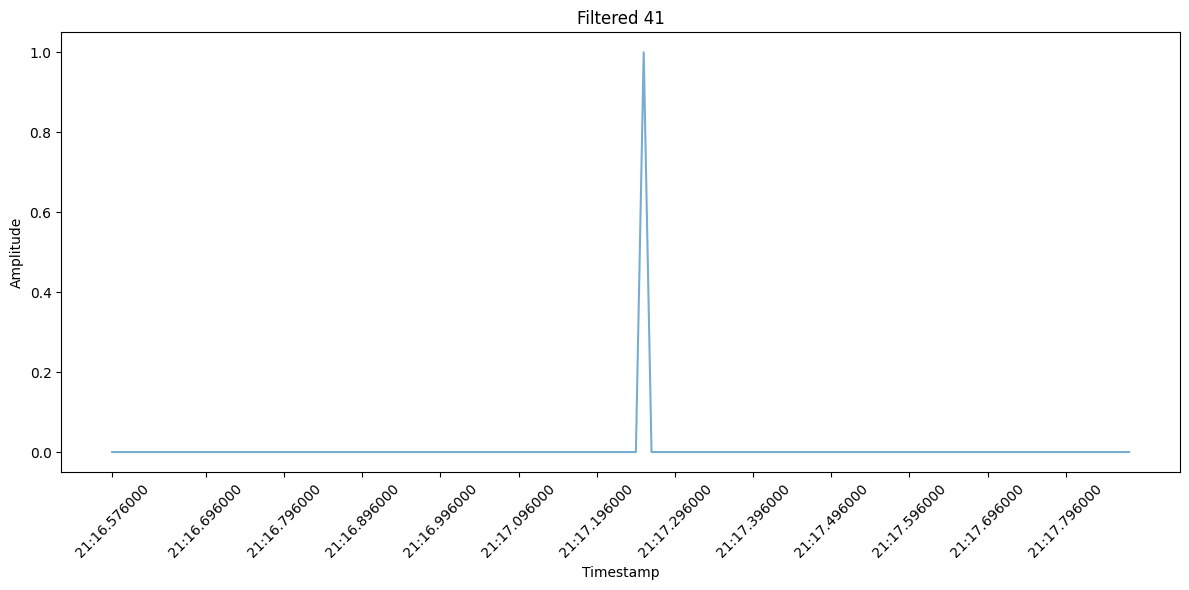

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142119.csv


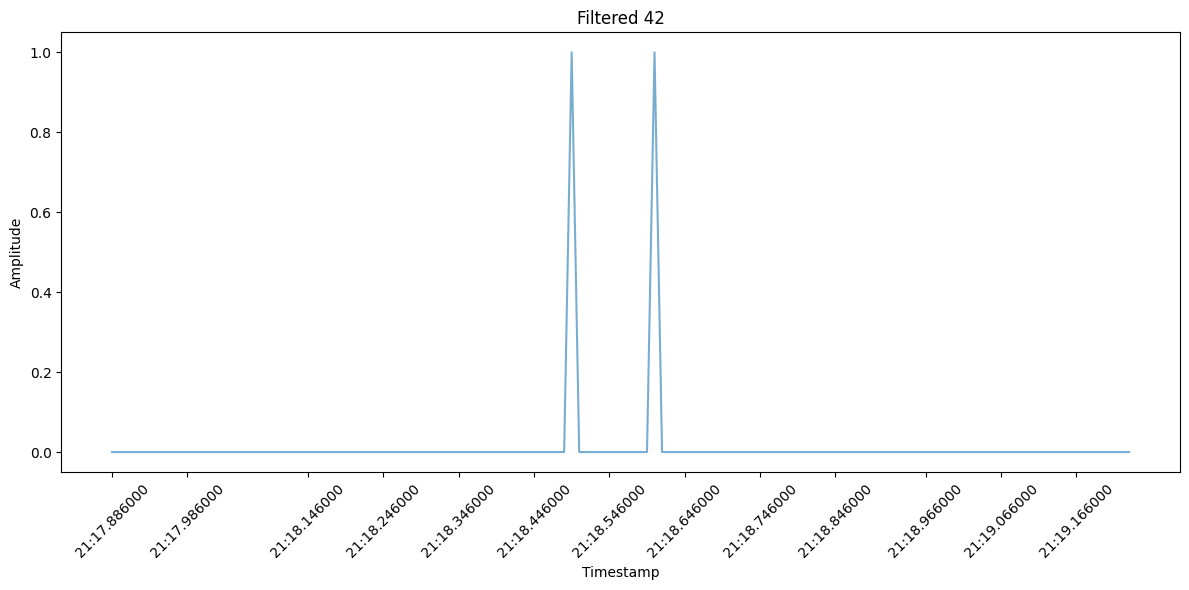

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142121.csv


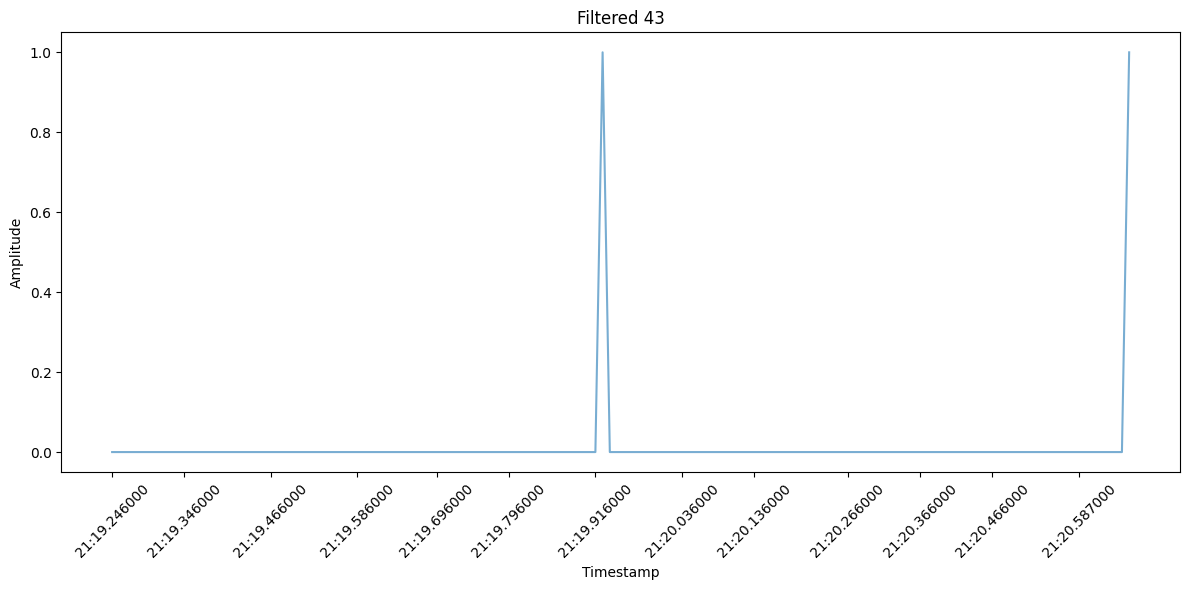

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142122.csv


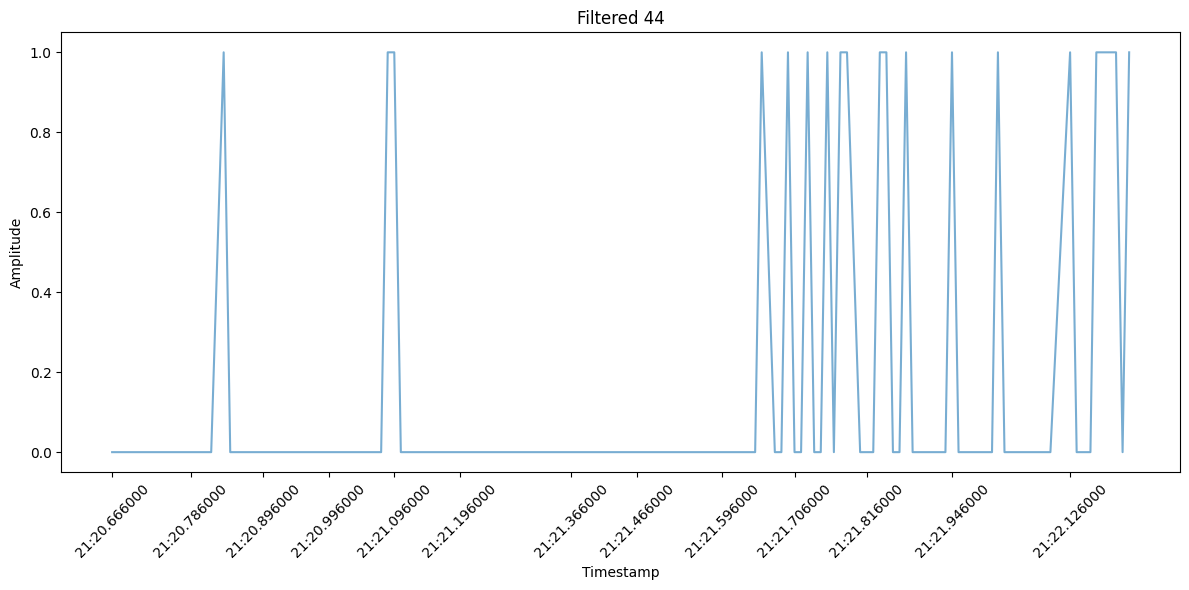

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142124.csv


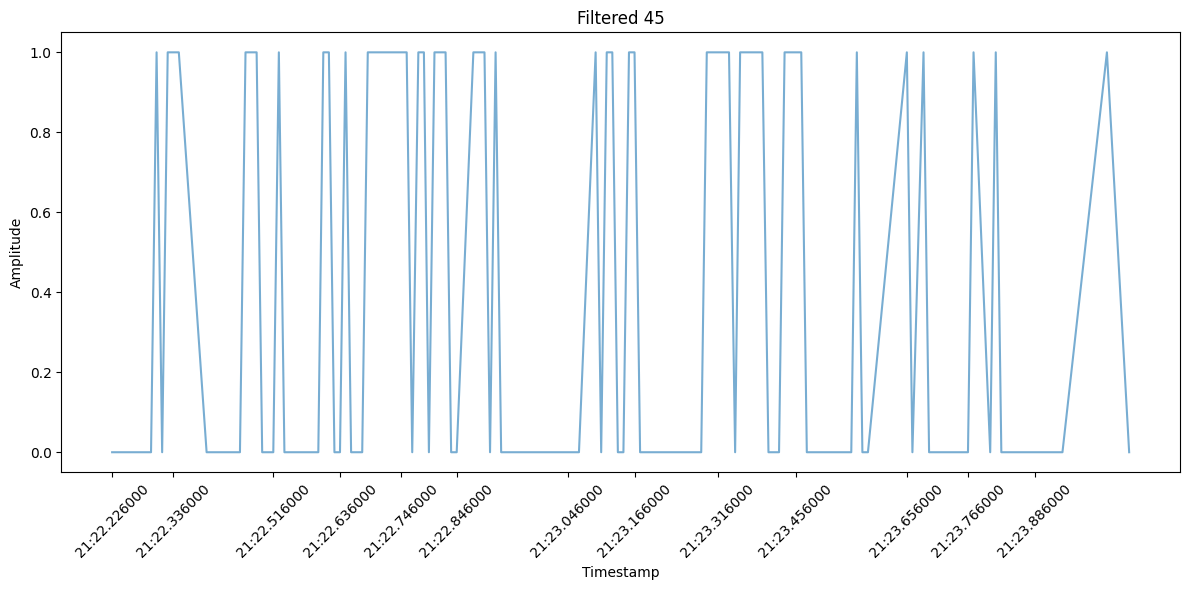

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142126.csv


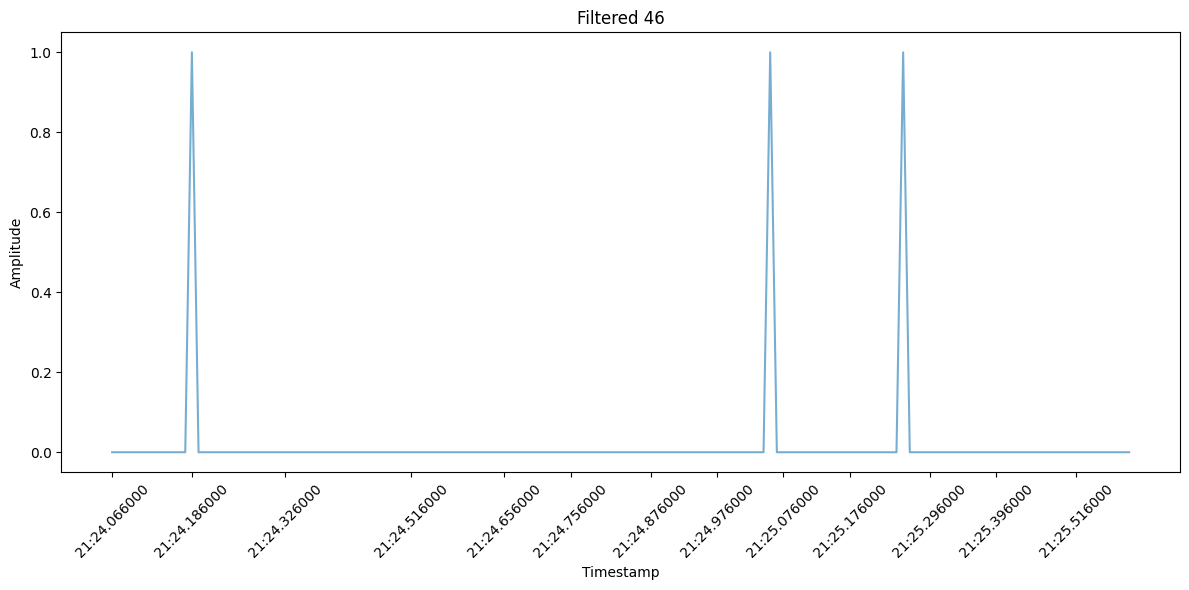

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142127.csv


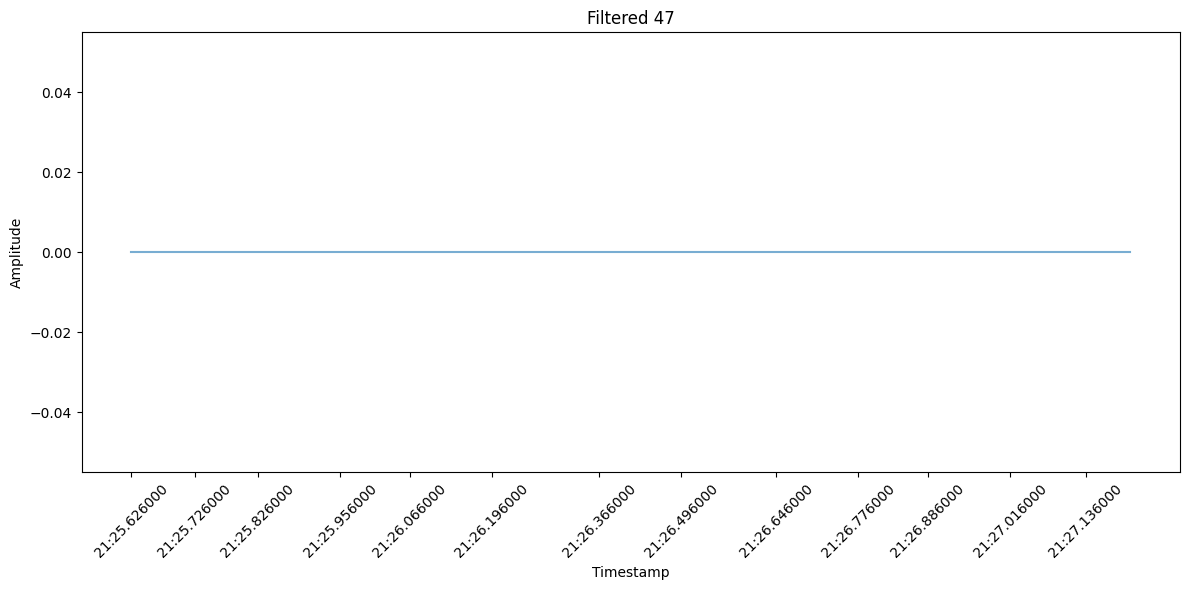

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142129.csv


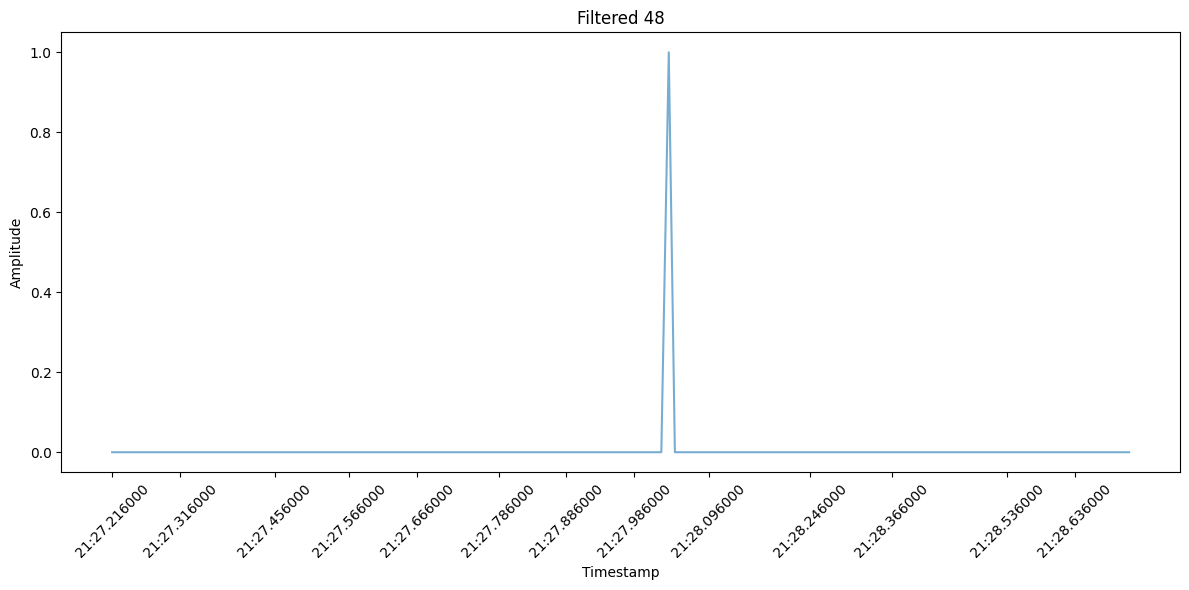

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142130.csv


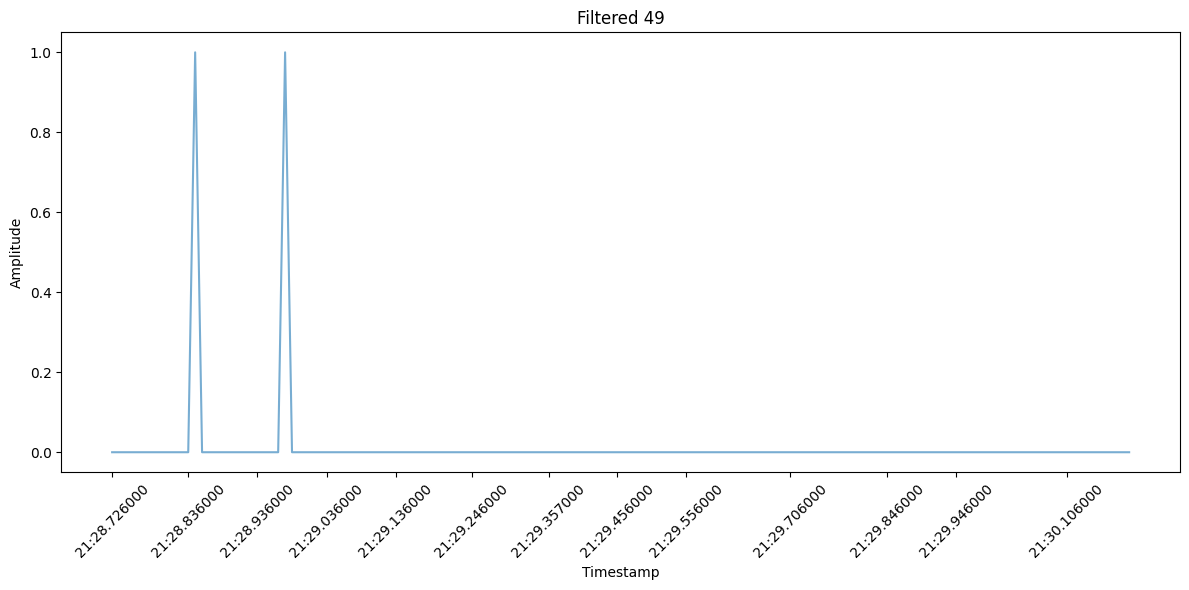

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142132.csv


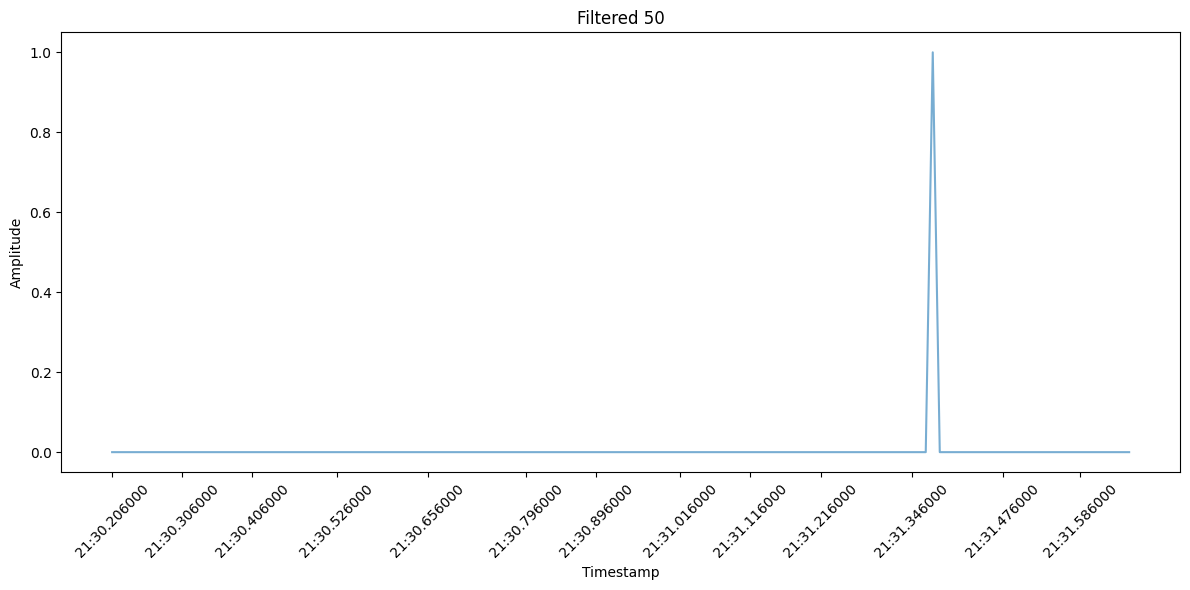

data\raw\raw_activity_csi\L0382_ESP_8_20250521_142133.csv


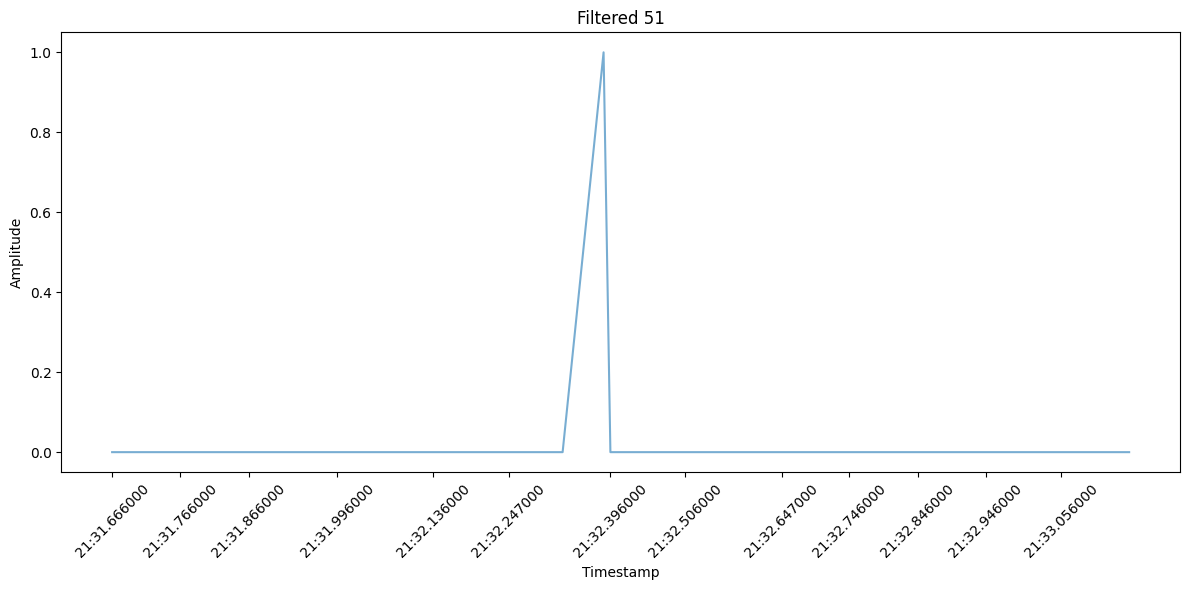

In [25]:
ACTIVITY_CSI_PATHS = glob.glob(r"data\raw\raw_activity_csi\L0382*.csv")
for idx, csv_file in enumerate(ACTIVITY_CSI_PATHS):
    print(csv_file)
    activity_sig, ts = preprocess_complex_pipeline(CSI_PATH=csv_file)
    activity_sig = activity_sig @ W
    test = np.mean(np.abs(activity_sig)[:,:4],axis=1)>5

    plot_csi_amplitude(test[:,None], ts, title=f'Filtered {idx}', FRAME_NUM=500)
    if idx > 50:
        break


data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141704.csv


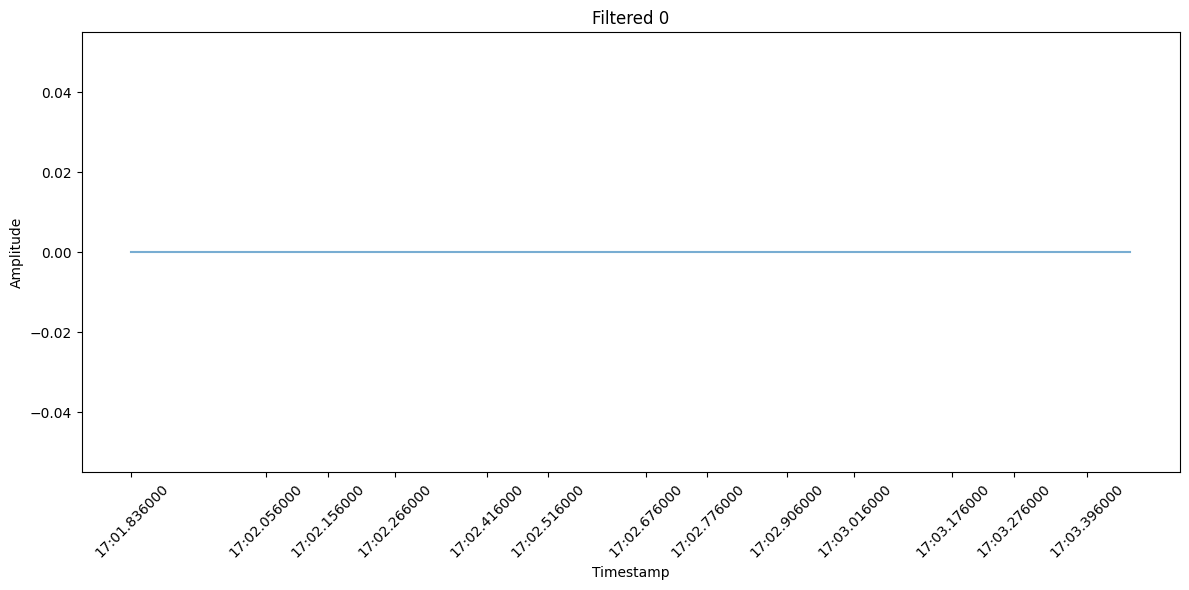

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141705.csv


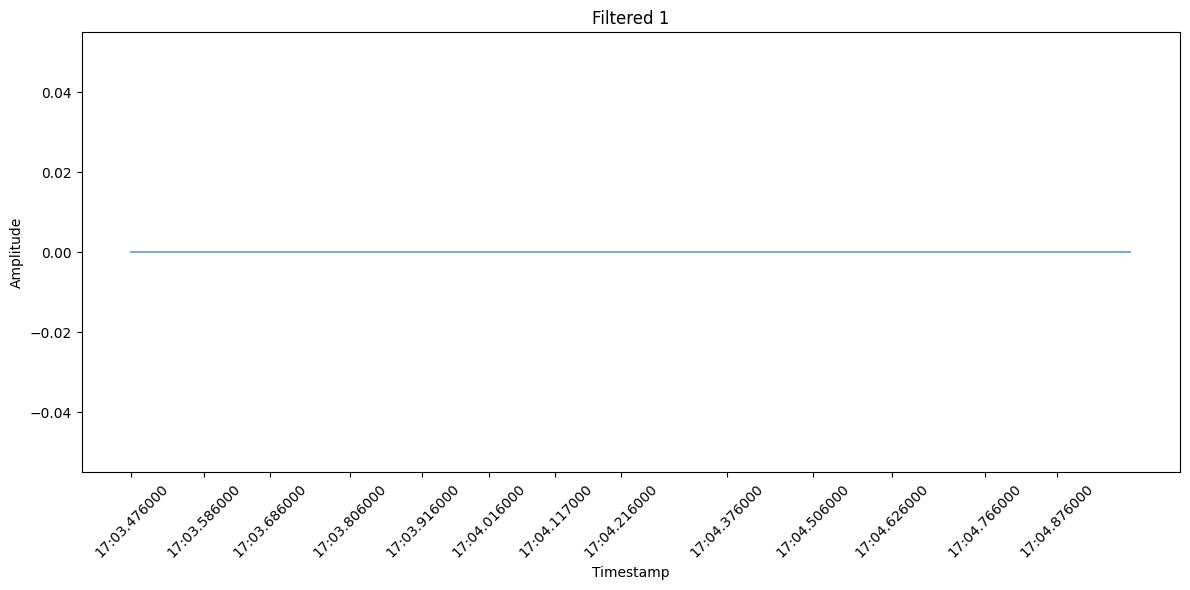

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141706.csv


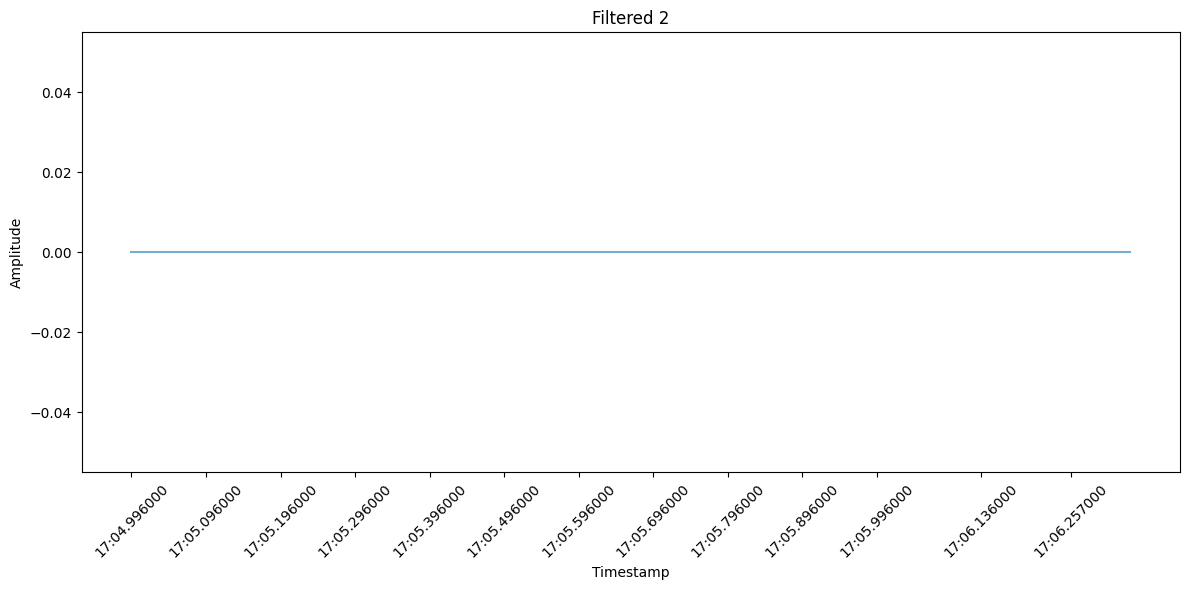

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141708.csv


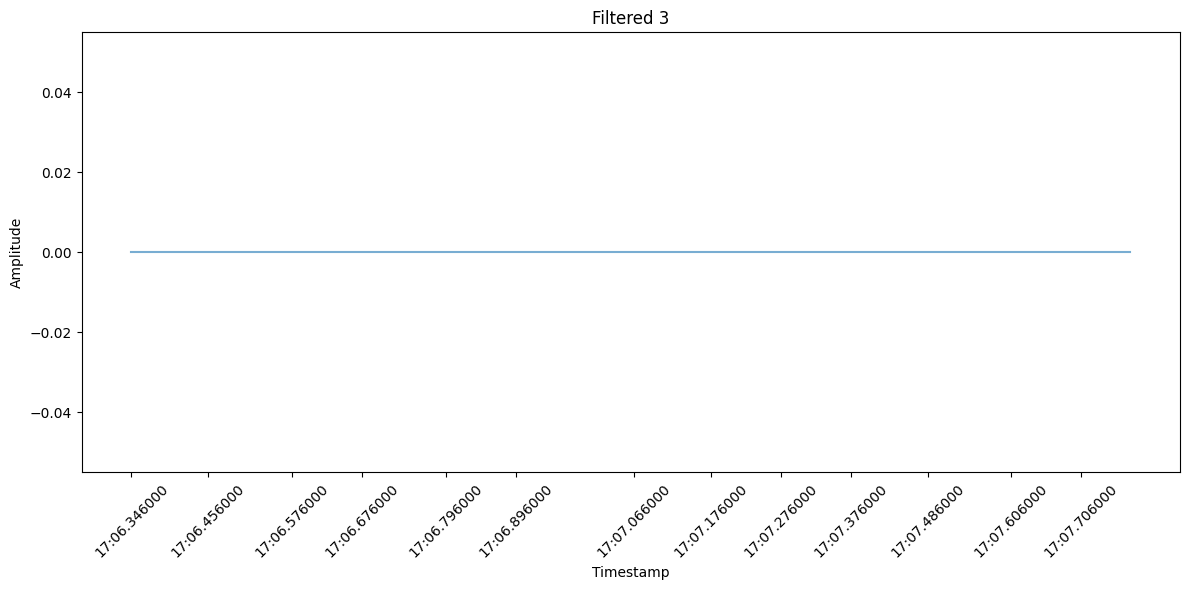

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141709.csv


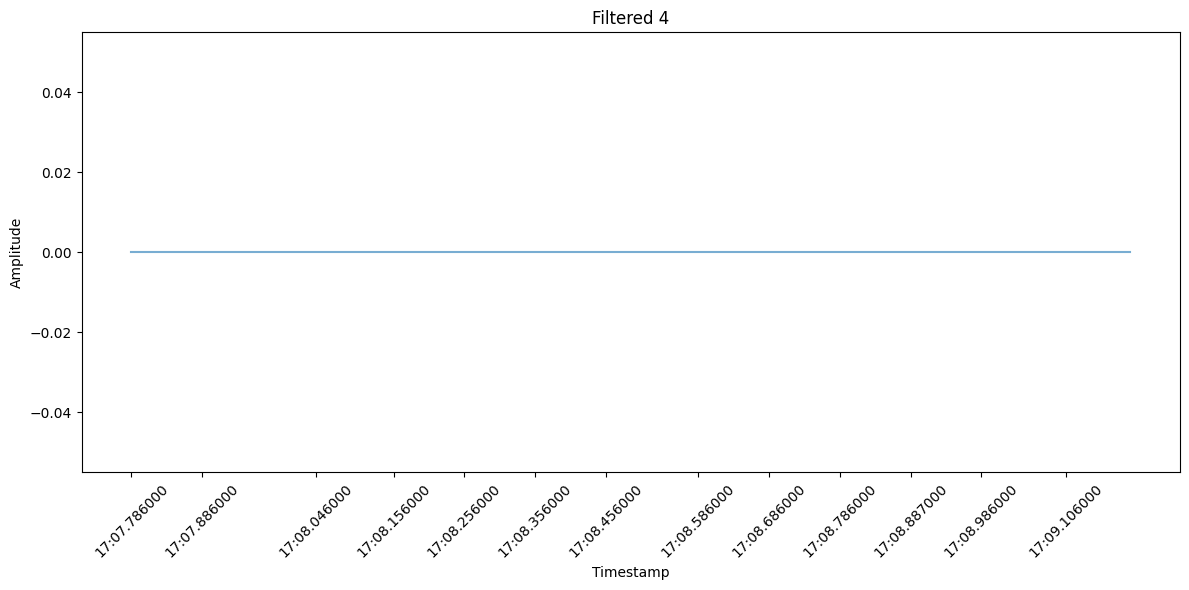

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141711.csv


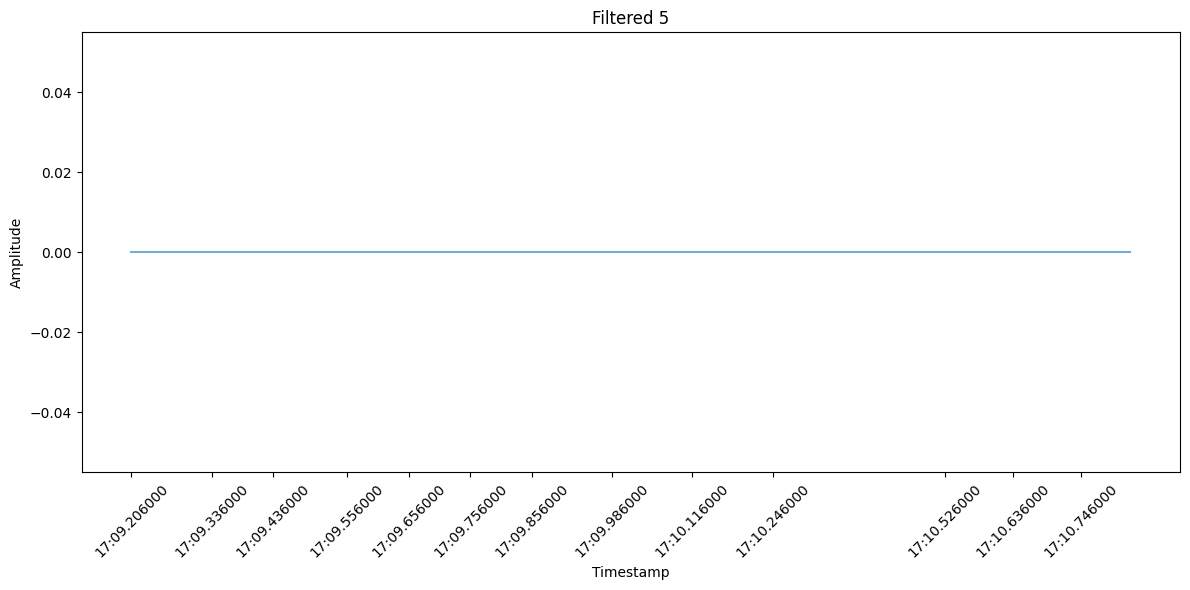

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141712.csv


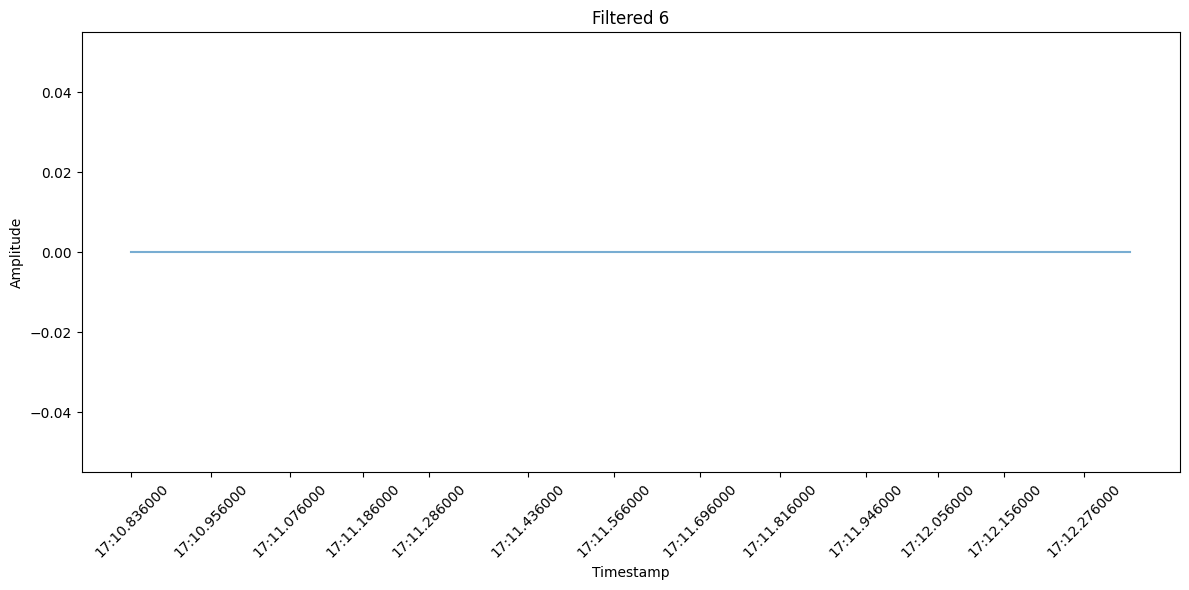

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141714.csv


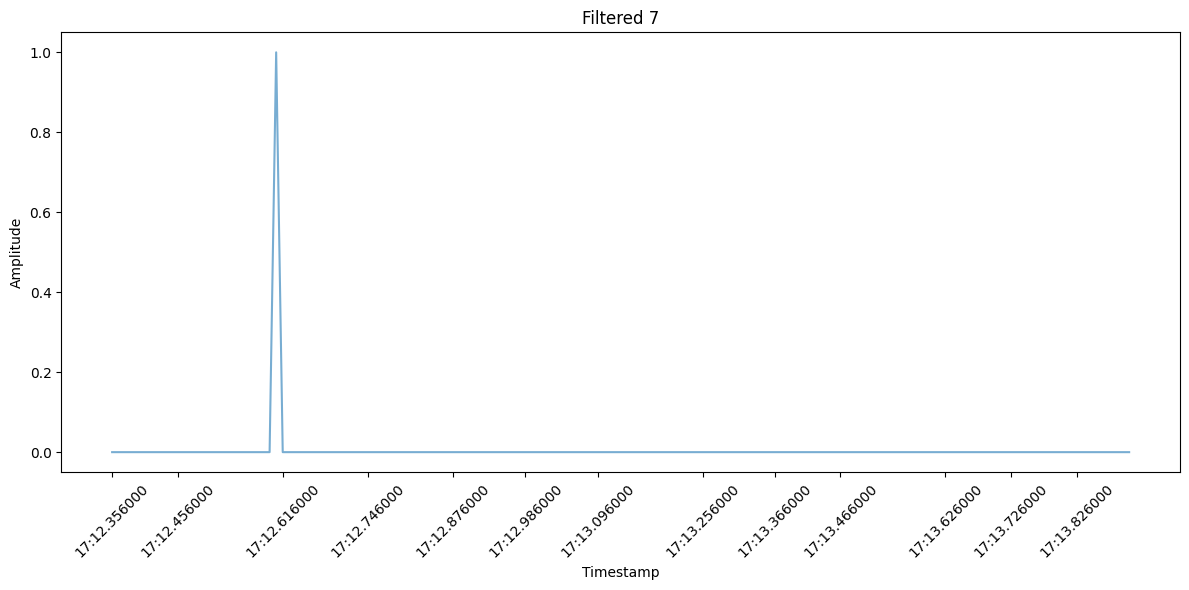

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141715.csv


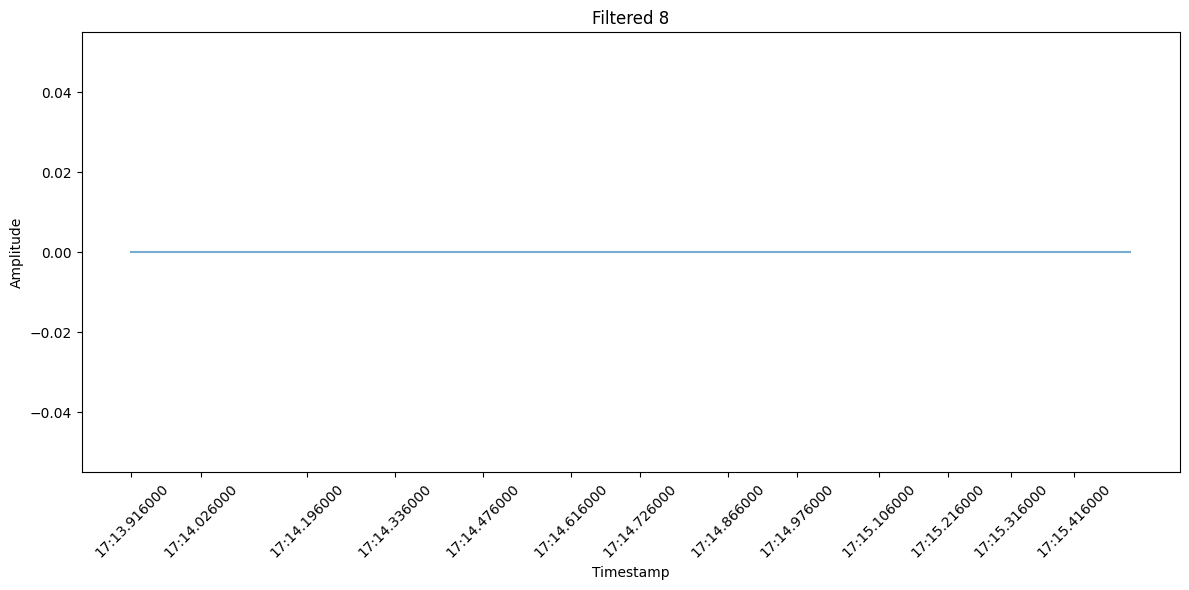

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141717.csv


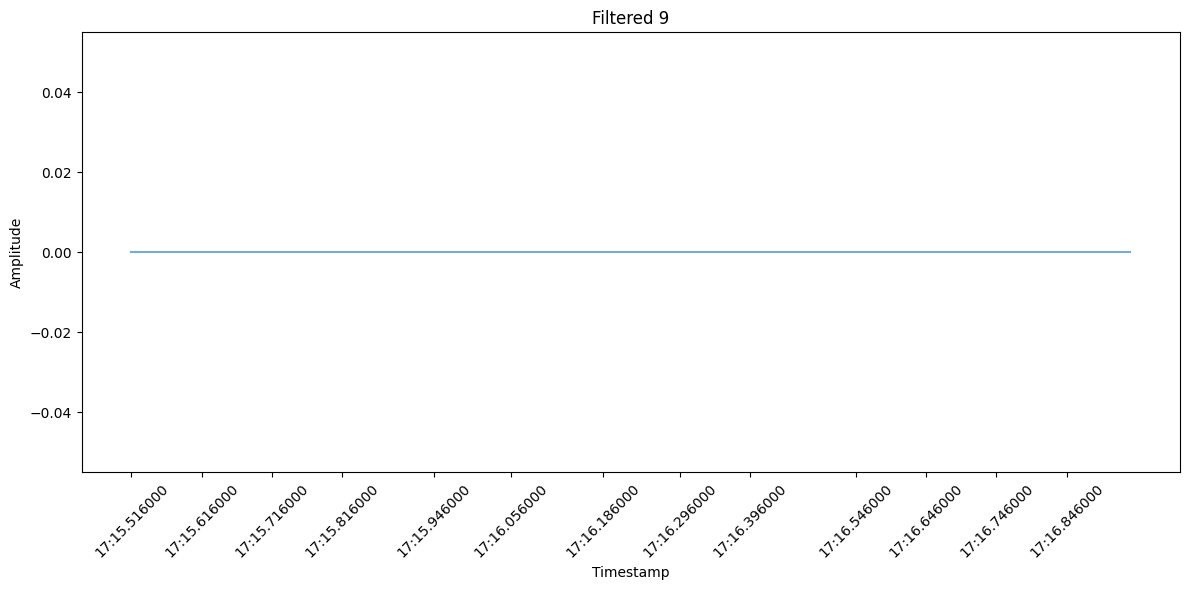

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141718.csv


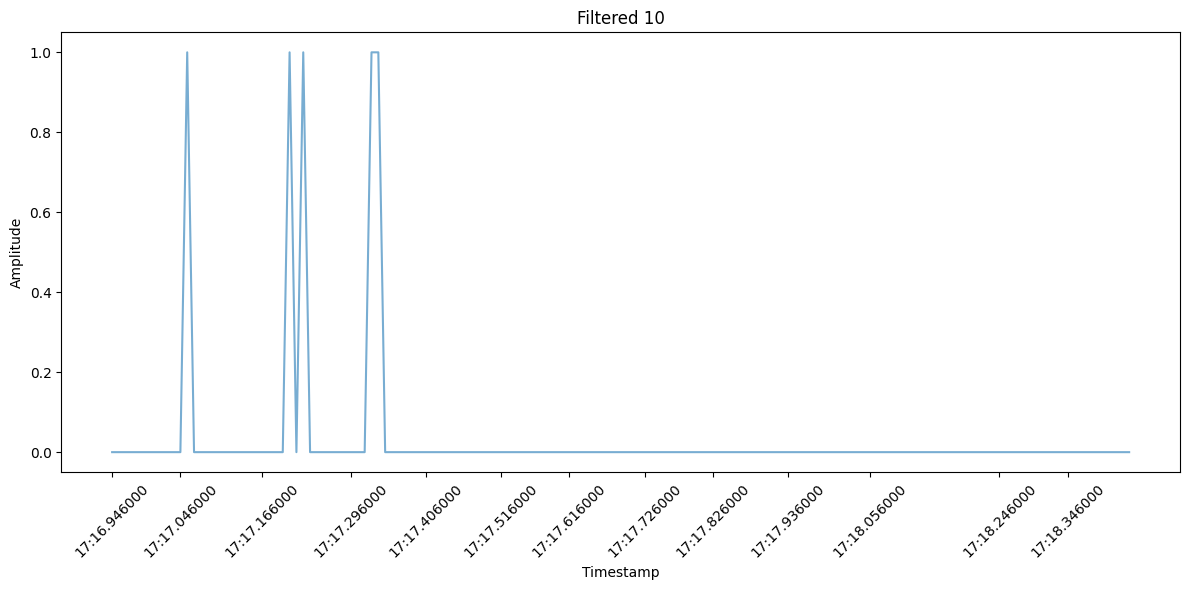

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141720.csv


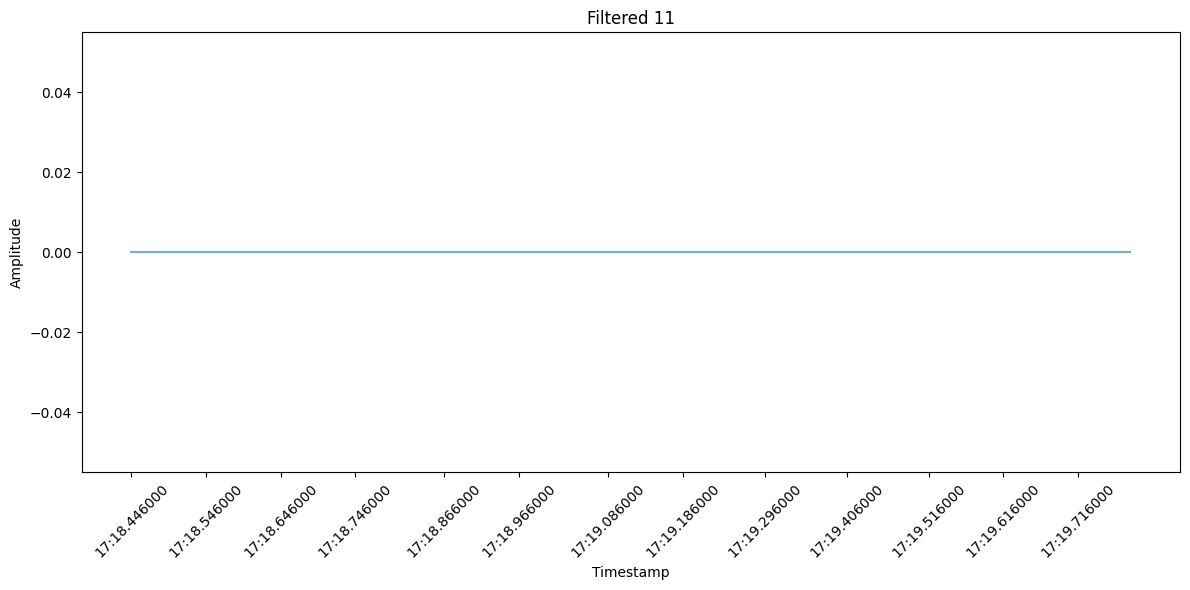

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141722.csv


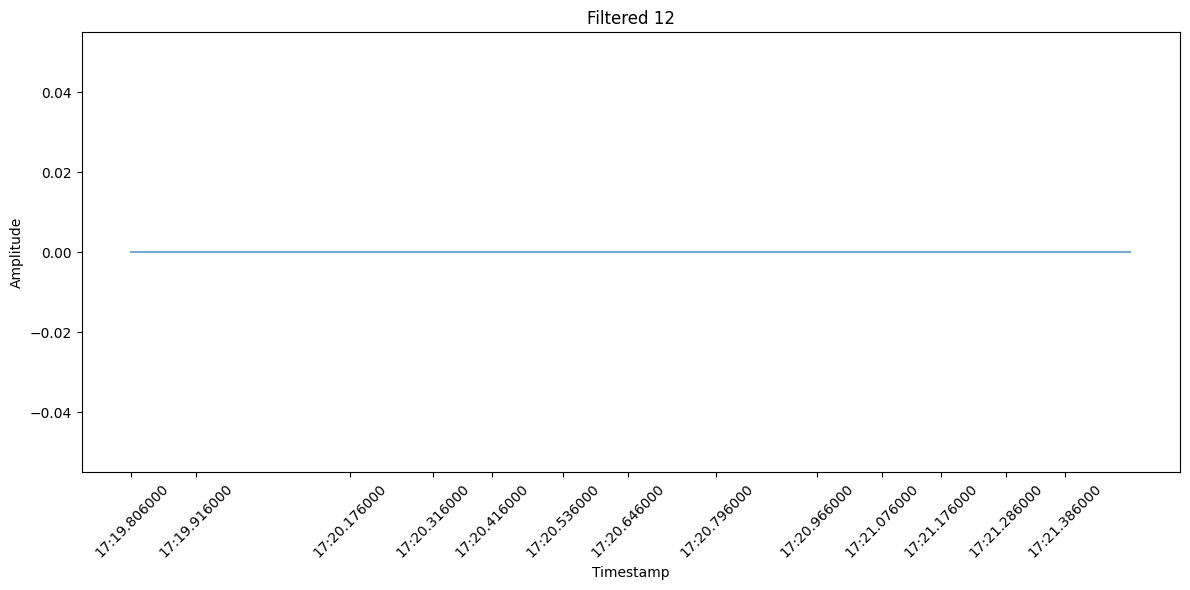

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141723.csv


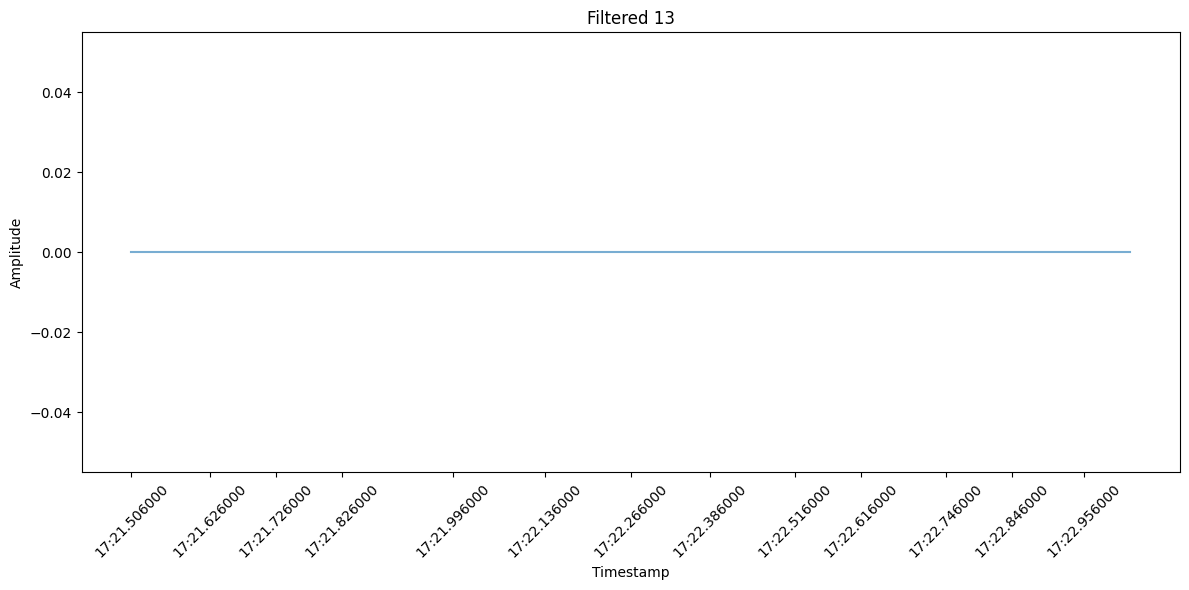

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141725.csv


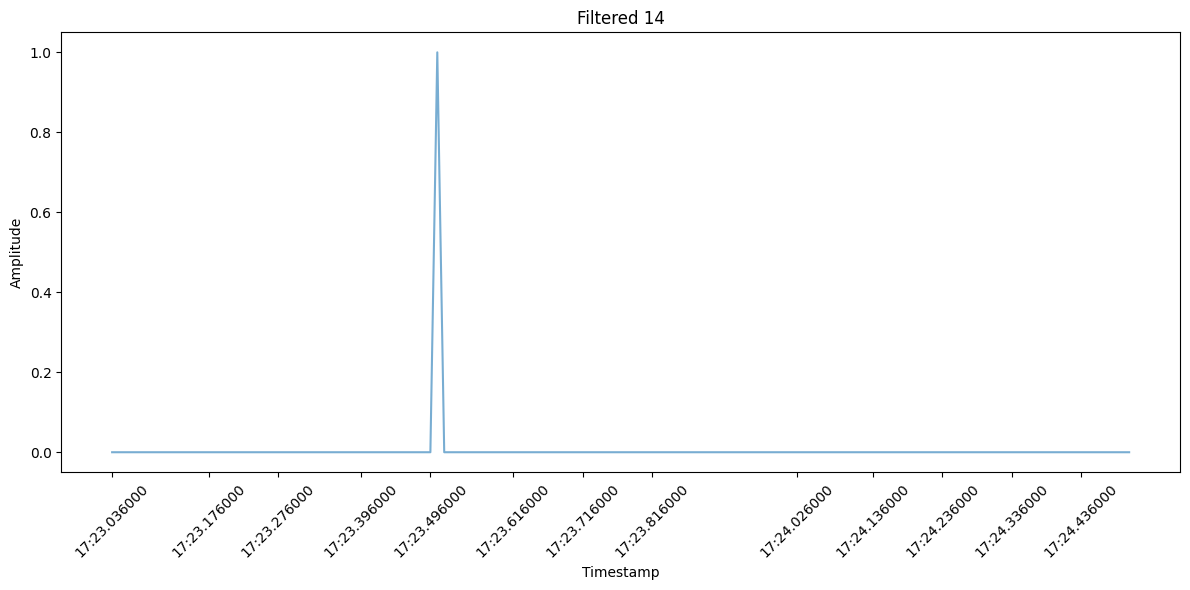

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141726.csv


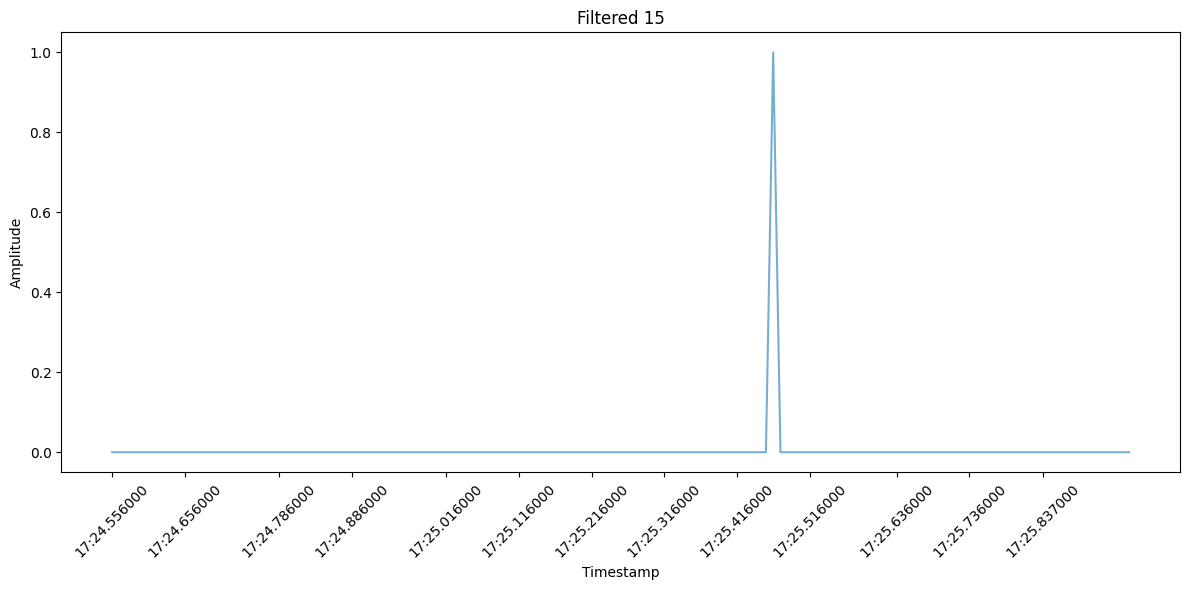

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141728.csv


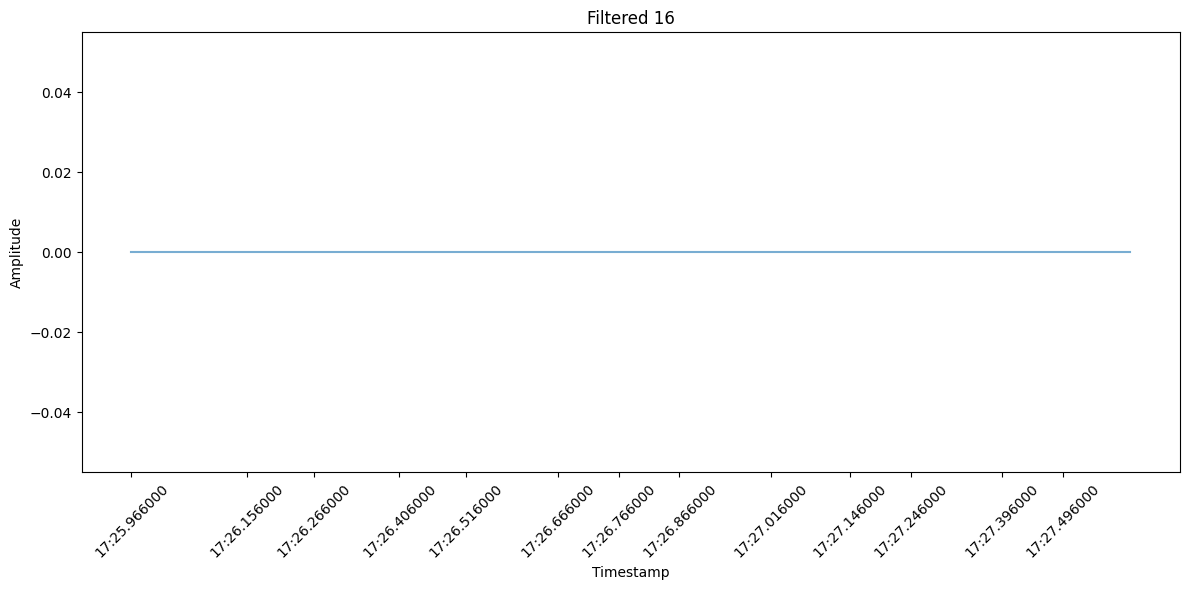

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141729.csv


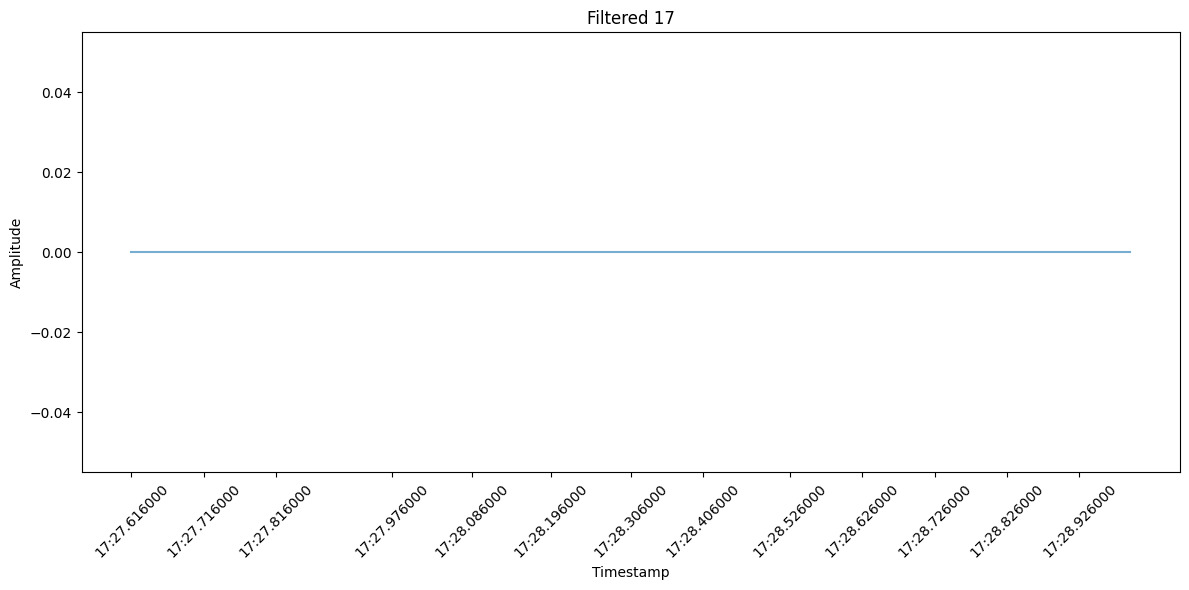

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141730.csv


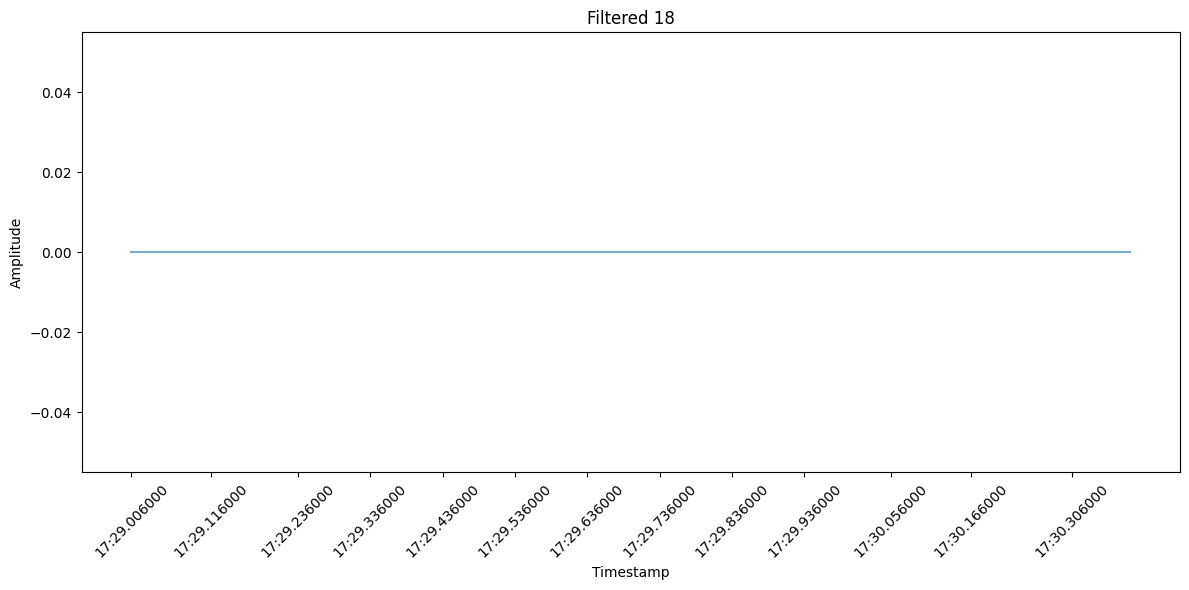

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141732.csv


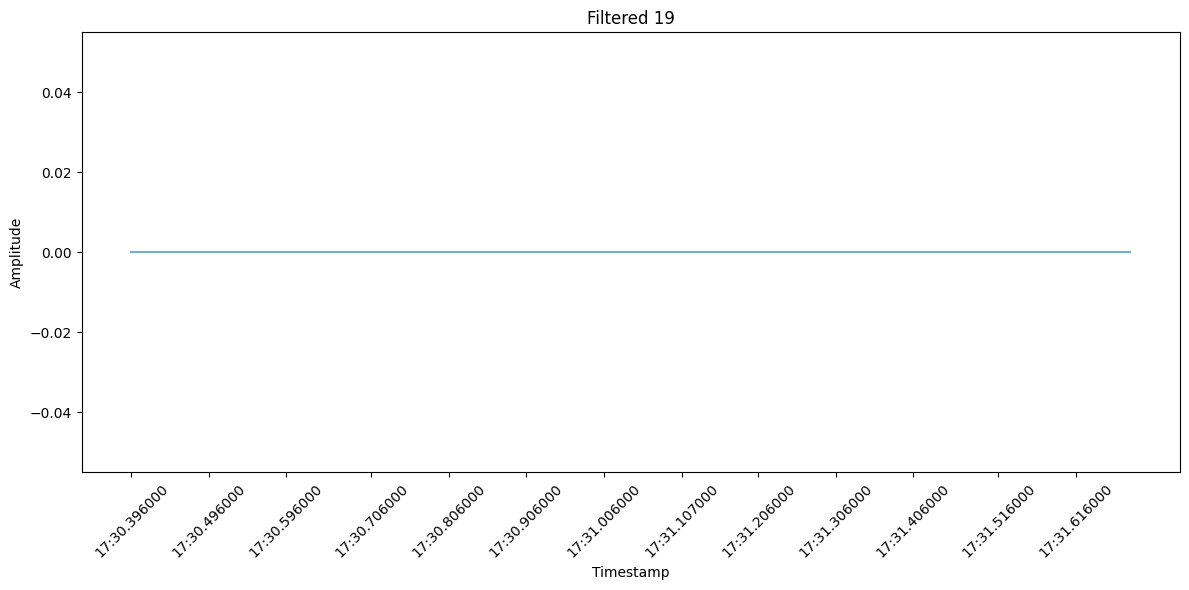

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141733.csv


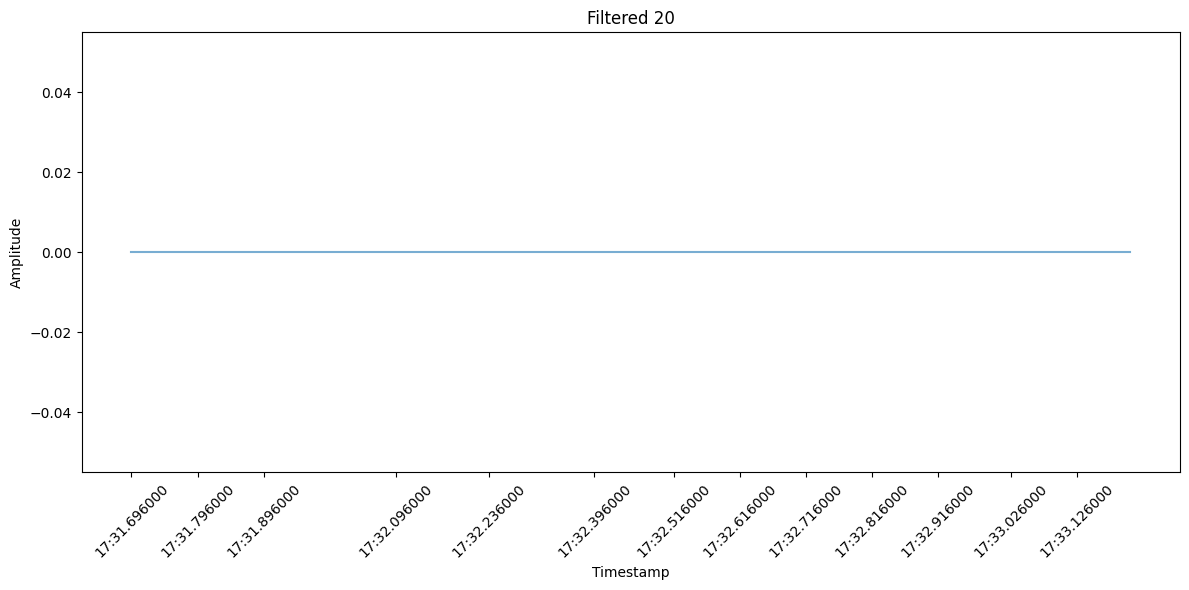

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141735.csv


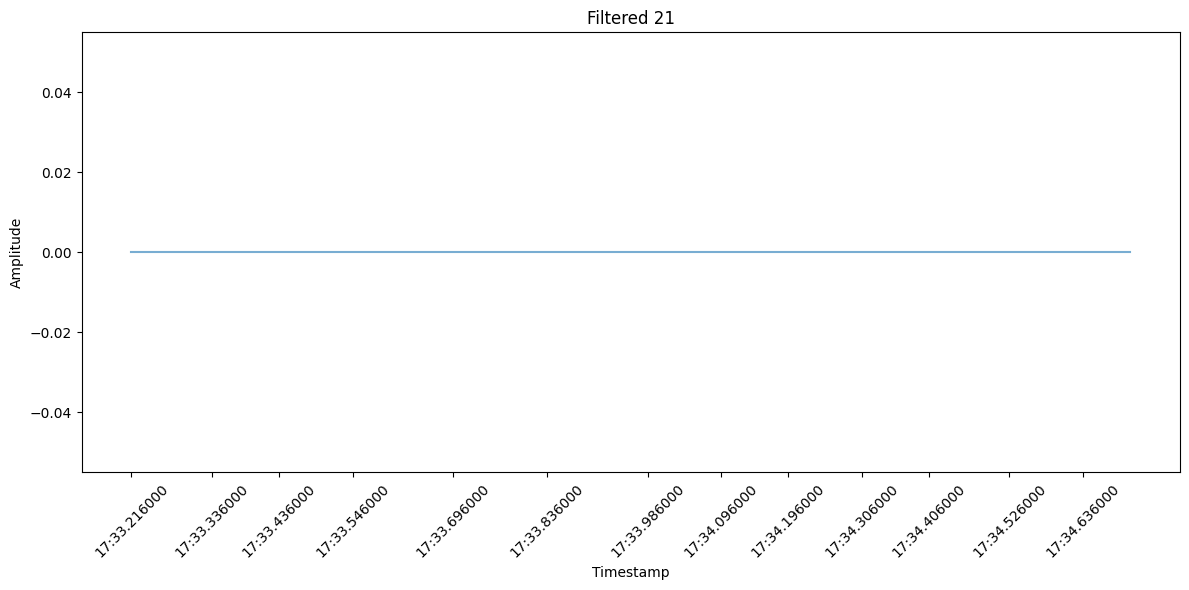

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141736.csv


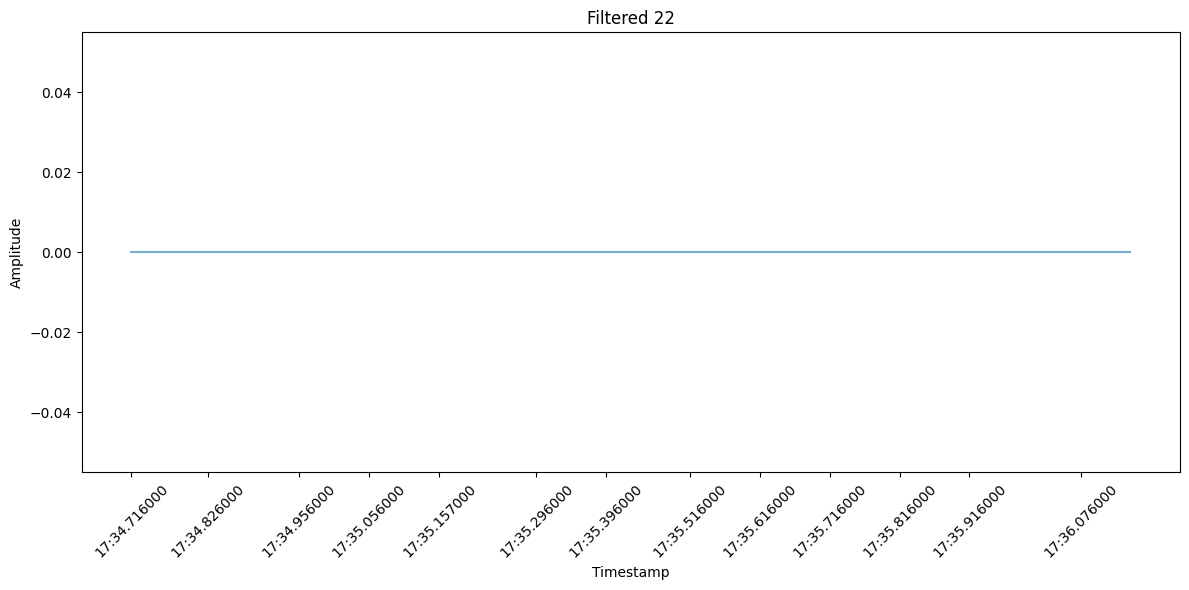

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141738.csv


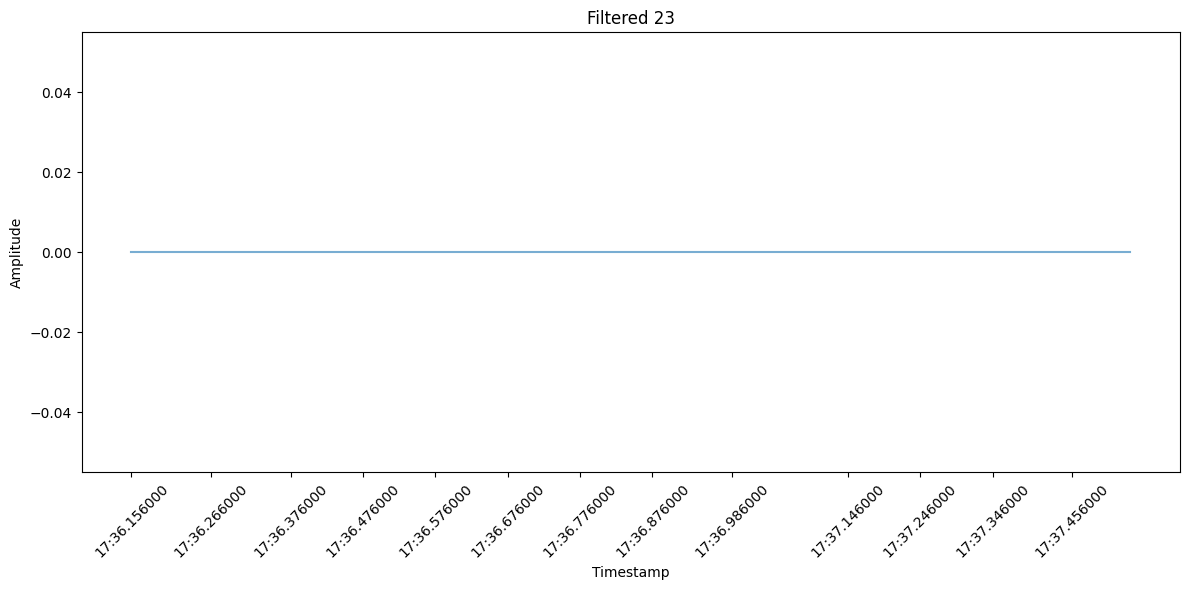

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141739.csv


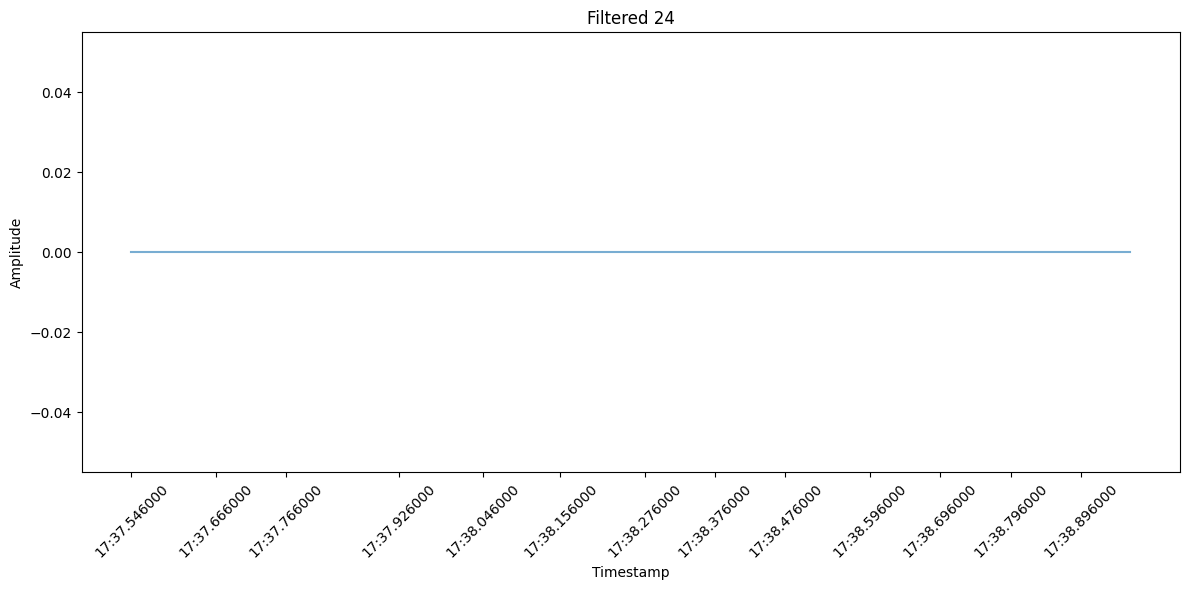

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141741.csv


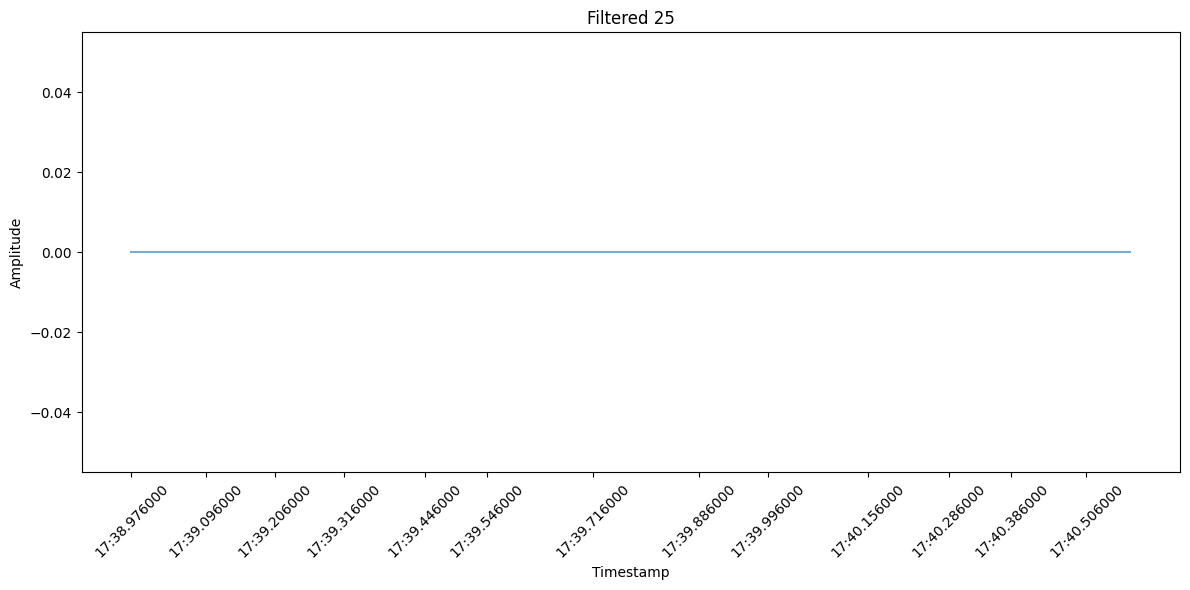

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141742.csv


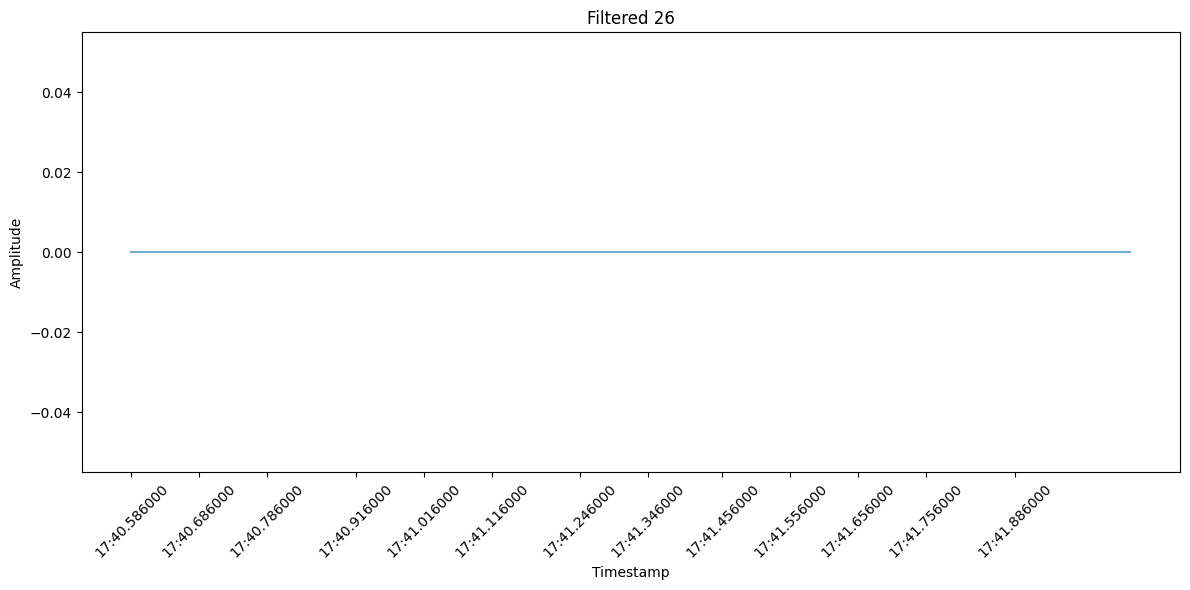

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141743.csv


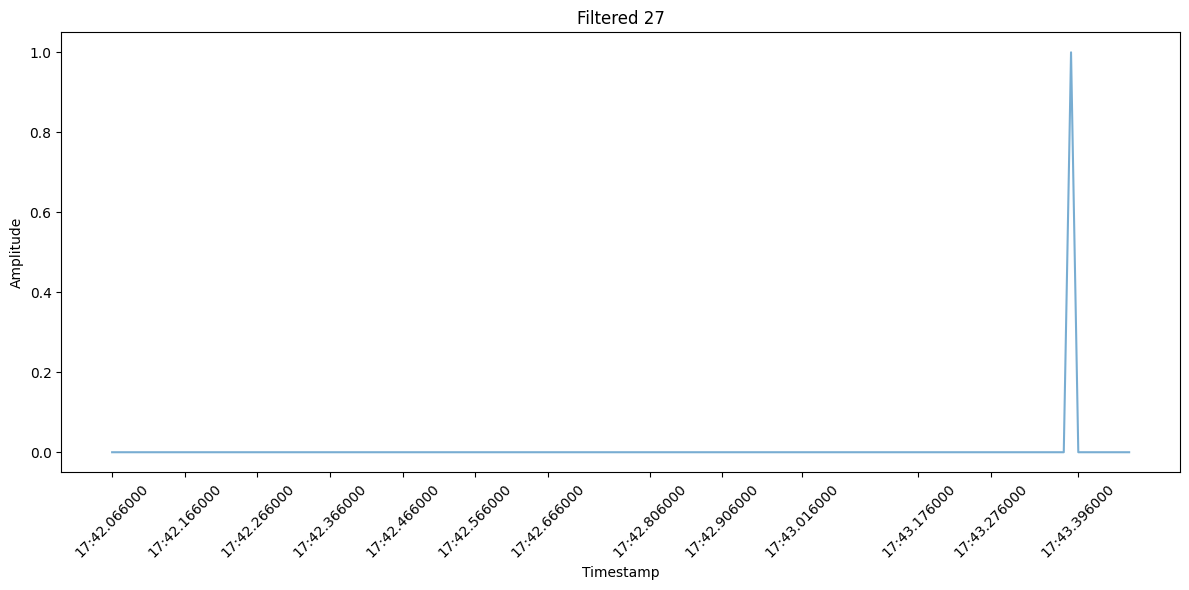

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141745.csv


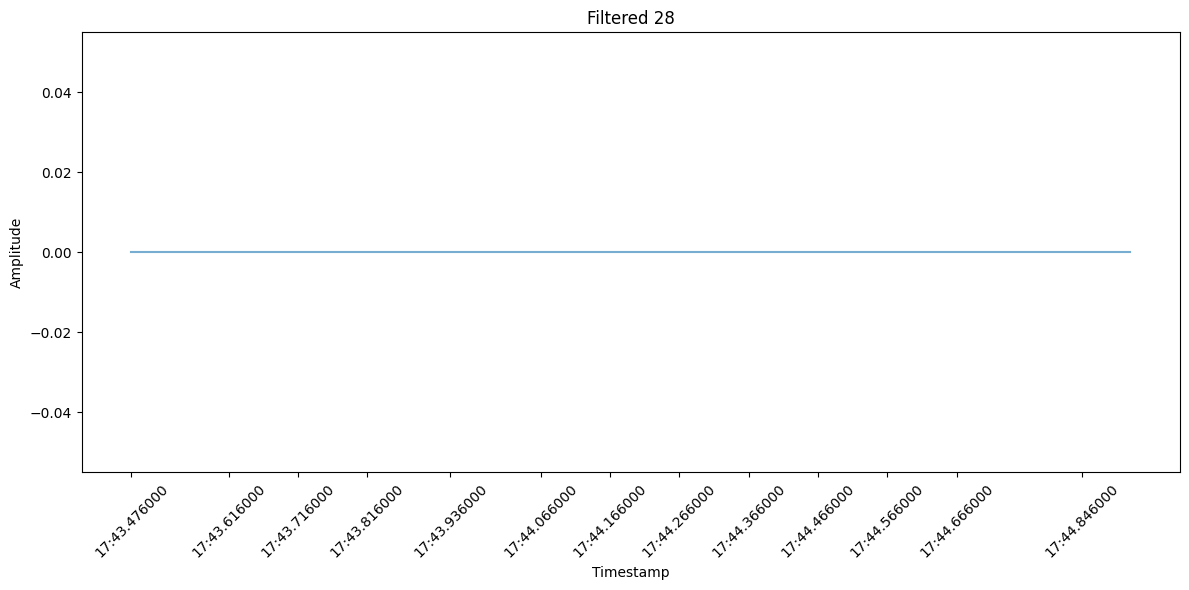

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141746.csv


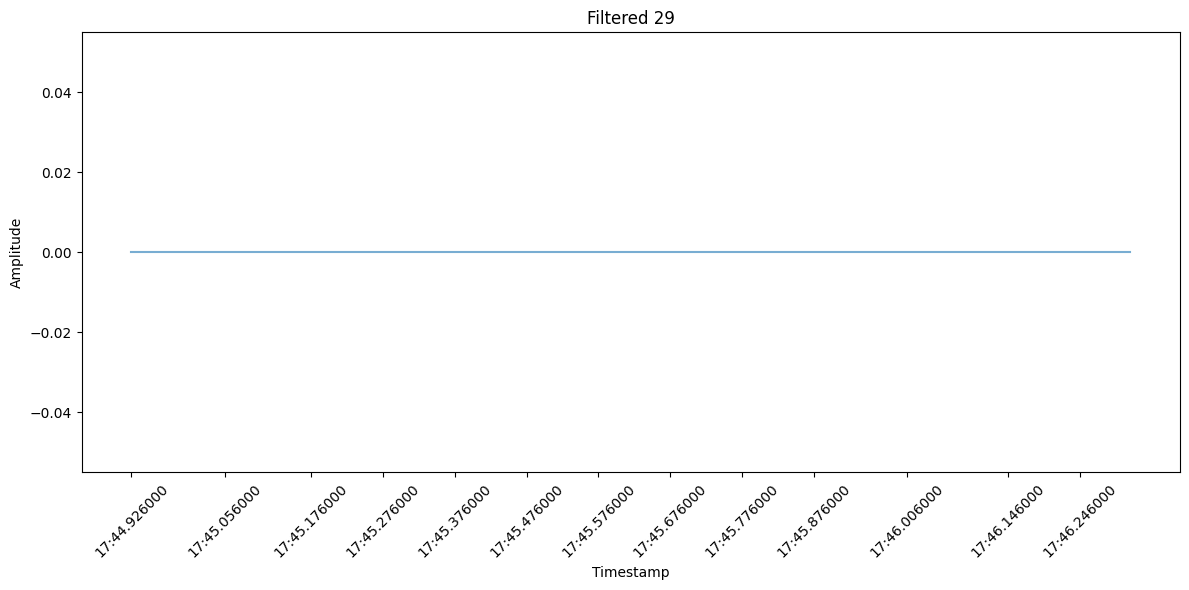

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141748.csv


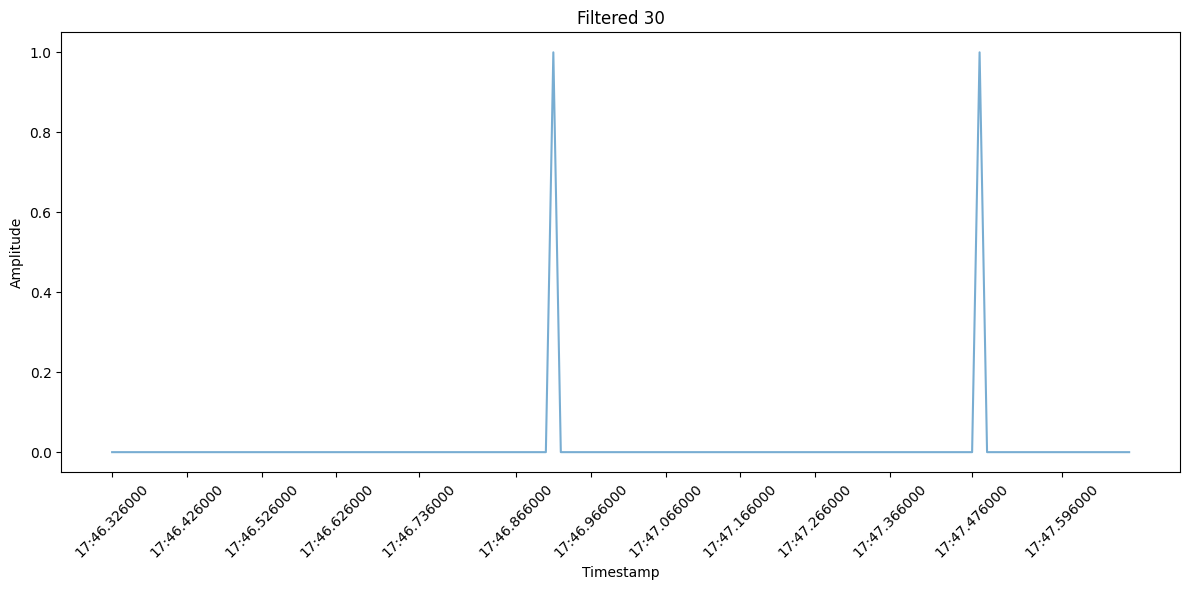

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141749.csv


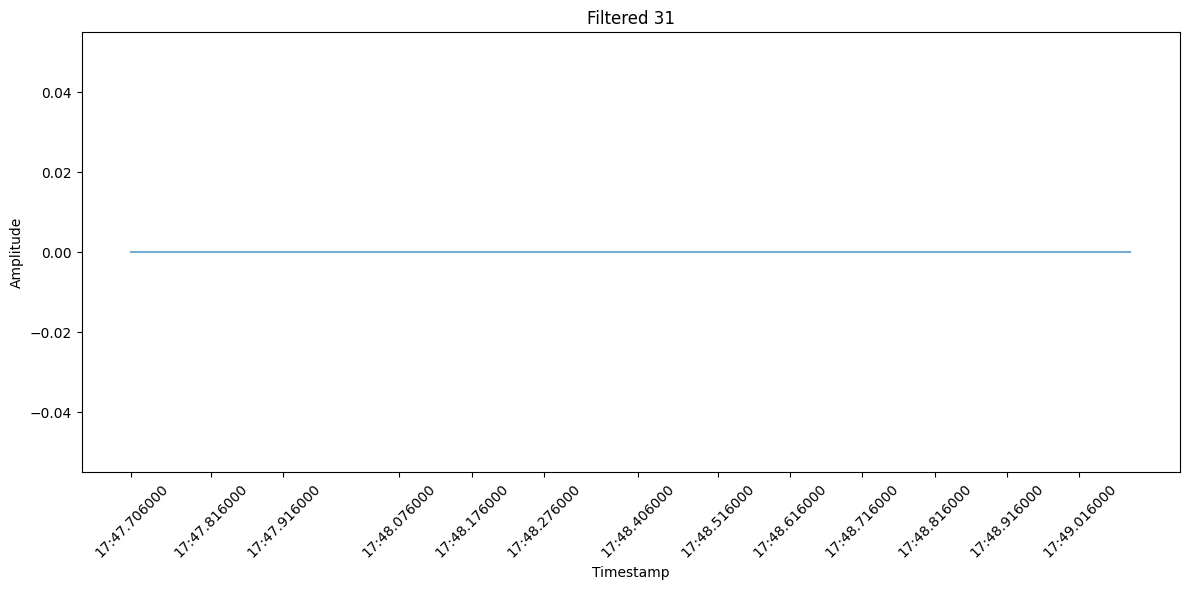

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141751.csv


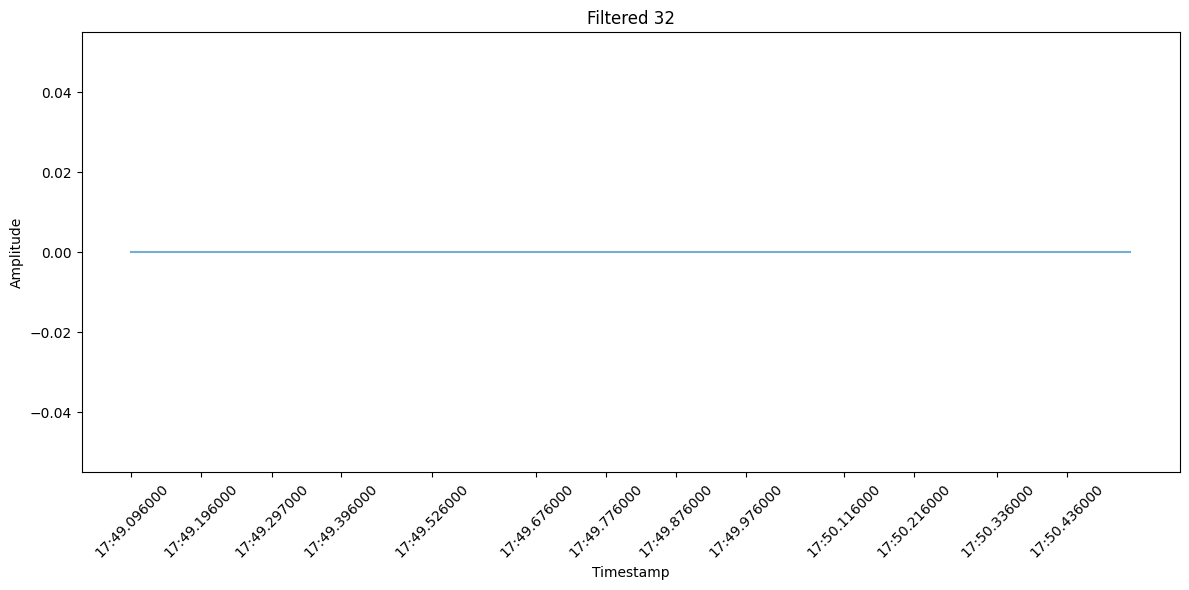

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141752.csv


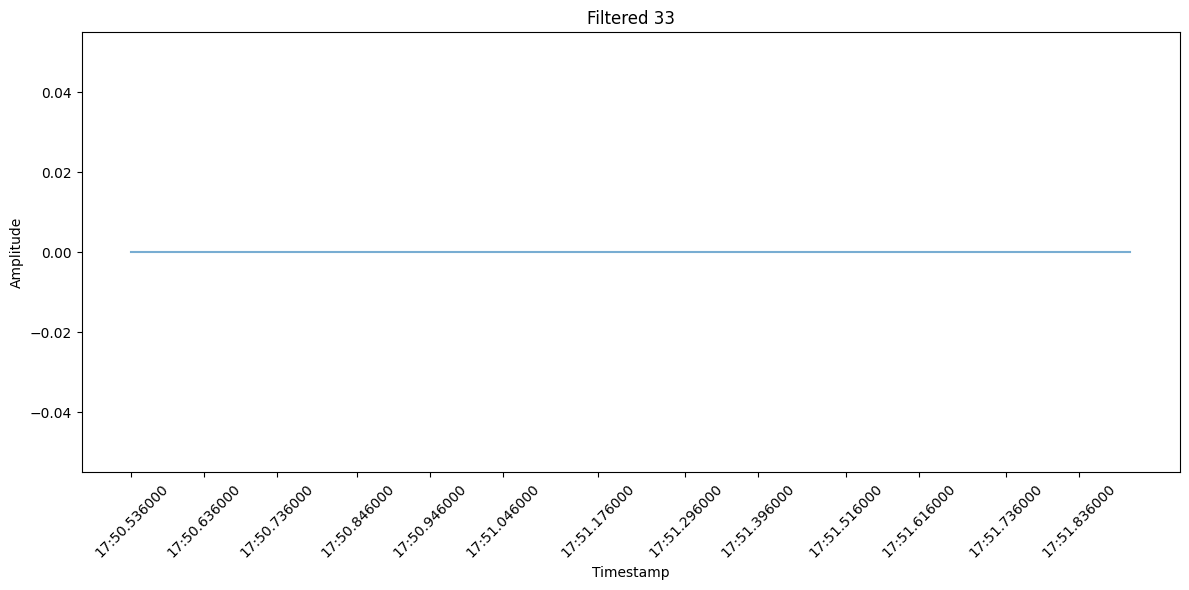

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141754.csv


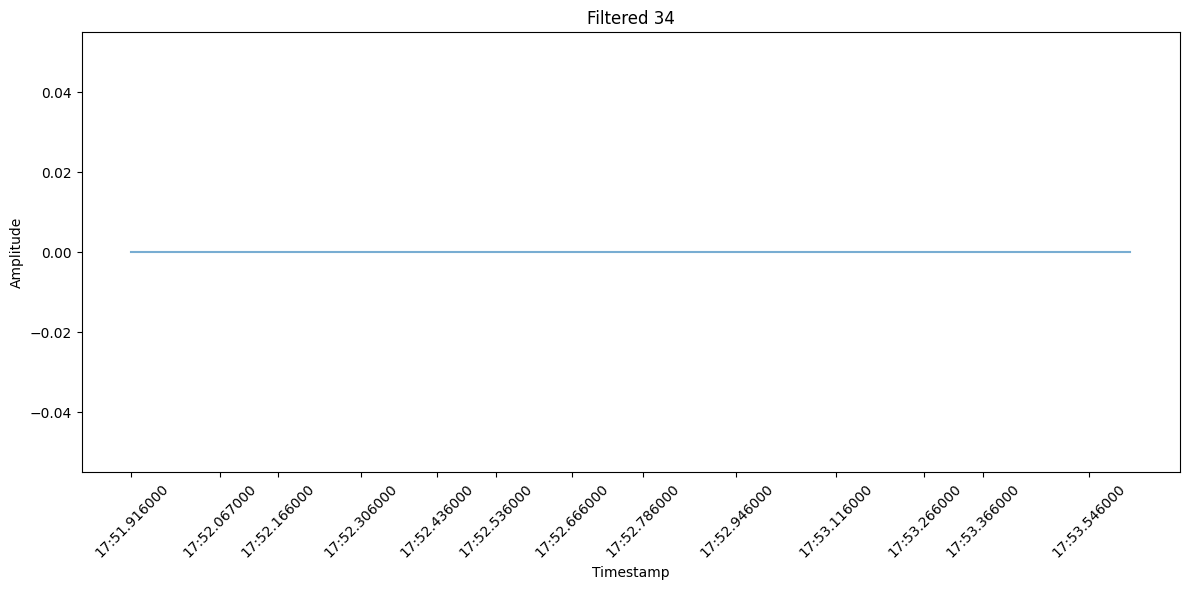

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141755.csv


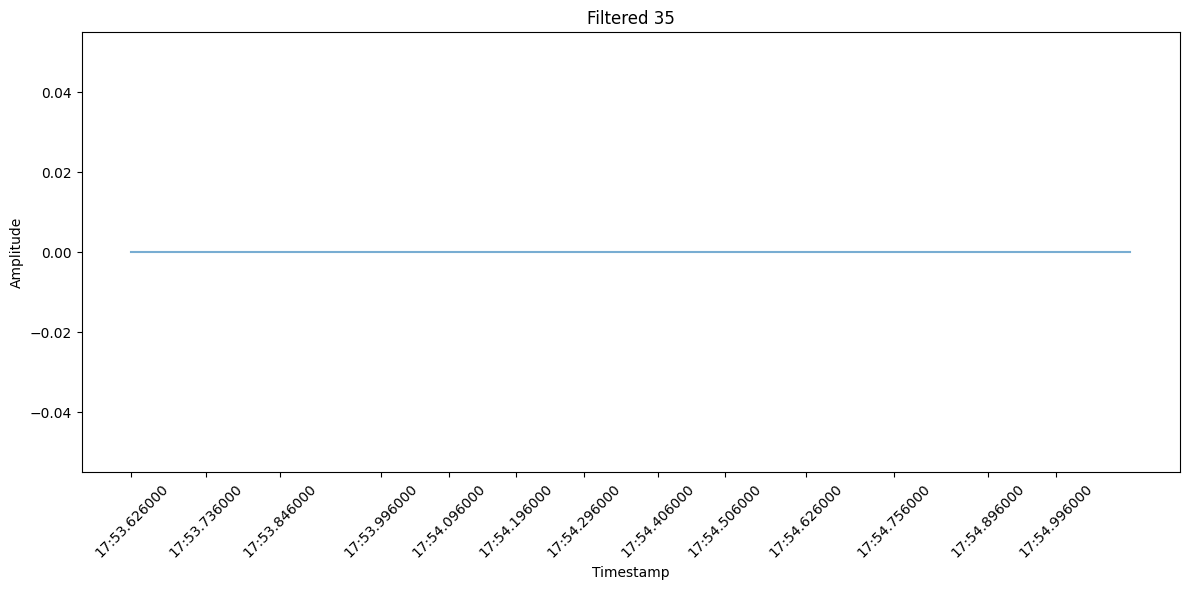

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141757.csv


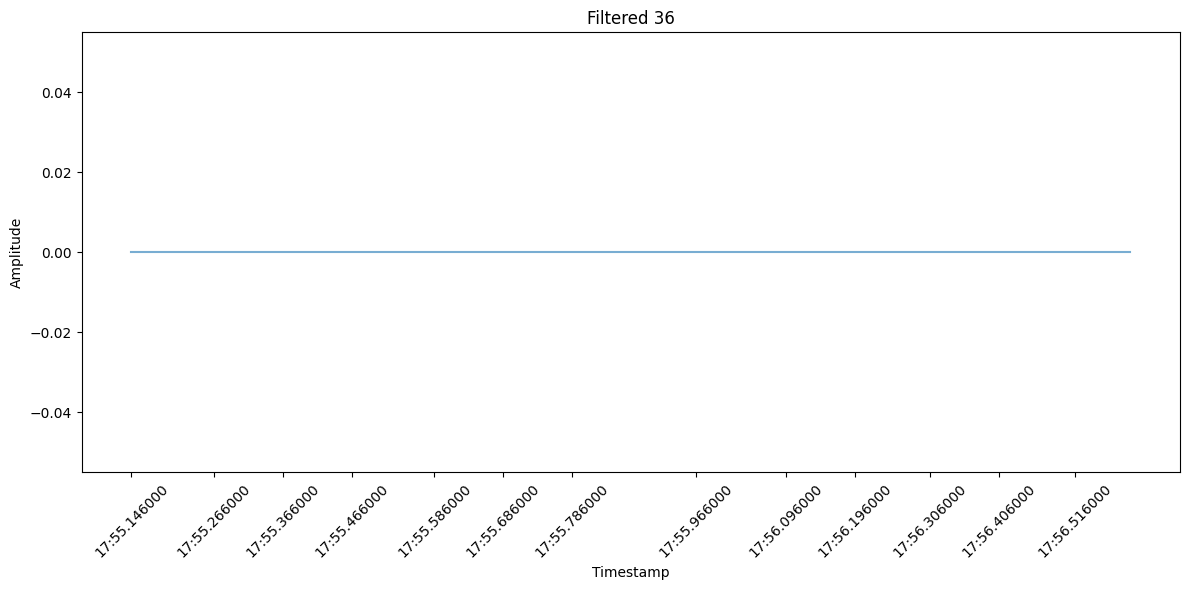

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141758.csv


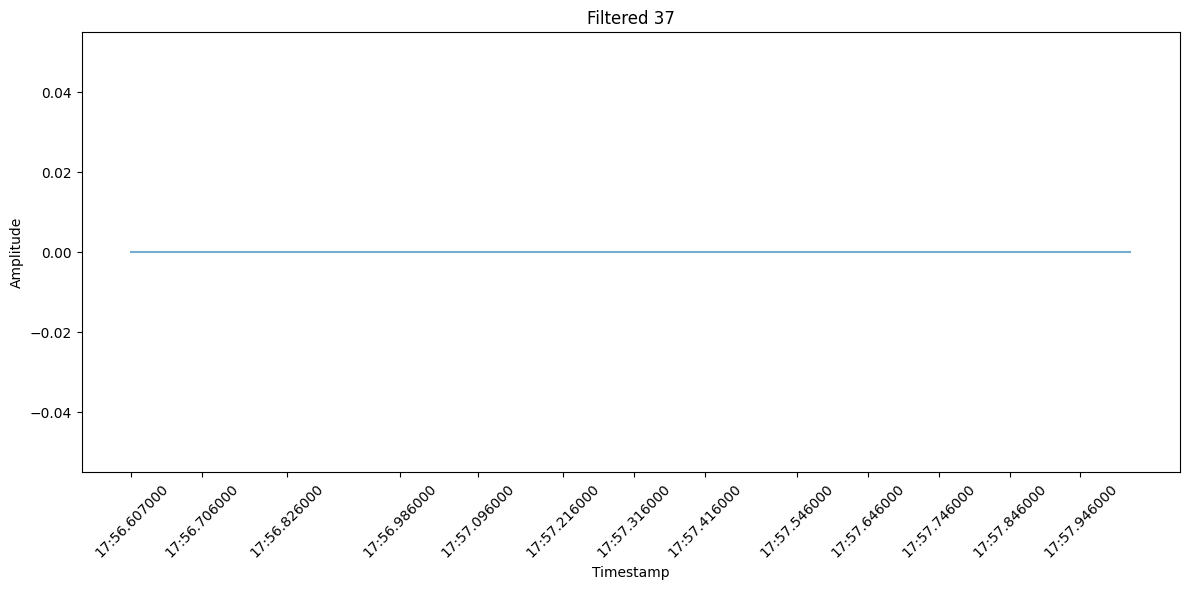

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141800.csv


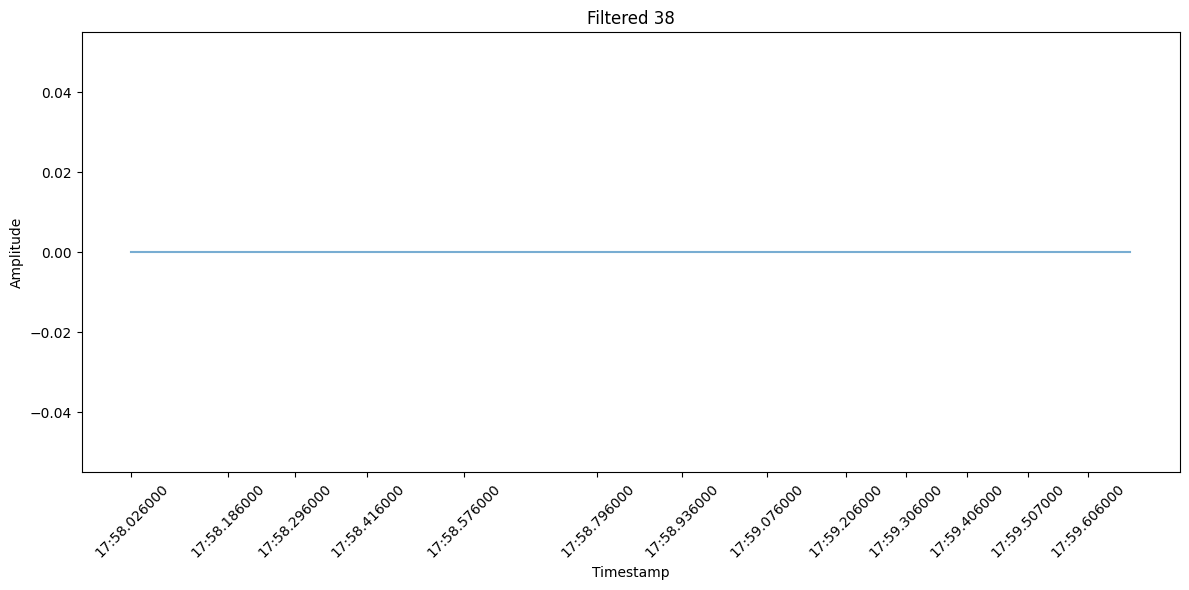

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141801.csv


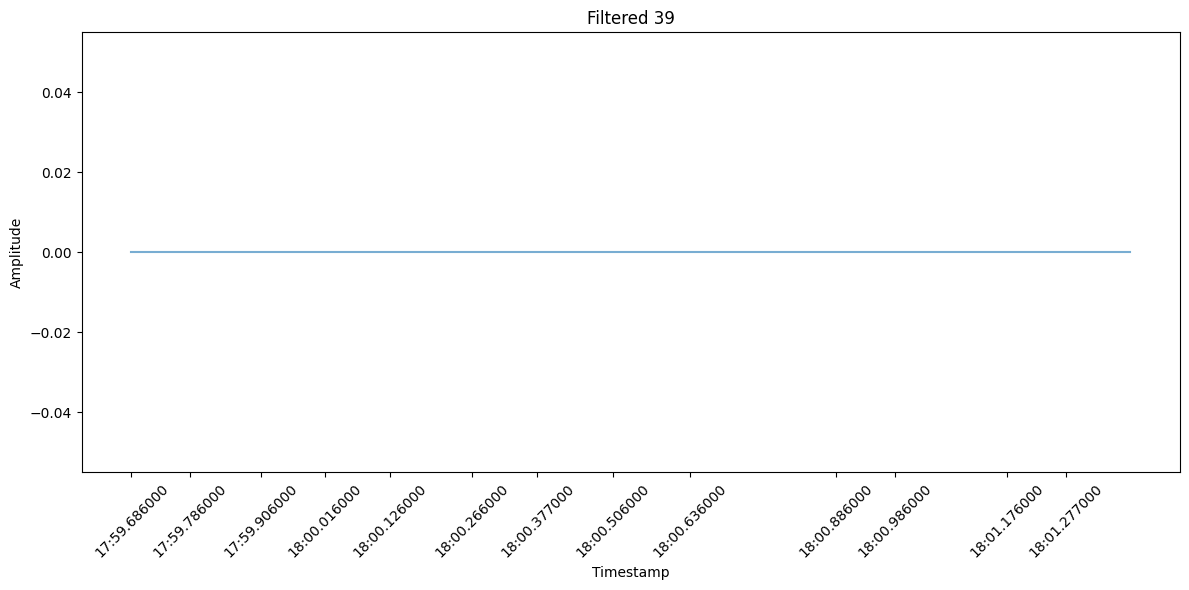

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141803.csv


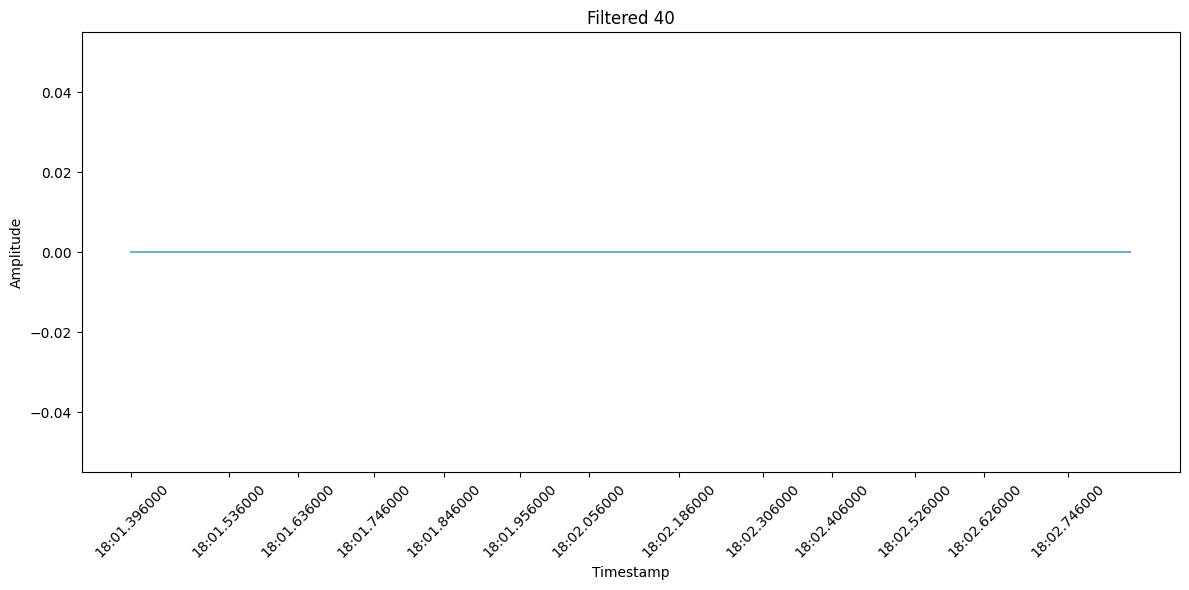

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141804.csv


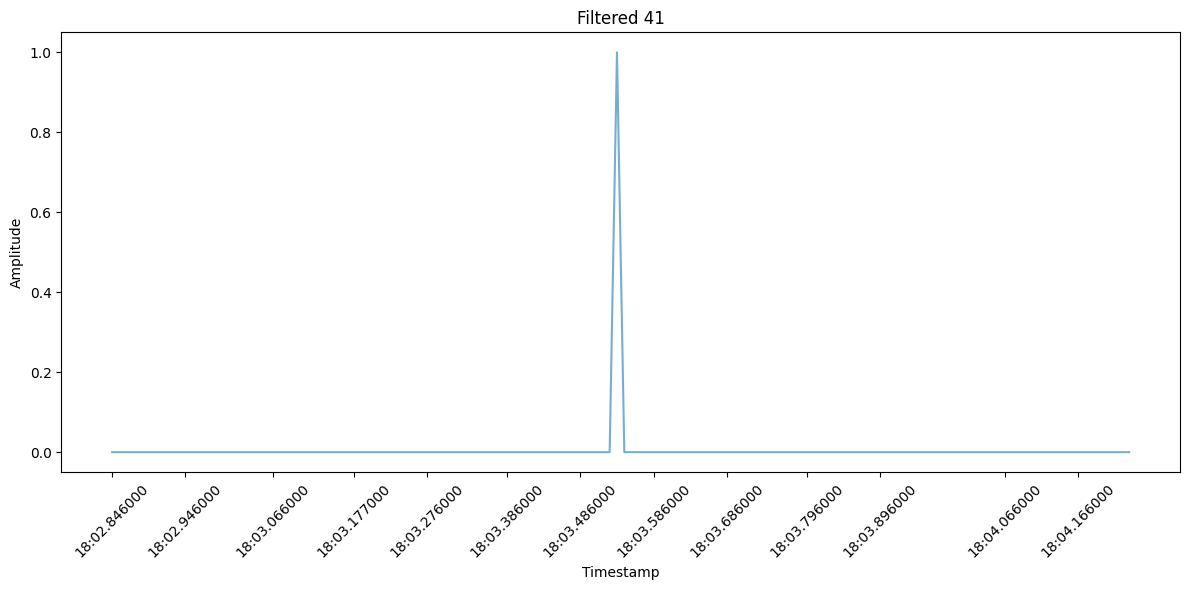

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141806.csv


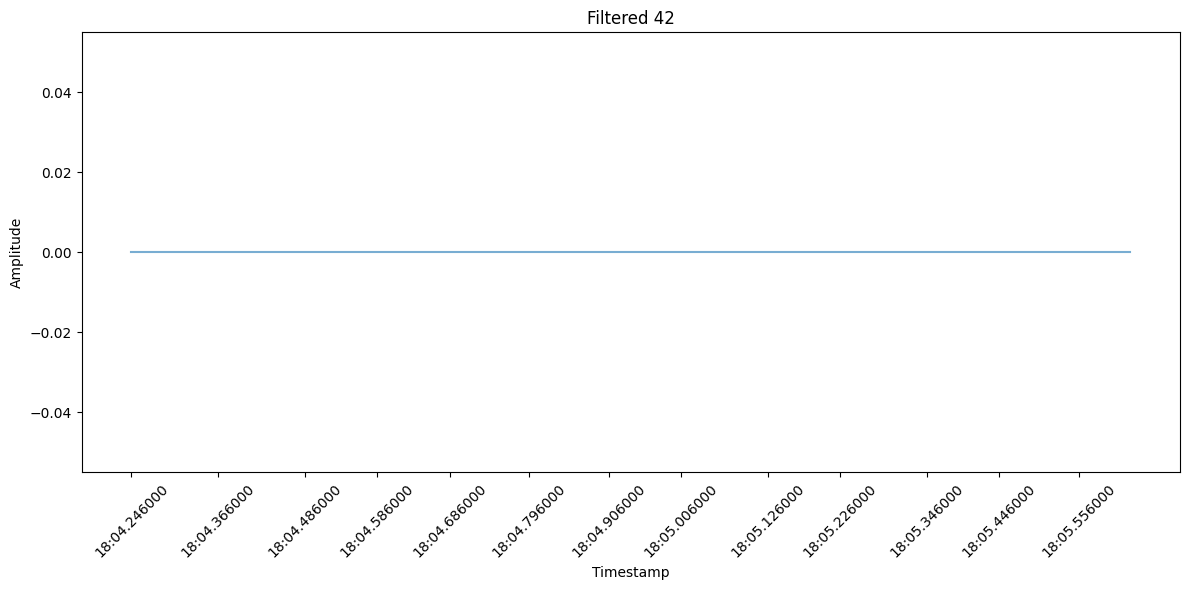

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141807.csv


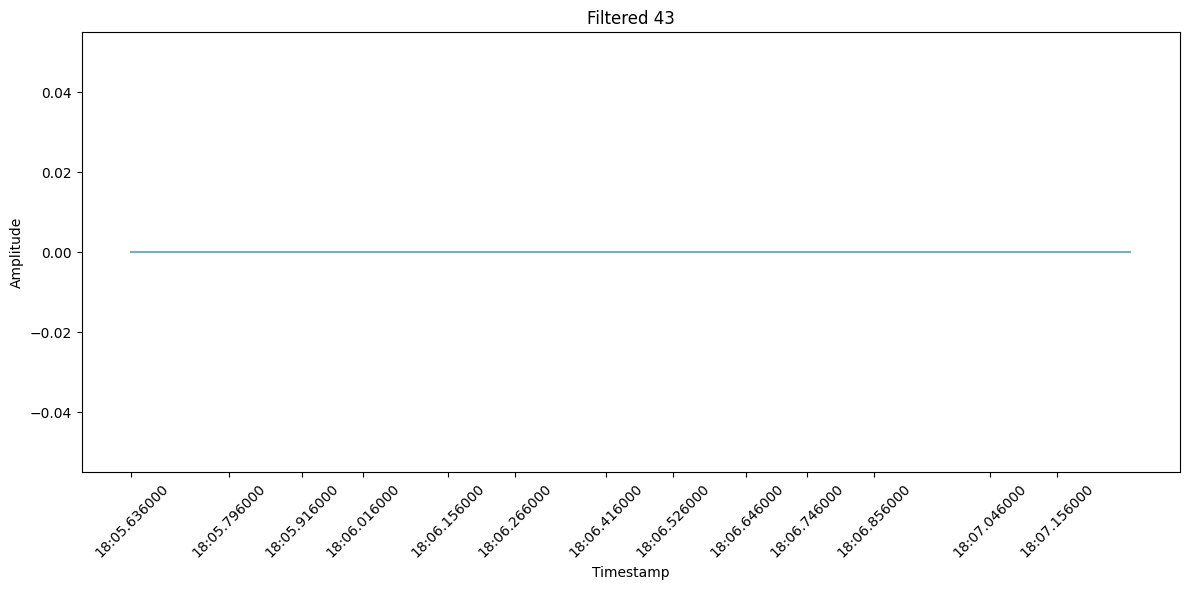

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141809.csv


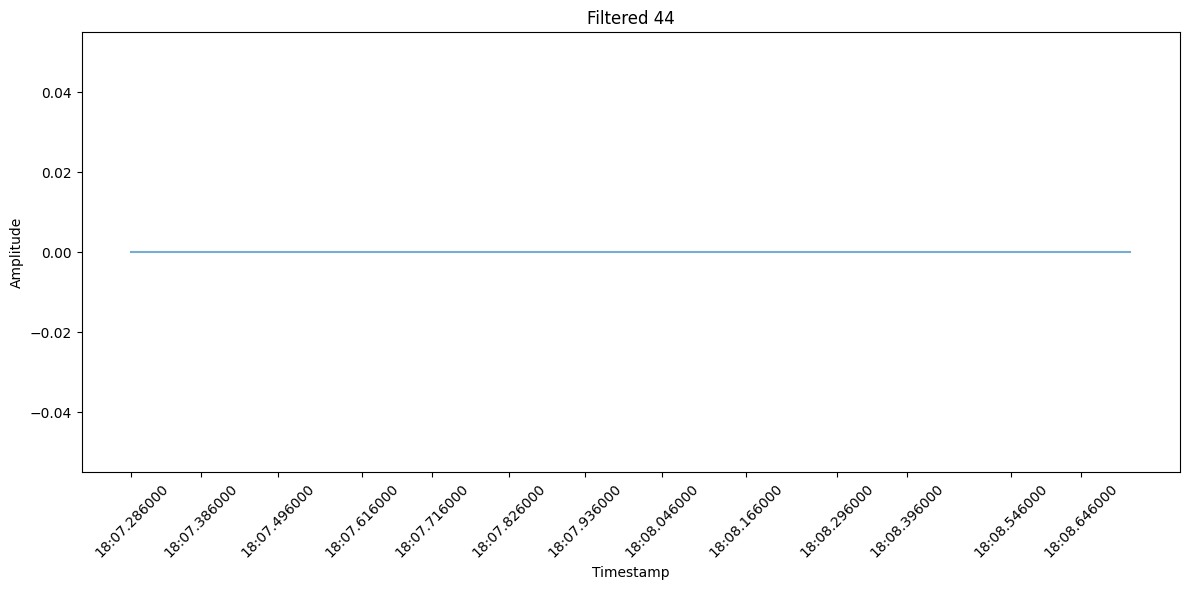

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141810.csv


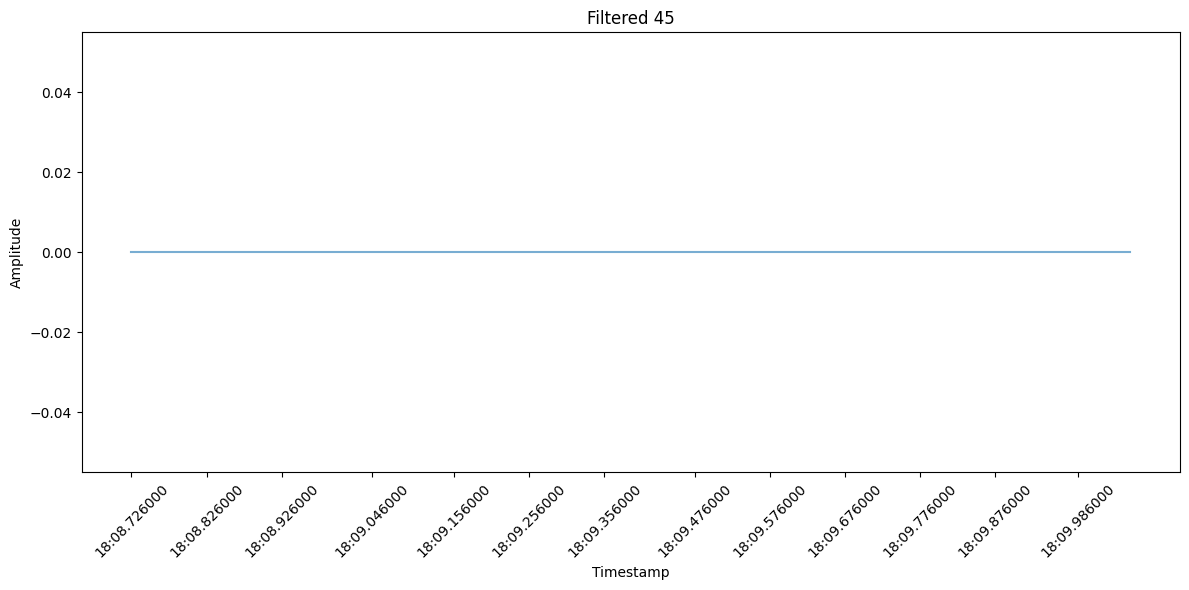

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141812.csv


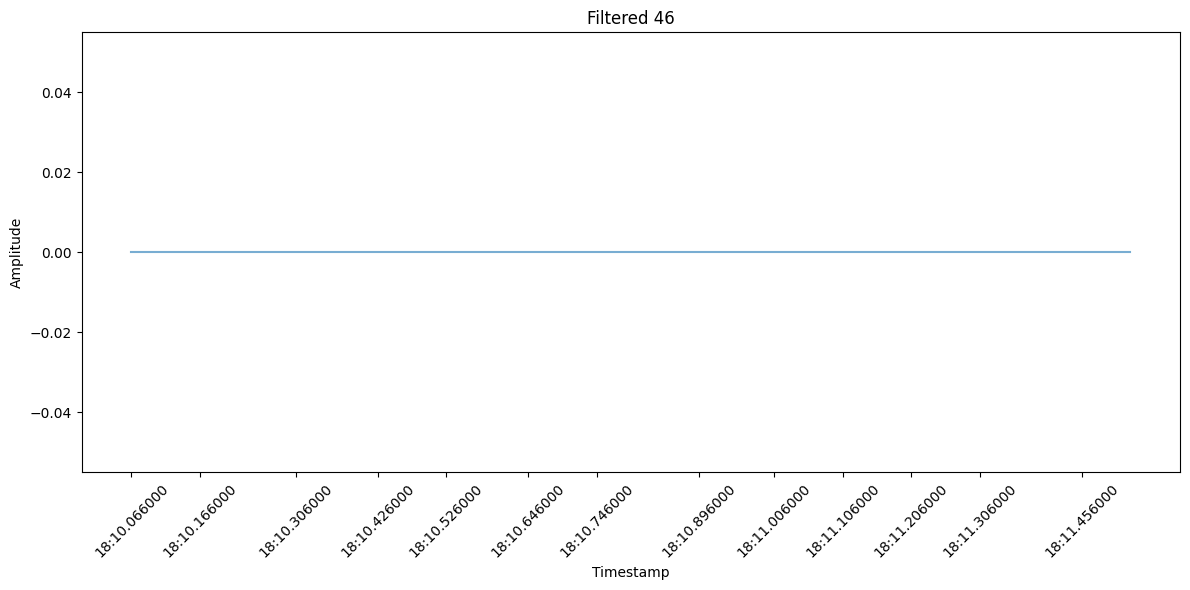

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141813.csv


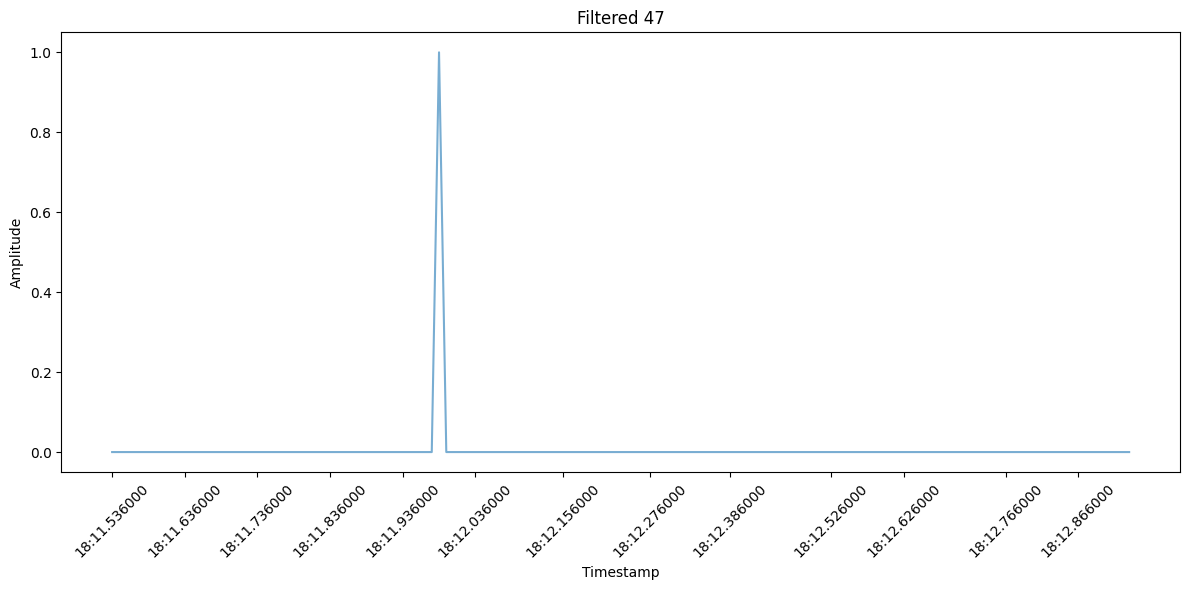

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141815.csv


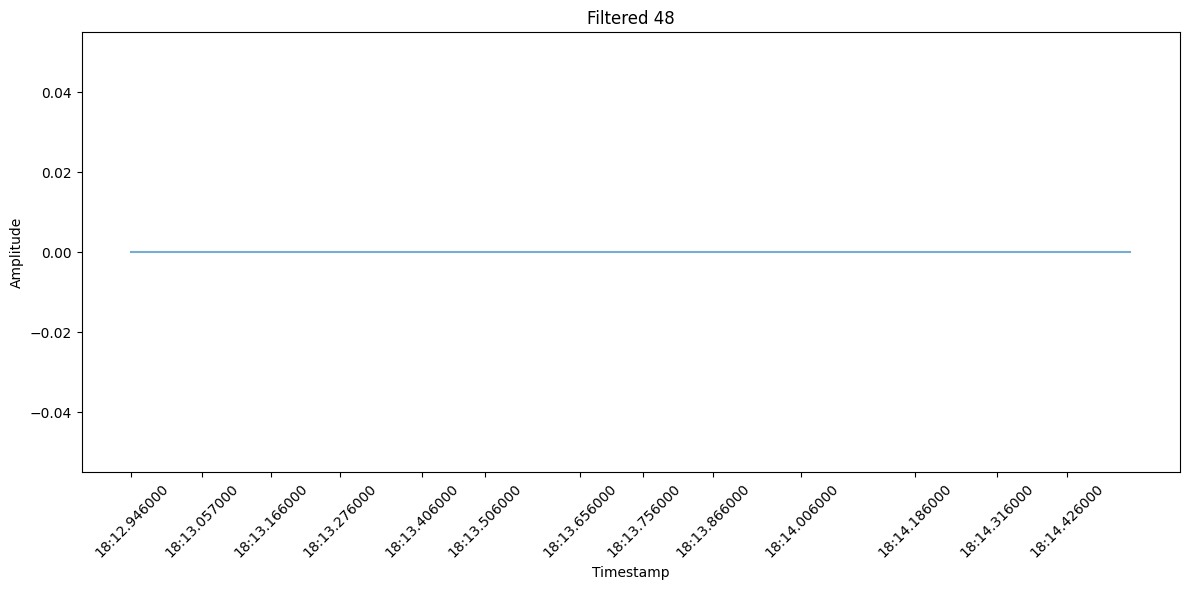

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141816.csv


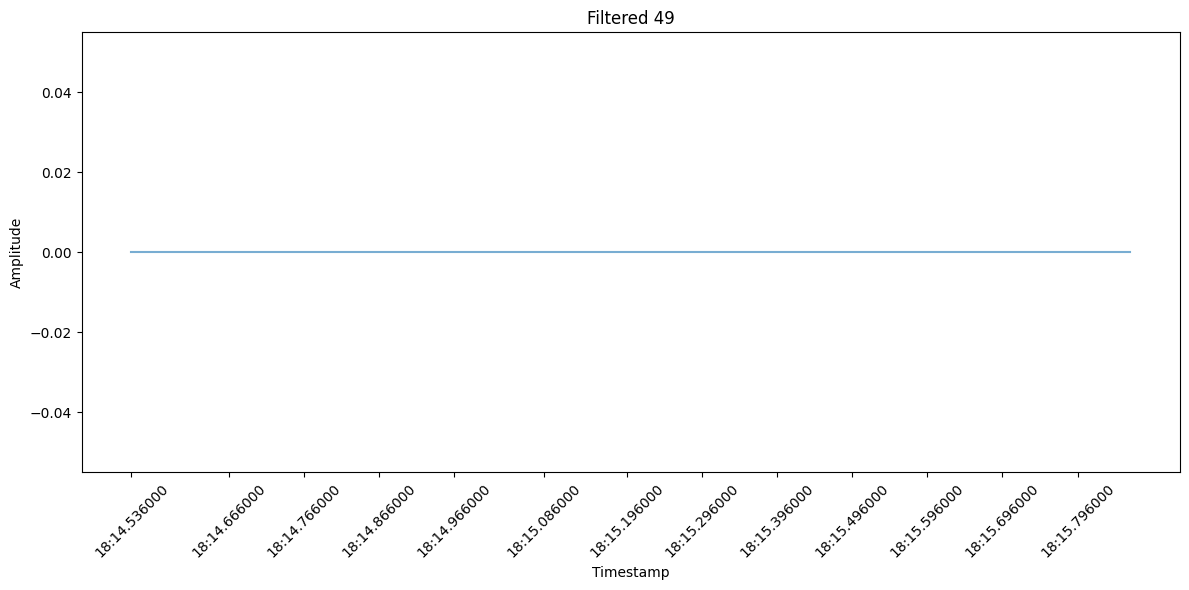

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141817.csv


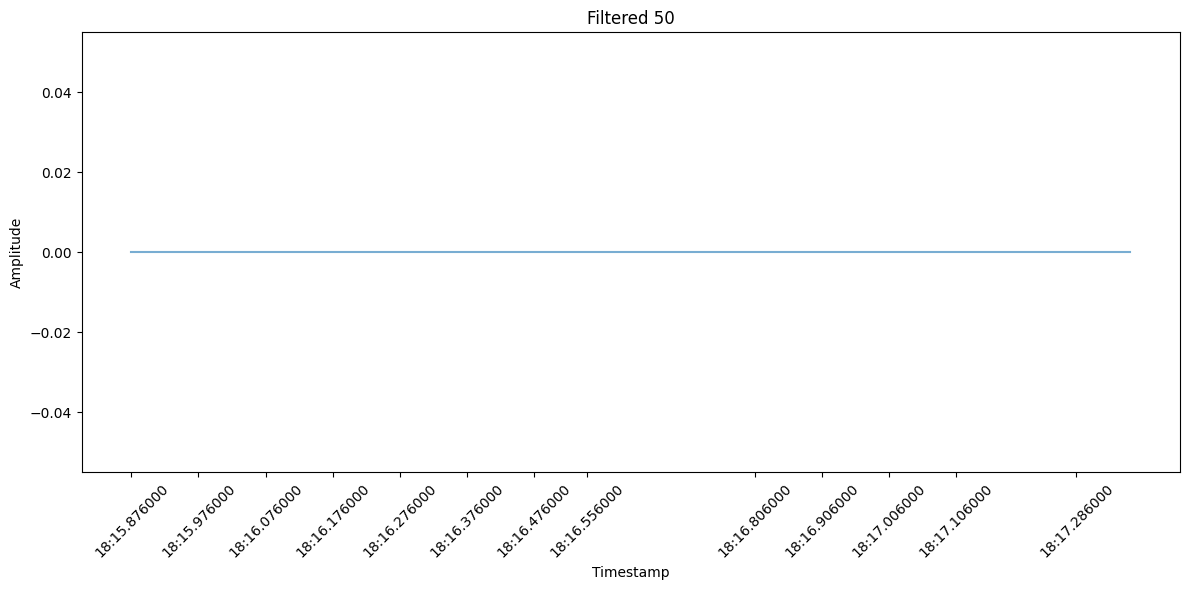

data\raw\raw_noActivity_csi\L0382_ESP_8_20250521_141819.csv


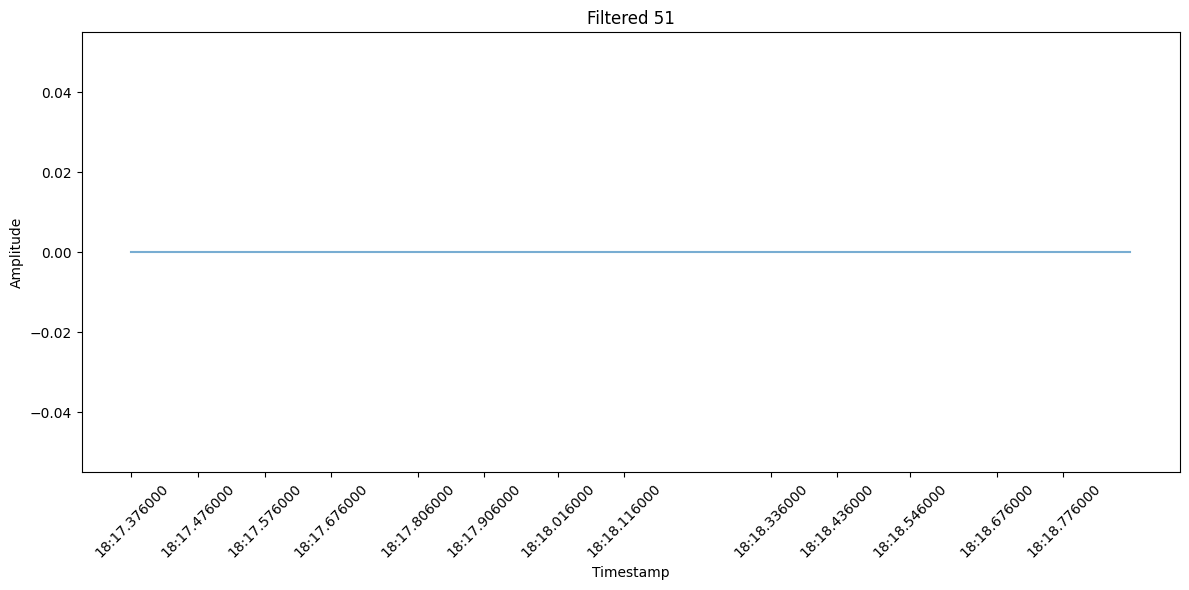

In [ ]:
ACTIVITY_CSI_PATHS = glob.glob(r"data\raw\raw_noActivity_csi\L0382*.csv")
for idx, csv_file in enumerate(ACTIVITY_CSI_PATHS):
    print(csv_file)
    activity_sig, ts = preprocess_complex_pipeline(CSI_PATH=csv_file)
    activity_sig = activity_sig @ W
    test = np.mean(np.abs(activity_sig)[:,:5],axis=1)>5

    plot_csi_amplitude(test[:,None], ts, title=f'Filtered {idx}', FRAME_NUM=500)
    if idx > 50:
        break
